# FINAL PROJECT

## TOPIC MODELLING AND SENTIMENT PREDICTION ANALYSIS TO IDENTIFY POSITIVE AND NEGATIVE FOCUS AREAS OF INDIAN FINANCE MINISTERS USING BUDGET SPEECHES OF 2010-2019

### DATA SOURCE: indiabudget.gov.in

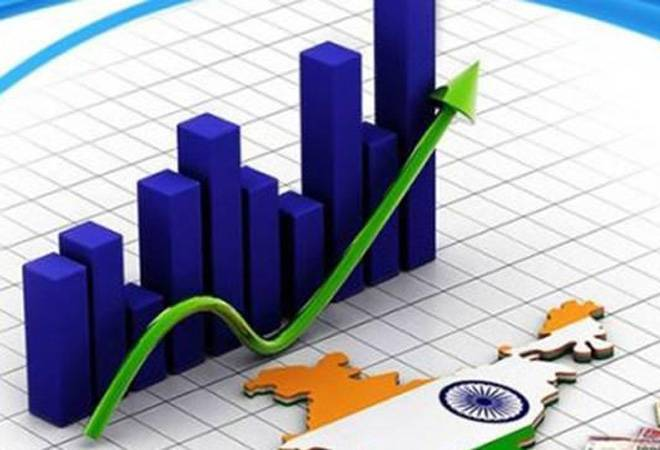

The OS module in Python provides functions for interacting with the operating system. OS comes under Python's standard utility modules.

pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real-world data analysis in Python.

NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices. NumPy was created in 2005 by Travis Oliphant. It is an open source project and you can use it freely.

NLTK is a leading platform for building Python programs to work with human language data. Written by the creators of NLTK, it guides the reader through the fundamentals of writing Python programs, working with corpora, categorizing text, analyzing linguistic structure

A regular expression (or RE) specifies a set of strings that matches it; the functions in this module let you check if a particular string matches a given regular expression (or if a given regular expression matches a particular string, which comes down to the same thing).

Here we are importing the required python libraries and assigning alias names for each of them so that it will be use for use in further cells.

In [1]:
import os
import pandas as pd
import numpy as np
import nltk
import re

Python method getcwd() returns current working directory of a process.

In [2]:
os.getcwd()

'C:\\Users\\MSI\\finalyearproject'

Python method chdir() changes the current working directory to the given path.It returns None in all the cases.

In [3]:
os.chdir('D:\\4sem\\Project\\Project - FM\\Text')

In Python programming, a list is created by placing all the items (elements) inside square brackets [], separated by commas.It can have any number of items and they may be of different types (integer, float, string etc.).A list can also have another list as an item. This is called a nested list.

Here, I am putting my dataset text files into one single list and naming it as filelist.

In [4]:
filelist = ['201802 AJ.txt',
 '201402 PC Int.txt',
 '201102 PM.txt',
 '201002 PM.txt',
 '201203 PM.txt',
 '201302 PC.txt',
 '201502 AJ.txt',
 '201407 AJ.txt',
 '201902 PG Int.txt',
 '201602 AJ.txt',
 '201702 AJ.txt',
 '201907 NS.txt']

Importing the speech text into the dataframe.We first import the files using open then tokenize them using the NLTK library and finally append them as a dataframe.

Tokenize: In Python tokenization basically refers to splitting up a larger body of text into smaller lines, words or even creating words for a non-English language. The various tokenization functions in-built into the nltk module itself and can be used in programs as shown below.

In [5]:
data1 = []
for f in filelist:
    with open(f,'r',encoding='latin1') as myfile:
        lines = ' '.join(myfile.readlines())
        sent_text = nltk.sent_tokenize(lines)
        for sent in sent_text:
            if sent != "\n":
                data1.append([f,sent])
data2 = pd.DataFrame(columns=['file_name','Sentence'],data=data1) 

Pandas is one of those packages and makes importing and analyzing data much easier.Pandas head() method is used to return top n (5 by default) rows of a data frame or series.

Here, I am using head method on data2 dataframe to see what my data looks like.

In [6]:
data2.head()

file_name                                           Sentence
0  201802 AJ.txt   \n \n  \n \n  \n \n Budget 2018-2019 \n \n  \...
1  201802 AJ.txt          I rise to present the Budget for 2018-19.
2  201802 AJ.txt                                                 2.
3  201802 AJ.txt  Madam, four years ago, we pledged to the peopl...
4  201802 AJ.txt  We promised a \n leadership capable of taking ...

A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.'file_name' is a column in data2 which specifies the name of the file.Here,I am finding the No. of sentences in the speeches in each file.

The count() method returns the number of elements with the specified value.

In [7]:
data2.groupby('file_name').count()

Sentence
file_name                  
201002 PM.txt           761
201102 PM.txt           847
201203 PM.txt           847
201302 PC.txt           882
201402 PC Int.txt       402
201407 AJ.txt          1036
201502 AJ.txt           914
201602 AJ.txt          1251
201702 AJ.txt          1031
201802 AJ.txt           926
201902 PG Int.txt       494
201907 NS.txt          1000

Tagging the Finance Minister name, Year, Type of Budget & Date details of the speeches

In [8]:
data2['FM'] = np.where(data2['file_name'].str.contains('PC'), 'P. Chidambaram',
                          np.where(data2['file_name'].str.contains('PM'), 'Pranab Mukherjee',
                          np.where(data2['file_name'].str.contains('AJ'), 'Arun Jaitley',
                          np.where(data2['file_name'].str.contains('PG'), 'Piyush Goyal',        
                          np.where(data2['file_name'].str.contains('NS'), 'Nirmala Sitharaman', ''))))) 

data2['year'] = data2['file_name'].str[:4]

data2['Budget']=np.where(data2['file_name'].str.contains('Int'),'Interim Budget','Budget')

Creating a column with the date of the speech

In [9]:
data2['date'] = np.where(data2['file_name'].str.contains('201802 AJ.txt'), 'February 1, 2018',
                         np.where(data2['file_name'].str.contains('201402 PC Int.txt'), 'February 17, 2014',
                         np.where(data2['file_name'].str.contains('201102 PM.txt'), 'February 28, 2011',
                         np.where(data2['file_name'].str.contains('201002 PM.txt'), 'February  26,  2010',
                         np.where(data2['file_name'].str.contains('201203 PM.txt'), 'March 16, 2012',
                         np.where(data2['file_name'].str.contains('201302 PC.txt'), 'February 28, 2013',
                         np.where(data2['file_name'].str.contains('201502 AJ.txt'), 'February 28, 2015',
                         np.where(data2['file_name'].str.contains('201407 AJ.txt'), 'July 10, 2014',
                         np.where(data2['file_name'].str.contains('201902 PG Int.txt'), 'February 1, 2019',
                         np.where(data2['file_name'].str.contains('201602 AJ.txt'), 'February 29, 2016',
                         np.where(data2['file_name'].str.contains('201702 AJ.txt'), 'February 1, 2017',
                         np.where(data2['file_name'].str.contains('201907 NS.txt'), 'July 5, 2019',''))))))))))))



In [10]:
data2.head()

file_name                                           Sentence  \
0  201802 AJ.txt   \n \n  \n \n  \n \n Budget 2018-2019 \n \n  \...   
1  201802 AJ.txt          I rise to present the Budget for 2018-19.   
2  201802 AJ.txt                                                 2.   
3  201802 AJ.txt  Madam, four years ago, we pledged to the peopl...   
4  201802 AJ.txt  We promised a \n leadership capable of taking ...   

             FM  year  Budget              date  
0  Arun Jaitley  2018  Budget  February 1, 2018  
1  Arun Jaitley  2018  Budget  February 1, 2018  
2  Arun Jaitley  2018  Budget  February 1, 2018  
3  Arun Jaitley  2018  Budget  February 1, 2018  
4  Arun Jaitley  2018  Budget  February 1, 2018

The shape attribute of pandas returns a tuple representing the dimensionality of the DataFrame.Here,i can see that my dataset or dataframe data2 has 10391 rows and 6 columns

In [11]:
data2.shape

(10391, 6)

In [12]:
# Removing the new line charactes from the text

data2['Sent_clean'] = data2.Sentence.replace('\n','', regex=True)

# Removing the abbreviations within parathesis

data2['Sent_clean']=data2['Sent_clean'].str.replace(r"\s*\([^()]*\)"," ") 

# Removing all special characters and numericals from the speech

data2['Sent_clean']=data2['Sent_clean'].str.replace('[^a-zA-Z ]', ' ',regex=True) 

# Removing leading and trailing spaces from each sentence

data2['Sent_clean']= data2['Sent_clean'].str.strip()


<ipython-input-12-085e2a08df70>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data2['Sent_clean']=data2['Sent_clean'].str.replace(r"\s*\([^()]*\)"," ")


Length of text as a column:
data2 is our dataframe and we are creating a new column in it called 'length_sent' which is length of each of the cleaned sentence.'Sent_clean' column of data2 has each of the cleaned sentence as its values.The str() function of Python returns the string version of the object.The len() function returns the number of items in an object. When the object is a string, the len() function returns the number of characters in the string.

In [13]:
data2['length_sent']=data2["Sent_clean"].str.len() 

In [14]:
data2.Sent_clean

0        Budget                Speech of   Arun Jaitley...
1                         I rise to present the Budget for
2                                                         
3        Madam  four years ago  we pledged to the peopl...
4        We promised a  leadership capable of taking di...
                               ...                        
10386    Services  by  National  Pension  System   Trus...
10387    Rehabilitation therapy counselling  services  ...
10388    Admission  to  circus   dance   theatre  etc  ...
10389                                          per  person
10390                                                     
Name: Sent_clean, Length: 10391, dtype: object

In [15]:
data2[data2['length_sent']==2]

file_name      Sentence                  FM  year  \
772        201802 AJ.txt           No.        Arun Jaitley  2018   
1239   201402 PC Int.txt           ii.      P. Chidambaram  2014   
1245   201402 PC Int.txt           iv.      P. Chidambaram  2014   
1250   201402 PC Int.txt           vi.      P. Chidambaram  2014   
1260   201402 PC Int.txt           ix.      P. Chidambaram  2014   
1413       201102 PM.txt           II.    Pranab Mukherjee  2011   
1952       201102 PM.txt           VI.    Pranab Mukherjee  2011   
3231       201203 PM.txt           IV.    Pranab Mukherjee  2012   
3426       201203 PM.txt           VI.    Pranab Mukherjee  2012   
3861       201302 PC.txt           II.      P. Chidambaram  2013   
4029       201302 PC.txt   9 \n \n IV.      P. Chidambaram  2013   
4276       201302 PC.txt  18 \n \n VI.      P. Chidambaram  2013   
5109       201502 AJ.txt   of 2014-15.        Arun Jaitley  2015   
5424       201502 AJ.txt  37 \n \n II.        Arun Jaitley  2015   
5444       201502 AJ.txt           IV.        Arun Jaitley  2015   
5466       201502 AJ.txt           II.        Arun Jaitley  2015   
5476       201502 AJ.txt           II.        Arun Jaitley  2015   
5489       201502 AJ.txt           IV.        Arun Jaitley  2015   
5510       201502 AJ.txt           II.        Arun Jaitley  2015   
5769       201407 AJ.txt           II.        Arun Jaitley  2014   
5994       201407 AJ.txt           IV.        Arun Jaitley  2014   
6112       201407 AJ.txt  23 \n \n VI.        Arun Jaitley  2014   
6125       201407 AJ.txt           ii.        Arun Jaitley  2014   
6128       201407 AJ.txt           iv.        Arun Jaitley  2014   
6131       201407 AJ.txt           vi.        Arun Jaitley  2014   
6138       201407 AJ.txt  24 \n \n ii.        Arun Jaitley  2014   
6300       201407 AJ.txt           IX.        Arun Jaitley  2014   
7267       201602 AJ.txt           II.        Arun Jaitley  2016   
7379       201602 AJ.txt           IV.        Arun Jaitley  2016   
7520       201602 AJ.txt  17 \n \n VI.        Arun Jaitley  2016   
7658       201602 AJ.txt           IX.        Arun Jaitley  2016   
8544       201702 AJ.txt           II.        Arun Jaitley  2017   
8645       201702 AJ.txt           IV.        Arun Jaitley  2017   
8798       201702 AJ.txt           VI.        Arun Jaitley  2017   
8949       201702 AJ.txt           IX.        Arun Jaitley  2017   
9219       201702 AJ.txt           No.        Arun Jaitley  2017   
9224       201702 AJ.txt           No.        Arun Jaitley  2017   
10189      201907 NS.txt           NO.  Nirmala Sitharaman  2019   
10349      201907 NS.txt           II.  Nirmala Sitharaman  2019   
10369      201907 NS.txt      * \n IV.  Nirmala Sitharaman  2019   

               Budget               date Sent_clean  length_sent  
772            Budget   February 1, 2018         No            2  
1239   Interim Budget  February 17, 2014         ii            2  
1245   Interim Budget  February 17, 2014         iv            2  
1250   Interim Budget  February 17, 2014         vi            2  
1260   Interim Budget  February 17, 2014         ix            2  
1413           Budget  February 28, 2011         II            2  
1952           Budget  February 28, 2011         VI            2  
3231           Budget     March 16, 2012         IV            2  
3426           Budget     March 16, 2012         VI            2  
3861           Budget  February 28, 2013         II            2  
4029           Budget  February 28, 2013         IV            2  
4276           Budget  February 28, 2013         VI            2  
5109           Budget  February 28, 2015         of            2  
5424           Budget  February 28, 2015         II            2  
5444           Budget  February 28, 2015         IV            2  
5466           Budget  February 28, 2015         II            2  
5476           Budget  February 28, 2015         II            2  
5489           Budge

In [16]:
# Removing all texts having length <=2
data3=data2[data2['length_sent']>2]

In [17]:
# Checking for the introductory remarks of the various speeches
data3[data3['Sent_clean'].str.contains('I rise to')].head(12)

file_name                                           Sentence  \
1         201802 AJ.txt          I rise to present the Budget for 2018-19.   
926   201402 PC Int.txt  Interim Budget 2014-2015 \n \n Speech of \n \n...   
1328      201102 PM.txt  Budget 2011-2012 \n \n Speech of \n \n Pranab ...   
2175      201002 PM.txt  Budget  2010-2011\n \n  \n \n Speech  of\n \n ...   
2936      201203 PM.txt  Budget 2012-2013 \n \n Speech of \n \n Pranab ...   
3783      201302 PC.txt  Budget 2013-2014 \n \n Speech of \n \n P. Chid...   
4666      201502 AJ.txt  Introduction 1 \n Major Challenges Ahead 5 \n ...   
5579      201407 AJ.txt  Budget 2014-2015 \n \n Speech of \n \n Arun Ja...   
6615  201902 PG Int.txt   \n \n  \n \n  \n \n  \n \n Interim Budget 201...   
7111      201602 AJ.txt  Governments \n 39 \n \n \n Annexes to Part \n ...   
8370      201702 AJ.txt  Annexes \n \n  Annexes to Part  A \n \n  Anne...   

                    FM  year          Budget                 date  \
1         Arun Jaitley  2018          Budget     February 1, 2018   
926     P. Chidambaram  2014  Interim Budget    February 17, 2014   
1328  Pranab Mukherjee  2011          Budget    February 28, 2011   
2175  Pranab Mukherjee  2010          Budget  February  26,  2010   
2936  Pranab Mukherjee  2012          Budget       March 16, 2012   
3783    P. Chidambaram  2013          Budget    February 28, 2013   
4666      Arun Jaitley  2015          Budget    February 28, 2015   
5579      Arun Jaitley  2014          Budget        July 10, 2014   
6615      Piyush Goyal  2019  Interim Budget     February 1, 2019   
7111      Arun Jaitley  2016          Budget    February 29, 2016   
8370      Arun Jaitley  2017          Budget     February 1, 2017   

                                             Sent_clean  length_sent  
1                      I rise to present the Budget for           32  
926   Interim Budget             Speech of   P  Chid...          167  
1328  Budget             Speech of   Pranab Mukherje...          147  
2175  Budget                Speech  of  Pranab Mukhe...          166  
2936  Budget             Speech of   Pranab Mukherje...          144  
3783  Budget             Speech of   P  Chidambaram ...          147  
4666  Introduction    Major Challenges Ahead    Fisc...          605  
5579  Budget             Speech of   Arun Jaitley   ...          142  
6615  Interim Budget                Speech of   Piyu...          165  
7111  Governments        Annexes to Part     B  Dire...          271  
8370  Annexes    Annexes to Part   A    Annex I   Ot...          571

In [18]:
data3.Sent_clean[data3['file_name']=='201907 NS.txt'][:3]

9391    Budget               Speech  of  Nirmala  Sith...
9392                                              PART  A
9393    The  recent  election  which  brought  us  to ...
Name: Sent_clean, dtype: object

Identifying and removing introductory remarks & index pages of the speeches

In [19]:
data3.loc[ [0,1,926,1328,2175,2936,4665,4666,3783,5579,6615,7109,7110,7111,8360,8361,8362,8363,8364,
                 8365,8366,8367,8368,8369,8370,8371,8372,9391,9392] , : ]

file_name                                           Sentence  \
0         201802 AJ.txt   \n \n  \n \n  \n \n Budget 2018-2019 \n \n  \...   
1         201802 AJ.txt          I rise to present the Budget for 2018-19.   
926   201402 PC Int.txt  Interim Budget 2014-2015 \n \n Speech of \n \n...   
1328      201102 PM.txt  Budget 2011-2012 \n \n Speech of \n \n Pranab ...   
2175      201002 PM.txt  Budget  2010-2011\n \n  \n \n Speech  of\n \n ...   
2936      201203 PM.txt  Budget 2012-2013 \n \n Speech of \n \n Pranab ...   
4665      201502 AJ.txt              CONTENTS \n \n PART -A \n \n Page No.   
4666      201502 AJ.txt  Introduction 1 \n Major Challenges Ahead 5 \n ...   
3783      201302 PC.txt  Budget 2013-2014 \n \n Speech of \n \n P. Chid...   
5579      201407 AJ.txt  Budget 2014-2015 \n \n Speech of \n \n Arun Ja...   
6615  201902 PG Int.txt   \n \n  \n \n  \n \n  \n \n Interim Budget 201...   
7109      201602 AJ.txt              CONTENTS \n \n PART -A \n \n Page No.   
7110      201602 AJ.txt  Introduction 1 \n Agriculture and Farmers' Wel...   
7111      201602 AJ.txt  Governments \n 39 \n \n \n Annexes to Part \n ...   
8360      201702 AJ.txt     CONTENTS \n \n  \n \n PART - A \n \n  Page No.   
8361      201702 AJ.txt                            Introduction 1 \n \n I.   
8362      201702 AJ.txt                                   Farmers 6 \n II.   
8363      201702 AJ.txt                         Rural population 8 \n III.   
8364      201702 AJ.txt                                    Youth 10 \n IV.   
8365      201702 AJ.txt  The poor and the underprivileged 12 \n V. Infr...   
8366      201702 AJ.txt                        Financial sector 17 \n VII.   
8367      201702 AJ.txt                        Digital economy 20 \n VIII.   
8368      201702 AJ.txt                           Public service 21 \n IX.   
8369      201702 AJ.txt  Prudent fiscal management 23 \n \n \n  \n \n P...   
8370      201702 AJ.txt  Annexes \n \n  Annexes to Part  A \n \n  Anne...   
8371      201702 AJ.txt                    Spring is a season of optimism.   
8372      201702 AJ.txt  I extend my warm greetings to \n everyone on t...   
9391      201907 NS.txt  Budget \n 2019-2020 \n \n \n Speech \n of \n N...   
9392      201907 NS.txt                              PART \n A \n \n \n 2.   

                      FM  year          Budget                 date  \
0           Arun Jaitley  2018          Budget     February 1, 2018   
1           Arun Jaitley  2018          Budget     February 1, 2018   
926       P. Chidambaram  2014  Interim Budget    February 17, 2014   
1328    Pranab Mukherjee  2011          Budget    February 28, 2011   
2175    Pranab Mukherjee  2010          Budget  February  26,  2010   
2936    Pranab Mukherjee  2012          Budget       March 16, 2012   
4665        Arun Jaitley  2015          Budget    February 28, 2015   
4666        Arun Jaitley  2015          Budget    February 28, 2015   
3783      P. Chidambaram  2013          Budget    February 28, 2013   
5579        Arun Jaitley  2014          Budget        July 10, 2014   
6615        Piyush Goyal  2019  Interim Budget     February 1, 2019   
7109        Arun Jaitley  2016          Budget    February 29, 2016   
7110        Arun Jaitley  2016          Budget    February 29, 2016   
7111        Arun Jaitley  2016          Budget    February 29, 2016   
8360        Arun Jaitley  2017          Budget     February 1, 2017   
8361        Arun Jaitley  2017          Budget     February 1, 2017   
8362        Arun Jaitley  2017          Budget     February 1, 2017   
8363        Arun Jaitley  2017          Budget     February 1, 2017   
8364        Arun Jaitley  2017          Budget     February 1, 2017   
8365        Arun Jaitley  2017          Budget     February 1, 2017   
8366        Arun Jaitley  2017          Budget     February 1, 2017   
8367        Arun Jaitley  2017          Budget     February 1, 2017   
8368        Arun Jaitley  2017          

In [20]:
data3=data3.drop([0,1,926,1328,2175,2936,4665,4666,3783,5579,6615,7109,7110,7111,8360,8361,8362,8363,8364,
                 8365,8366,8367,8368,8369,8370,8371,8372,9391,9392],axis=0)

In [21]:
data3.shape

(8650, 8)

Increasing display column width to see entire text

In [22]:
pd.options.display.max_colwidth = 500

In [23]:
data3.head()

file_name  \
3  201802 AJ.txt   
4  201802 AJ.txt   
5  201802 AJ.txt   
6  201802 AJ.txt   
7  201802 AJ.txt   

                                                                                                                               Sentence  \
3          Madam, four years ago, we pledged to the people of India to give \n this nation an honest, clean and transparent Government.   
4              We promised a \n leadership capable of taking difficult decisions and restoring strong \n performance of Indian economy.   
5                  We promised to reduce poverty, \n expedite infrastructure creation and build a strong, confident and a New \n India.   
6  When our Government took over, India was considered a part of \n fragile 5; a nation suffering from policy paralysis and corruption.   
7                                                                                                  We have \n decisively reversed this.   

             FM  year  Budget              date  \
3  Arun Jaitley  2018  Budget  February 1, 2018   
4  Arun Jaitley  2018  Budget  February 1, 2018   
5  Arun Jaitley  2018  Budget  February 1, 2018   
6  Arun Jaitley  2018  Budget  February 1, 2018   
7  Arun Jaitley  2018  Budget  February 1, 2018   

                                                                                                                          Sent_clean  \
3          Madam  four years ago  we pledged to the people of India to give  this nation an honest  clean and transparent Government   
4                We promised a  leadership capable of taking difficult decisions and restoring strong  performance of Indian economy   
5                    We promised to reduce poverty   expedite infrastructure creation and build a strong  confident and a New  India   
6  When our Government took over  India was considered a part of  fragile    a nation suffering from policy paralysis and corruption   
7                                                                                                  We have  decisively reversed this   

   length_sent  
3          121  
4          115  
5          111  
6          129  
7           33

Reseting the index of the dataframe

In [24]:
data3 = data3.reset_index(drop=True)
data3.head()

file_name  \
0  201802 AJ.txt   
1  201802 AJ.txt   
2  201802 AJ.txt   
3  201802 AJ.txt   
4  201802 AJ.txt   

                                                                                                                               Sentence  \
0          Madam, four years ago, we pledged to the people of India to give \n this nation an honest, clean and transparent Government.   
1              We promised a \n leadership capable of taking difficult decisions and restoring strong \n performance of Indian economy.   
2                  We promised to reduce poverty, \n expedite infrastructure creation and build a strong, confident and a New \n India.   
3  When our Government took over, India was considered a part of \n fragile 5; a nation suffering from policy paralysis and corruption.   
4                                                                                                  We have \n decisively reversed this.   

             FM  year  Budget              date  \
0  Arun Jaitley  2018  Budget  February 1, 2018   
1  Arun Jaitley  2018  Budget  February 1, 2018   
2  Arun Jaitley  2018  Budget  February 1, 2018   
3  Arun Jaitley  2018  Budget  February 1, 2018   
4  Arun Jaitley  2018  Budget  February 1, 2018   

                                                                                                                          Sent_clean  \
0          Madam  four years ago  we pledged to the people of India to give  this nation an honest  clean and transparent Government   
1                We promised a  leadership capable of taking difficult decisions and restoring strong  performance of Indian economy   
2                    We promised to reduce poverty   expedite infrastructure creation and build a strong  confident and a New  India   
3  When our Government took over  India was considered a part of  fragile    a nation suffering from policy paralysis and corruption   
4                                                                                                  We have  decisively reversed this   

   length_sent  
0          121  
1          115  
2          111  
3          129  
4           33

Creation of a new column for the topic

In [25]:
data3['Topic']=''

In [26]:
data3.head()

file_name  \
0  201802 AJ.txt   
1  201802 AJ.txt   
2  201802 AJ.txt   
3  201802 AJ.txt   
4  201802 AJ.txt   

                                                                                                                               Sentence  \
0          Madam, four years ago, we pledged to the people of India to give \n this nation an honest, clean and transparent Government.   
1              We promised a \n leadership capable of taking difficult decisions and restoring strong \n performance of Indian economy.   
2                  We promised to reduce poverty, \n expedite infrastructure creation and build a strong, confident and a New \n India.   
3  When our Government took over, India was considered a part of \n fragile 5; a nation suffering from policy paralysis and corruption.   
4                                                                                                  We have \n decisively reversed this.   

             FM  year  Budget              date  \
0  Arun Jaitley  2018  Budget  February 1, 2018   
1  Arun Jaitley  2018  Budget  February 1, 2018   
2  Arun Jaitley  2018  Budget  February 1, 2018   
3  Arun Jaitley  2018  Budget  February 1, 2018   
4  Arun Jaitley  2018  Budget  February 1, 2018   

                                                                                                                          Sent_clean  \
0          Madam  four years ago  we pledged to the people of India to give  this nation an honest  clean and transparent Government   
1                We promised a  leadership capable of taking difficult decisions and restoring strong  performance of Indian economy   
2                    We promised to reduce poverty   expedite infrastructure creation and build a strong  confident and a New  India   
3  When our Government took over  India was considered a part of  fragile    a nation suffering from policy paralysis and corruption   
4                                                                                                  We have  decisively reversed this   

   length_sent Topic  
0          121        
1          115        
2          111        
3          129        
4           33

Exporting the file to manually classify the topics

In [27]:
data3.to_excel("Topic Modelling.xlsx")
os.getcwd()

'D:\\4sem\\Project\\Project - FM\\Text'

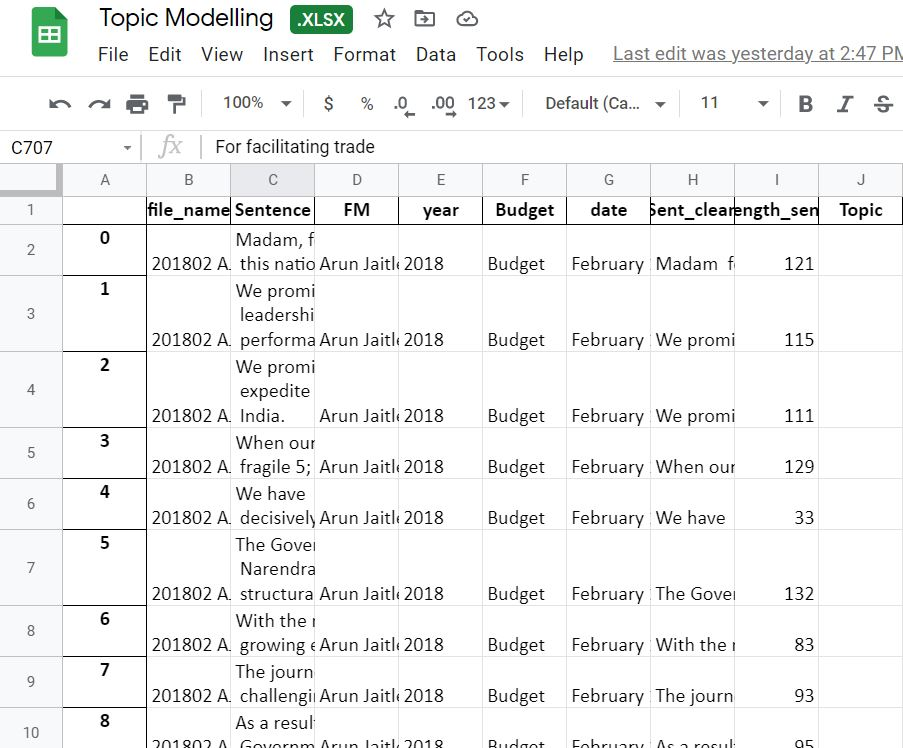

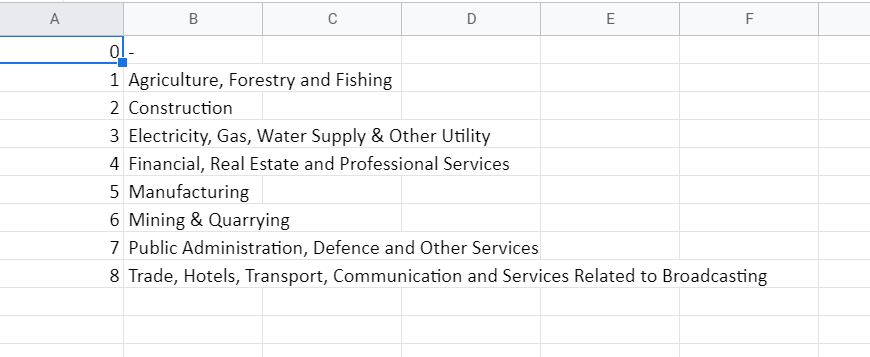

Importing the file worked on

In [28]:
os.getcwd()
os.chdir(r'C:\Users\MSI\Downloads')
data4 = pd.read_excel("Topic Modelling.xlsx")
data4.head()

Unnamed: 0      file_name  \
0           0  201102 PM.txt   
1           1  201102 PM.txt   
2           2  201102 PM.txt   
3           3  201102 PM.txt   
4           4  201102 PM.txt   

                                                                                                                                                                                                                                                 Sentence  \
0                                                                                                                                                                                                    We are reaching the end of a remarkable fiscal year.   
1  In a globalised world \n with its share of uncertainties and rapid changes, this year brought us some \n opportunities and many challenges as we moved ahead with steady steps on the \n chosen path of fiscal consolidation and high economic growth.   
2                                                                                                                                                                                                   Our growth in 2010-11 has been swift and broad-based.   
3                                                                                                                                                                                             The economy is \n back to its pre-crisis growth trajectory.   
4                                                                                                                                                                   While agriculture has shown a rebound, \n industry is regaining its earlier momentum.   

                 FM  year  Budget               date  \
0  Pranab Mukherjee  2011  Budget  February 28, 2011   
1  Pranab Mukherjee  2011  Budget  February 28, 2011   
2  Pranab Mukherjee  2011  Budget  February 28, 2011   
3  Pranab Mukherjee  2011  Budget  February 28, 2011   
4  Pranab Mukherjee  2011  Budget  February 28, 2011   

                                                                                                                                                                                                                                        Sent_clean  \
0                                                                                                                                                                                              We are reaching the end of a remarkable fiscal year   
1  In a globalised world  with its share of uncertainties and rapid changes  this year brought us some  opportunities and many challenges as we moved ahead with steady steps on the  chosen path of fiscal consolidation and high economic growth   
2                                                                                                                                                                                             Our growth in         has been swift and broad based   
3                                                                                                                                                                                         The economy is  back to its pre crisis growth trajectory   
4                                                                                                                                                               While agriculture has shown a rebound   industry is regaining its earlier momentum   

   length_sent                                 T1   T2   T3   T4   T5  
0           51                                  -  NaN  NaN  NaN  NaN  
1          239                                  -  NaN  NaN  NaN  NaN  
2           52                                  -  NaN  NaN  NaN  NaN  
3           56                                  -  NaN  NaN  NaN  NaN  
4           82  Agriculture, Forestry and Fishing  NaN  NaN  NaN  NaN

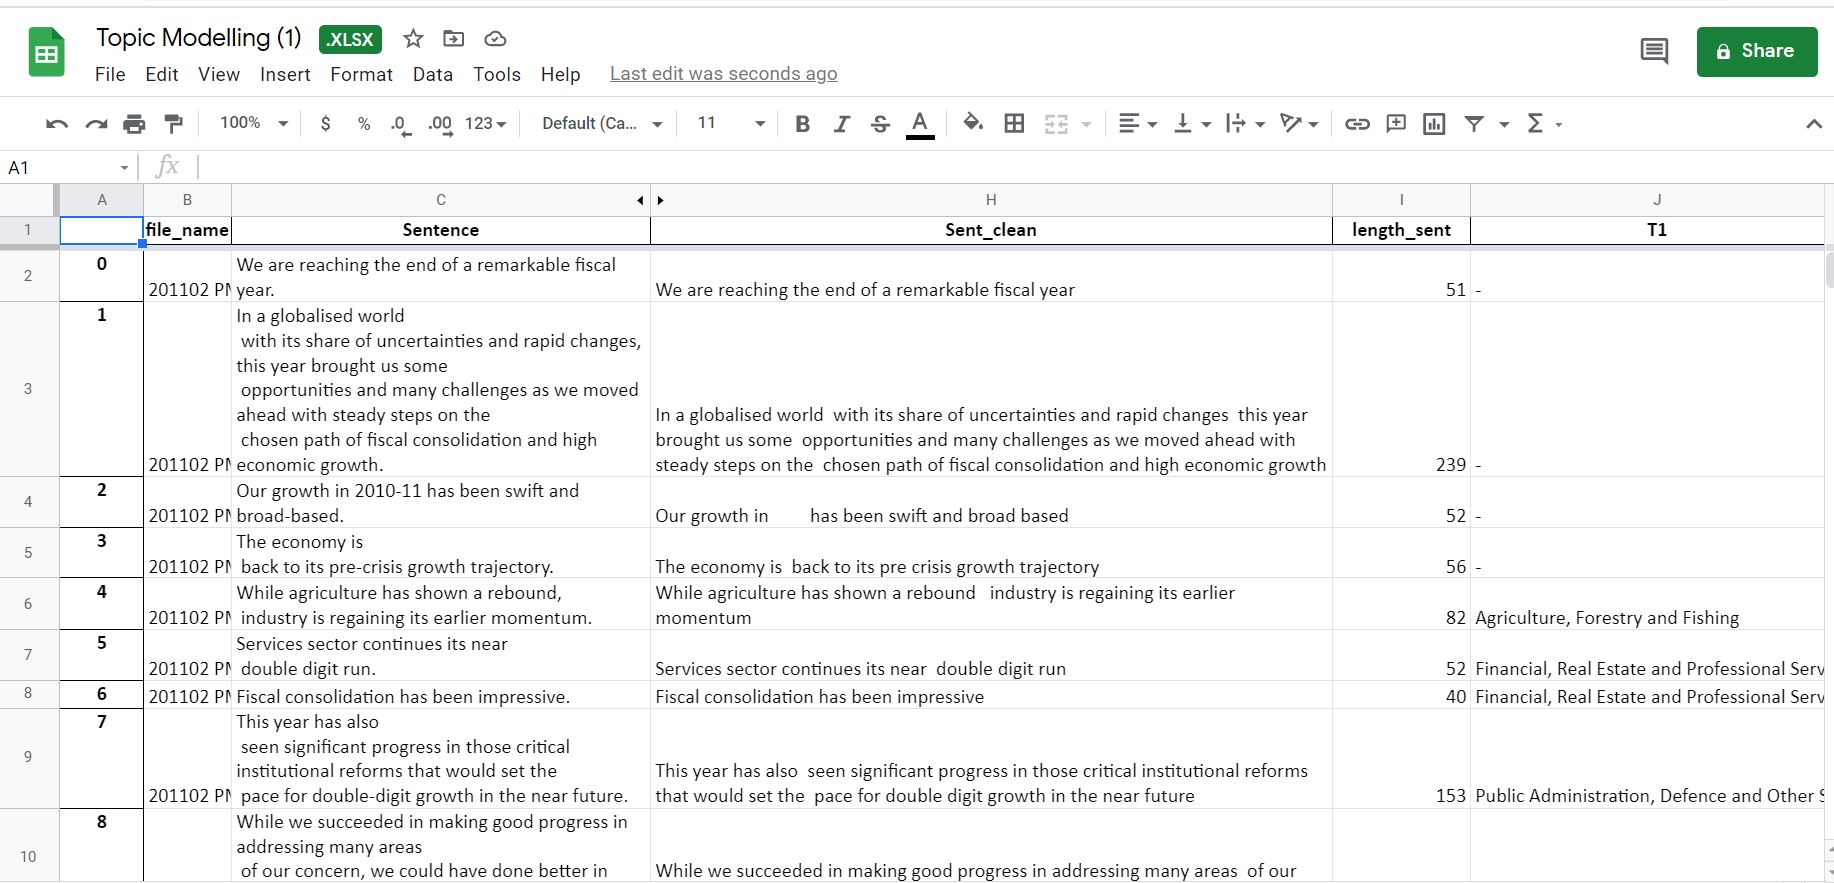

Separating the data that we worked on

In [29]:
data5 = data4[:1344]

In [30]:
data5 = data5.fillna(0)

In [31]:
#Clubbing the different topics to one
Row_list =[] 
my_list = []
# Iterate over each row 
for rows in data5.itertuples(): 
    # Create list for the current row 
    my_list =[rows.T1]
    if rows.T2 != 0:
        my_list.append(rows.T2)
        if rows.T3 !=0:
            my_list.append(rows.T3)
            if rows.T4 != 0:
                my_list.append(rows.T4)
                if rows.T5 != 0:
                    my_list.append(rows.T5)
      
    # append the list to the final list 
    Row_list.append(my_list) 
  
# Print the list 
print(Row_list)

[['-'], ['-'], ['-'], ['-'], ['Agriculture, Forestry and Fishing'], ['Financial, Real Estate and Professional Services'], ['Financial, Real Estate and Professional Services'], ['Public Administration, Defence and Other Services'], ['-'], ['Agriculture, Forestry and Fishing'], ['Public Administration, Defence and Other Services'], ['Public Administration, Defence and Other Services'], ['Public Administration, Defence and Other Services'], ['Public Administration, Defence and Other Services'], ['Financial, Real Estate and Professional Services'], ['Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services'], ['Agriculture, Forestry and Fishing'], ['Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services', 'Agriculture, Forestry and Fishing'], ['Financial, Real Estate and Professional Services'], ['Public Administration, Defence and Other Services'], ['Financial, Real Estate and Professional Services

In [32]:
data5["Topic"] = Row_list

In [33]:
data5 = data5.drop(columns=['Unnamed: 0','T1','T2','T3','T4','T5'])

Exploding to see all the different Topics individually.The explode() function is used to transform each element of a list-like to a row, replicating the index values.

In [34]:
data5_explode=data5.explode('Topic')

In [35]:
data5.head()

file_name  \
0  201102 PM.txt   
1  201102 PM.txt   
2  201102 PM.txt   
3  201102 PM.txt   
4  201102 PM.txt   

                                                                                                                                                                                                                                                 Sentence  \
0                                                                                                                                                                                                    We are reaching the end of a remarkable fiscal year.   
1  In a globalised world \n with its share of uncertainties and rapid changes, this year brought us some \n opportunities and many challenges as we moved ahead with steady steps on the \n chosen path of fiscal consolidation and high economic growth.   
2                                                                                                                                                                                                   Our growth in 2010-11 has been swift and broad-based.   
3                                                                                                                                                                                             The economy is \n back to its pre-crisis growth trajectory.   
4                                                                                                                                                                   While agriculture has shown a rebound, \n industry is regaining its earlier momentum.   

                 FM  year  Budget               date  \
0  Pranab Mukherjee  2011  Budget  February 28, 2011   
1  Pranab Mukherjee  2011  Budget  February 28, 2011   
2  Pranab Mukherjee  2011  Budget  February 28, 2011   
3  Pranab Mukherjee  2011  Budget  February 28, 2011   
4  Pranab Mukherjee  2011  Budget  February 28, 2011   

                                                                                                                                                                                                                                        Sent_clean  \
0                                                                                                                                                                                              We are reaching the end of a remarkable fiscal year   
1  In a globalised world  with its share of uncertainties and rapid changes  this year brought us some  opportunities and many challenges as we moved ahead with steady steps on the  chosen path of fiscal consolidation and high economic growth   
2                                                                                                                                                                                             Our growth in         has been swift and broad based   
3                                                                                                                                                                                         The economy is  back to its pre crisis growth trajectory   
4                                                                                                                                                               While agriculture has shown a rebound   industry is regaining its earlier momentum   

   length_sent                                Topic  
0           51                                  [-]  
1          239                                  [-]  
2           52                                  [-]  
3           56                                  [-]  
4           82  [Agriculture, Forestry and Fishing]

Count of each topic's occurance

In [36]:
data5_explode.groupby('Topic').count()

file_name  \
Topic                                                                                     
-                                                                                    57   
Agriculture, Forestry and Fishing                                                   249   
Construction                                                                         88   
Electricity, Gas, Water Supply & Other Utility                                      133   
Financial, Real Estate and Professional Services                                   1055   
Manufacturing                                                                       149   
Mining & Quarrying                                                                   48   
Public Administration, Defence and Other Services                                   355   
Trade, Hotels, Transport, Communication and Services Related to Broadcasting        239   

                                                                              Sentence  \
Topic                                                                                    
-                                                                                   57   
Agriculture, Forestry and Fishing                                                  249   
Construction                                                                        88   
Electricity, Gas, Water Supply & Other Utility                                     133   
Financial, Real Estate and Professional Services                                  1055   
Manufacturing                                                                      149   
Mining & Quarrying                                                                  48   
Public Administration, Defence and Other Services                                  355   
Trade, Hotels, Transport, Communication and Services Related to Broadcasting       239   

                                                                                FM  \
Topic                                                                                
-                                                                               57   
Agriculture, Forestry and Fishing                                              249   
Construction                                                                    88   
Electricity, Gas, Water Supply & Other Utility                                 133   
Financial, Real Estate and Professional Services                              1055   
Manufacturing                                                                  149   
Mining & Quarrying                                                              48   
Public Administration, Defence and Other Services                              355   
Trade, Hotels, Transport, Communication and Services Related to Broadcasting   239   

                                                                              year  \
Topic                                                                                
-                                                                               57   
Agriculture, Forestry and Fishing                                              249   
Construction                                                                    88   
Electricity, Gas, Water Supply & Other Utility                                 133   
Financial, Real Estate and Professional Services                              1055   
Manufacturing                                                                  149   
Mining & Quarrying                                                              48   
Public Administration, Defence and Other Services                              355   
Trade, Hotels, Transport, Communication and Services Related to Broadcasting   239   

                                                                              Budget  \
Topic                                                                                  
-              

Stemming & lemmatization

Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers.

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word.

word_tokenize module is imported from the NLTK library.Snowball Stemmer is a stemming algorithm which is also known as the Porter2 stemming algorithm as it is a better version of the Porter Stemmer

Here,we are importing required modules from respective libraries.
The Porter stemming algorithm (or 'Porter stemmer') is a process for removing the commoner morphological and inflexional endings from words in English.

In [37]:
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [38]:
def preprocess_and_tokenize(data):    

    #remove html markup
    data = re.sub("(<.*?>)", "", data)

    #remove urls
    data = re.sub(r'http\S+', '', data)
    
    #remove hashtags and @names
    data= re.sub(r"(#[\d\w\.]+)", '', data)
    data= re.sub(r"(@[\d\w\.]+)", '', data)

    #remove punctuation and non-ascii digits
    data = re.sub("(\\W|\\d)", " ", data)
    
    #remove whitespace
    data = data.strip()
    
    # tokenization with nltk
    data = word_tokenize(data)
    
    # stemming with nltk
    porter = PorterStemmer()
    stem_data = [porter.stem(word) for word in data]
        
    return stem_data

In [39]:
data5[200:210]

file_name  \
200  201102 PM.txt   
201  201102 PM.txt   
202  201102 PM.txt   
203  201102 PM.txt   
204  201102 PM.txt   
205  201102 PM.txt   
206  201102 PM.txt   
207  201102 PM.txt   
208  201102 PM.txt   
209  201102 PM.txt   

                                                                                                                                                                                                                            Sentence  \
200  The recent spurt in food prices was driven by increase in the prices of \n items like fruits and vegetables, milk, meat, poultry and fish, which account for \n more than 70 per cent of the WPI basket for primary food items.   
201                                                                                                            Removal of \n production and distribution bottlenecks for these items will be the focus of my \n attention this year.   
202                                                                                                 I propose to make allocations for these schemes under the \n ongoing Rashtriya Krishi Vikas Yojana (RKVY) for an early take off.   
203                                                                                                                   The total \n allocation of RKVY is being increased from `6,755 crore in 2010-11 to `7,860 \n crore in 2011-12.   
204                                                                                                                                                                            Bringing Green Revolution to Eastern Region \n \n 52.   
205                                                                                                                                                                     The Green Revolution in Eastern Region is waiting to happen.   
206                                                                                       To realize \n the potential of the region, last year's initiative will be continued in 2011-12 with \n a further allocation of `400 crore.   
207                                                        The program would target the improvement in \n the rice based cropping system of Assam, West Bengal, Orissa, Bihar, Jharkhand, \n Eastern Uttar Pradesh and Chhattisgarh.   
208                                                                                                                                                      Integrated Development of 60,000 pulses villages in rainfed areas \n \n 53.   
209                                                                                                                                          Government's initiative on pulses has received a positive response from \n the farmers.   

                   FM  year  Budget               date  \
200  Pranab Mukherjee  2011  Budget  February 28, 2011   
201  Pranab Mukherjee  2011  Budget  February 28, 2011   
202  Pranab Mukherjee  2011  Budget  February 28, 2011   
203  Pranab Mukherjee  2011  Budget  February 28, 2011   
204  Pranab Mukherjee  2011  Budget  February 28, 2011   
205  Pranab Mukherjee  2011  Budget  February 28, 2011   
206  Pranab Mukherjee  2011  Budget  February 28, 2011   
207  Pranab Mukherjee  2011  Budget  February 28, 2011   
208  Pranab Mukherjee  2011  Budget  February 28, 2011   
209  Pranab Mukherjee  2011  Budget  February 28, 2011   

                                                                                                                                                                                                                     Sent_clean  \
200  The recent spurt in food prices was driven by increase in the prices of  items like fruits and vegetables  milk  meat  poultry and fish  which account for  more than    per cent of the WPI basket for primary food items   
201                                                                                                            Removal o

In [40]:
data5.columns

Index(['file_name', 'Sentence', 'FM', 'year', 'Budget', 'date', 'Sent_clean',
       'length_sent', 'Topic'],
      dtype='object')

In [41]:
data5.shape

(1344, 9)

### Preprocessing dataset for topic model building

MultilabelBinarizer is required for data with multiple labels. It increases the number of samples and reduces the number of classes(based on my perspective when used)

First we are importing the MultilabelBinarizer module from sklearn preprocessing package.

There is a fit function in ML, that is used for training of model using data examples. Fit function adjusts weights according to data values so that better accuracy can be achieved.

Python's Transform function returns a self-produced dataframe with transformed values after applying the function specified in its parameter. This dataframe has the same length as the passed dataframe.

In [42]:
from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(data5['Topic'])

# transform target variable
y = multilabel_binarizer.transform(data5['Topic'])

In [43]:
x=data5.Sent_clean

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import pickle
import re
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score

Here test data is 30 percent.Random_state controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls. 

In [45]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=0,test_size=0.3)

TfidfVectorizer converts a collection of raw documents to a matrix of TF-IDF features.

TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.

'tokenizer' override the string tokenization step while preserving the preprocessing and n-grams generation steps.
'ngram_range' specifies the lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used. For example an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams.  

#### norm{‘l1’, ‘l2’}, default=’l2’
Each output row will have unit norm, either: * ‘l2’: Sum of squares of vector elements is 1. The cosine similarity between two vectors is their dot product when l2 norm has been applied. * ‘l1’: Sum of absolute values of vector elements is 1. 

'sublinear_tf' applies sublinear tf scaling, i.e. replace tf with 1 + log(tf).Default value is false.If you want to reduce the bias generated by length then, using sublinear_tf=True will be a way to solve it 

fit_transform means to do some calculation and then do transformation (say calculating the means of columns from some data and then replacing the missing values). So for training set, you need to do both calculate and do transformation.

In [46]:
# TFIDF, unigrams and bigrams
vect = TfidfVectorizer(tokenizer=preprocess_and_tokenize, sublinear_tf=True, norm='l2', ngram_range=(1, 2))

# fit on our complete corpus
vect.fit_transform(data5.Sent_clean)

# transform testing and training datasets to vectors
X_train_vect = vect.transform(xtrain)
X_test_vect = vect.transform(xtest)

### Topic Modelling - OneVsRestClassifier(LogisticRegression)

when we want to do multiclass or multilabel classification and it's strategy consists of fitting one classifier per class. For each classifier, the class is fitted against all the other classes. (This is pretty clear and it means that problem of multiclass/multilabel classification is broken down to multiple binary classification problems)

#### Logistic Regression

Data is fit into linear regression model, which then be acted upon by a logistic function predicting the target categorical dependent variable. To predict which class a data belongs, a threshold can be set. Based upon this threshold, the obtained estimated probability is classified into classes.

The logistic model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog,

In [47]:
lr = LogisticRegression(class_weight='balanced')
clf = OneVsRestClassifier(lr)

In [48]:
# fit model on train data
clf.fit(X_train_vect, ytrain)

OneVsRestClassifier(estimator=LogisticRegression(class_weight='balanced'))

In [49]:
y_pred = clf.predict(X_test_vect)

In [50]:
y_pred[5:15]

array([[0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0]])

inverse_transform transforms the given indicator matrix into label sets.

In [51]:
multilabel_binarizer.inverse_transform(y_pred)

[('Financial, Real Estate and Professional Services',),
 ('Public Administration, Defence and Other Services',),
 ('Financial, Real Estate and Professional Services',),
 ('Financial, Real Estate and Professional Services',
  'Trade, Hotels, Transport, Communication and Services Related to Broadcasting'),
 ('Financial, Real Estate and Professional Services',),
 ('Public Administration, Defence and Other Services',),
 ('Financial, Real Estate and Professional Services',),
 ('Financial, Real Estate and Professional Services',),
 ('Financial, Real Estate and Professional Services',),
 ('Agriculture, Forestry and Fishing',
  'Financial, Real Estate and Professional Services'),
 ('Financial, Real Estate and Professional Services',),
 ('Financial, Real Estate and Professional Services',),
 ('Financial, Real Estate and Professional Services',),
 (),
 ('Financial, Real Estate and Professional Services',),
 ('Electricity, Gas, Water Supply & Other Utility',
  'Financial, Real Estate and Professi

In [52]:
f1_score(ytest, y_pred, average="micro")

0.703618167821401

The function predict_proba() returns a numpy array of two columns. The first column is the probability that target=0 and the second column is the probability that target=1(in case of two classes).

In [53]:
# predict probabilities
y_pred_prob = clf.predict_proba(X_test_vect)

In [54]:
t = .47 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

# evaluate performance
f1_score(ytest, y_pred_new, average="micro")

0.7250712250712251

### Prediction

In [55]:
def infer_tags(q):
    q_vec = vect.transform([q])
    q_pre = clf.predict_proba(q_vec)
    t = .47 # threshold value
    q_pred = (q_pre >= t).astype(int)
    return multilabel_binarizer.inverse_transform(q_pred)

In [56]:
list1=[]
for k in range(len(data4['Sent_clean'])):
    print(k,data4['Sent_clean'][k],infer_tags(data4['Sent_clean'][k]))
    list1.append(infer_tags(data4['Sent_clean'][k]))

0 We are reaching the end of a remarkable fiscal year [('-',)]
1 In a globalised world  with its share of uncertainties and rapid changes  this year brought us some  opportunities and many challenges as we moved ahead with steady steps on the  chosen path of fiscal consolidation and high economic growth [('Financial, Real Estate and Professional Services',)]
2 Our growth in         has been swift and broad based [('-',)]
3 The economy is  back to its pre crisis growth trajectory [('-',)]
4 While agriculture has shown a rebound   industry is regaining its earlier momentum [('Agriculture, Forestry and Fishing',)]
5 Services sector continues its near  double digit run [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
6 Fiscal consolidation has been impressive [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
7 This year has also  seen significant progress in those critical i

88 After receiving the report of the Standing  Committee  we shall be able to finalise the Code for its enactment during [('Financial, Real Estate and Professional Services',)]
89 This has been a pioneering effort in participative legislation [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
90 The Code  http   indiabudget nic in          is proposed to be effective from April         to allow taxpayers  practitioners  and administrators to fully understand the legislation and adjust to the revised  procedures [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
91 Unlike DTC  decisions on the GST have to be taken in concert with the  States with whom our dialogue has made considerable progress in the last four  years [('Financial, Real Estate and Professional Services'

132 Foreign Institutional Investors [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
133 Currently  only FIIs and sub accounts registered with the SEBI and NRIs  are allowed to invest in mutual fund schemes [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
134 To liberalise the portfolio  investment route  it has been decided to permit SEBI registered Mutual Funds  to accept subscriptions from foreign investors who meet the KYC requirements  for equity schemes [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
135 This would enable Indian Mutual Funds to have direct  access to foreign investors and widen the class of foreign investors in Indian  equity market [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transpo

175 The  details of the scheme would be worked out by the Ministry of Textiles in  consultation with Planning Commission [('Financial, Real Estate and Professional Services', 'Manufacturing', 'Public Administration, Defence and Other Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
176 I am happy to report that the outstanding loans to minority communities  which stood at    per cent of total priority sector lending at the end of last year  have increased to      per cent in the current year [('Financial, Real Estate and Professional Services',)]
177 I have directed the Public  Sector Banks to achieve the target of    per cent at the earliest [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
178 Housing Sector Finance [('Construction', 'Financial, Real Estate and Professional Services')]
179 To further stimulate growth in housing sector  I am liberalising the existing  scheme of interes

259 To enable NABARD refinance the short term crop loans of the  cooperative credit institutions and RRBs at concessional rates  I propose a  contribution of         crore to NABARD s Short term Rural Credit Fund for          from the shortfall in priority sector lending by Scheduled Commercial  Banks [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
260 http   indiabudget nic in           Mega Food Parks [('-', 'Agriculture, Forestry and Fishing')]
261 Despite growing production of vegetables and fruits  their availability is  inadequate due to bottlenecks in retailing capacity [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
262 An estimated    per cent of  the fruit and vegetable production in India goes waste due to lack of storage   cold chain and transport infrastructure [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communica

302 Government will come out with a  manufacturing policy  which will bring down the compliance burden on the  industry through self regulation and help make Indian industry globally  competitive [('Financial, Real Estate and Professional Services',)]
303 To address the need for greater transparency and accountability in  procurement policy and allocation  pricing and utilisation of natural resources   the Government has set up two committees [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
304 The recommendations will be  available within three months [('-', 'Public Administration, Defence and Other Services')]
305 A Group of Ministers has been set up to consider all issues relating to  reconciliation of environmental concerns emanating from various departmental  activities including those related to infrastructure and mining [('Manufacturing', 'Mining & Quarrying', 'Public Administration, Defence and Other Services')]
306 Thi

340 The number of cases registered  under this law has increased from    between      to      to over      by  January this year [('Financial, Real Estate and Professional Services',)]
341 The strength of the Enforcement Directorate has been increased  three fold to deal effectively with the increased workload [('Manufacturing', 'Public Administration, Defence and Other Services')]
342 The Ministry of Finance has commissioned a study on unaccounted  income and wealth held within and outside our country [('Financial, Real Estate and Professional Services',)]
343 It would suggest methods  to tax and repatriate this illicit money [('Financial, Real Estate and Professional Services',)]
344 Trafficking in narcotic drugs is also a contributor to the generation of  black money [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
345 To strengthen controls over prevention of trafficking and improve  the management of narcotic drugs and psy

383 In          I propose to introduce a scholarship  scheme for needy students belonging to the Scheduled Castes and Scheduled  Tribes studying in classes ninth and tenth [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
384 It would benefit about    lakh  Scheduled Caste and Scheduled Tribe students [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
385 National Knowledge Network [('Financial, Real Estate and Professional Services',)]
386 Approved in March       the National Knowledge Network  will  link      Institutes of Higher Learning and Research through an optical fibre  backbone [('Financial, Real Estate and Professional Services',)]
387 During the current year      Institutes will be connected to NKN [('Financial, Real Estate and Professional Services',)]
388 Since the core will be ready by March       the connectivity to all       institutions will be provided b

426 Our Government has launched an ambitious ten year Green  India mission [('Public Administration, Defence and Other Services',)]
427 I propose to allocate      crore from the National Clean Energy  Fund to begin its implementation in [('Agriculture, Forestry and Fishing', 'Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services')]
428 Environmental Management [('Agriculture, Forestry and Fishing',)]
429 Environmental pollution has emerged as a serious public health concern  across the country [('Agriculture, Forestry and Fishing',)]
430 I propose to allocate      crore from the National Clean  Energy Fund as Centre s contribution in         for launching environmental  remediation programmes [('Agriculture, Forestry and Fishing', 'Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services')]
431 Cleaning of Rivers and Lakes [('Financial, Real Estate and Professional Services',)]
432 A number of projec

467 The Centralized Processing Centre  at Bengaluru has  increased its daily processing capacity from        to     lakh  returns in [('Financial, Real Estate and Professional Services',)]
468 This project has won a Gold Award for  e Governance in [('Financial, Real Estate and Professional Services',)]
469 Two more CPCs will become operational  in Manesar and Pune by May      and a fourth CPC will come up  in Kolkata in [('Financial, Real Estate and Professional Services',)]
470 With the completion of its IT Consolidation Project  CBEC can  now centrally host its key applications in Customs  Central Excise  and Service Tax [('Financial, Real Estate and Professional Services',)]
471 The Customs EDI system now covers    locations  across the country [('Financial, Real Estate and Professional Services',)]
472 CBEC s e Commerce portal ICEGATE  has  also been conferred a Gold Award for e Governance [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Oth

546 Last year I provided relief to individual taxpayers by broadening the  tax slabs [('Financial, Real Estate and Professional Services',)]
547 To take us closer to DTC rates  I propose to enhance the exemption  limit for the general category of individual taxpayers from           to            this year [('Financial, Real Estate and Professional Services',)]
548 This measure will provide a uniform tax relief of         to every taxpayer of this category [('Financial, Real Estate and Professional Services',)]
549 Senior citizens deserve our special attention [()]
550 For them  I propose    to reduce the qualifying age  from    years to    years     to enhance the exemption limit from           to               To create a new category of Very Senior Citizens  eighty years  and above  who will be eligible for a higher exemption limit of [('Financial, Real Estate and Professional Services',)]
551 In the case of corporates  my initiative of phasing out the surcharge  continues [('Financi

588 A manufacturer is required to pay duty only if he  wishes to avail of Cenvat credit [('Financial, Real Estate and Professional Services', 'Manufacturing')]
589 Our garment and made ups industry has come  of age and has shown handsome growth in recent years [()]
590 As part of base expansion   I propose to convert the optional levy into a mandatory levy at a unified rate of     per cent [('Financial, Real Estate and Professional Services',)]
591 The levy would however  apply only to branded garments or made  ups and not to those tailored or made to order for a retail customer [('Financial, Real Estate and Professional Services', 'Manufacturing')]
592 Credit of tax  paid on inputs  capital goods and input services would be available to  manufacturers of these products [('Financial, Real Estate and Professional Services', 'Manufacturing')]
593 Keeping in mind the fragmented nature of this  industry  full SSI exemption is also being extended to these products [('Financial, Real Estate 

635 In the last Budget  Central Excise duty on LED lights was reduced from    per cent to   per cent to promote their use [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
636 The basic component of these lights  viz [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Manufacturing')]
637 the LED attracts an excise duty  of    per cent and a special  CVD of   per cent [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
638 The excise duty on LEDs is being reduced to   per cent and  special CVD is being fully exempted [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Manufacturing', '

678 This  levy has resulted in differential treatment between persons who make payments  themselves and others where payments are made by an insurance company or a  business entity [('Financial, Real Estate and Professional Services',)]
679 Thus  I propose to replace it with a tax on all services provided  by hospitals with    or more beds that have the facility of central air conditioning [('Financial, Real Estate and Professional Services',)]
680 Though the tax is on high  end treatment  I propose to sweeten the pill by an  abatement of    per cent so that the actual burden is kept at   per cent of the  value of service [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
681 I also propose to extend the levy to diagnostic tests of all kinds  with the same rate of abatement [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
682 However  all Government hospitals shall be  ou

765 More importantly  it is the result of a renewed momentum in the manufacturing sector and marks the rise of this sector as the growth driver of the economy [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services', 'Manufacturing')]
766 The growth rate in manufacturing in December      was      per cent    the highest in the past two decades [('Financial, Real Estate and Professional Services',)]
767 There are also signs of a turnaround in the merchandise exports with a positive growth in November and December      after a decline of about twelve successive months [('Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
768 Export figures for January are also encouraging [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
769 Significant private investment can now be expected 

806 The Government will raise about Rs        crore during the current year [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Mining & Quarrying', 'Public Administration, Defence and Other Services')]
807 Through this process  I propose to raise a higher amount during the year [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Mining & Quarrying', 'Public Administration, Defence and Other Services')]
808 The proceeds will be utilised to meet the capital expenditure requirements of social sector schemes for creating new assets [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Mining & Quarrying', 'Public Administration, Defence and Other Services')]
809 Listing of Central Public Sector Undertakings improves corporate governance  besides unlocking the value for all stakeholders   the government  the company and the shareholder

845 We need to ensure that the banking system grows in size and sophistication to meet the needs of a modern economy [('Financial, Real Estate and Professional Services',)]
846 Besides  there is a need to extend the geographic coverage of banks and improve access to banking services [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
847 In this context  I am happy to inform the Honourable Members that the RBI is considering giving some additional banking licenses to private sector players [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
848 Non Banking Financial Companies could also be considered  if they meet the RBI s eligibility criteria [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
849 Public Sector Bank Capitalisation [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and

891 In the last budget  I had provided an additional one per cent interest subvention as an incentive to those farmers who repay their short term crop loans as per schedule [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
892 I propose to raise this subvention for timely repayment of crop loans from one per cent to two per cent for [('Financial, Real Estate and Professional Services',)]
893 Thus  the effective rate of interest for such farmers will now be five per cent per annum [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
894 Necessary provision in the Budget has been made [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
895 The fourth element of the strategy aims at lending a further impetus to the development of food processing sector by providing state of the art infrastructure [('Agriculture, Fores

934 To ameliorate the negative environmental consequences and increased pollution levels associated with industrialisation and urbanisation  I propose to take a number of proactive steps in the Budget [('Agriculture, Forestry and Fishing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
935 National Clean Energy Fund [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services')]
936 There are many areas of the country where pollution levels have reached alarming proportions [('Electricity, Gas, Water Supply & Other Utility', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
937 While we must ensure that the principle of  polluter pays  remains the basic guiding criteria for pollution management  we must also give a positive thrust to development of clean energy [('Electricity, Gas, Water Supply & Other Utility', 'Trade, Hotels, Transport, Communication and Services Related to Broad

975 By this arrangement  it is proposed to cover        habitations [('Financial, Real Estate and Professional Services',)]
976 Financial Inclusion Fund  and the Financial Inclusion Technology Fund [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
977 In         the Government had set up a Financial Inclusion Fund and a Financial Inclusion Technology Fund in NABARD  to reach banking services to the unbanked areas [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
978 To give momentum to the pace of financial inclusion  I propose an augmentation of Rs     crore for each of these funds  which shall be contributed by Government of India  RBI and NABARD [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
979 Rural Development [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other S

1019 This fund will support schemes for weavers  toddy tappers  rickshaw pullers  bidi workers etc [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
1020 The Government had launched Rashtriya Swasthya Bima Yojana on October         to provide health insurance cover to below poverty line workers and their families [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
1021 It became operational on April         and so far more than   crore smart cards have been issued under this scheme [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
1022 In view of the success of the scheme  it is now proposed to extend its benefits to all such Mahatma Gandhi NREGA beneficiaries who have worked for more than    days during the preceding financial year [('Financial, Real Estate and Professional Services', 'Public Administration, Defence

1061 Financial Sector Legislative Reforms Commission [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
1062 Most of our legislations governing the financial sector are very old [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
1063 Large number of amendments to these Acts made at different points of time has also increased ambiguity and complexity [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
1064 The Government proposes to set up a Financial Sector Legislative Reforms Commission to rewrite and clean up the financial sector laws to bring them in line with the requirements of the sector [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
1065 Administrative Reforms Commission [('Public Administration, Defence and Other Services',)]
1066 The Administrative R

1107 The Non Tax Revenue Receipts are estimated at Rs          crore [('Financial, Real Estate and Professional Services',)]
1108 The net tax revenue to the Centre as well as the expenditure provisions in         have been estimated with reference to the recommendations of the Thirteenth Finance Commission [('Financial, Real Estate and Professional Services',)]
1109 The total expenditure proposed in the Budget Estimates for         is Rs           crore  which is an increase of     per cent over the total expenditure in BE [('Financial, Real Estate and Professional Services',)]
1110 The Plan and Non Plan expenditures in BE         are estimated at Rs          crore and Rs          crore  respectively [('Financial, Real Estate and Professional Services',)]
1111 While there is a    per cent increase in Plan expenditure  the increase in Non Plan expenditure is only   per cent over the BE of previous year [('Financial, Real Estate and Professional Services',)]
1112 With this level of Plan 

1176 To give a boost to investment in the tourism sector which has high employment potential  I propose to extend the benefit of investment linked deduction under the Act to new hotels of two star category and above anywhere in India [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
1177 To provide one time interim relief to the housing and real estate sector which was impacted by the global recession  I propose to allow pending projects to be completed within a period of five years instead of four years for claiming a deduction on their profits [('Financial, Real Estate and Professional Services',)]
1178 I also propose to relax the norms for built up area of shops and other commercial establishments in housing projects to enable basic facilities for their residents [('Financial, Real Estate and Professional Services',)]
1179 All businesses with a turnover exceeding Rs    lakh are currently required to

1216 These are         A strong supply chain for perishable farm produce to reach consumption and processing centres promptly        Infrastructure and technology to convert such produce into value added products  and      Infusion of technology to augment agricultural production [('Agriculture, Forestry and Fishing', 'Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services')]
1217 Similar attention needs to be paid to related sectors such as apiary  horticulture  dairy  poultry  meat  marine and aquaculture [('Agriculture, Forestry and Fishing', 'Electricity, Gas, Water Supply & Other Utility')]
1218 For achieving these objectives  I propose to provide               project import status with a concessional import duty of   per cent for the setting up of mechanised handling systems and pallet racking systems in  mandis  or warehouses for food grains and sugar as well as full exemption from service tax for the installation and commissioning of

1260 I propose to grant project import status to  Monorail projects for urban transport  at a concessional basic duty of   per cent [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
1261 Full exemption from import duty is available to specified machinery for road construction projects on the condition that the machinery shall not be sold or disposed of for a minimum period of five years [('Construction', 'Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
1262 In view of representations that this leads to idling of machinery  I propose to allow resale of such machinery on payment of import duty at depreciated value [('Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Re

1304 To ease this difficulty  I propose to provide an outright exemption from special additional duty to goods imported in a pre packaged form for retail sale [('Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
1305 This would also cover mobile phones  watches and ready made garments even when they are not imported in pre packaged form [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
1306 The refund based exemption is also being retained for cases not covered by the new dispensation [('Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
1307 Toy balloons are a source of joy to millions of children [('Financial, Real Estate and Professional Services',)]
1308 To bring a smile to their mothers  faces  I propose

1380 Overview of the Economy [('Financial, Real Estate and Professional Services',)]
1381 Yesterday  I laid on the table of the House the Economic Survey           which gives a detailed analysis of the economy over the past    months [('Financial, Real Estate and Professional Services',)]
1382 India s GDP is estimated to grow at     per cent in real terms in [('Financial, Real Estate and Professional Services',)]
1383 The  growth is estimated to be     per cent in agriculture      per cent in industry and      per cent in services [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
1384 There is a significant slowdown in comparison to the  preceding two years  primarily due to deceleration in industrial growth  more  specifically in private investment [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
1385 Rising cost of credit and weak domestic  business sentime

1426 This would provide greater certainty in  multi year budgeting framework [('Financial, Real Estate and Professional Services',)]
1427 It would also encourage efficiencies in  expenditure management [('Financial, Real Estate and Professional Services',)]
1428 http   indiabudget nic in [('-',)]
1429 In implementing the Twelfth Plan  the recommendations made by the  Expert Committees to streamline and reduce the number of Centrally Sponsored  Schemes and to address Plan and non Plan classification  would be kept in  view [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
1430 The Central Plan Scheme Monitoring System would be expanded to  facilitate better tracking and utilisation of funds released by the Central  Government [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
1431 Subsidies [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Serv

1510 Priority Sector Lending [('Financial, Real Estate and Professional Services',)]
1511 A committee set up by RBI to re examine the existing classification and  suggest revised guidelines on priority sector lending has submitted its report [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
1512 After stakeholder consultation  revised guidelines will be issued [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
1513 Financial Inclusion [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
1514 In           Swabhimaan  campaign was launched to extend banking  facilities through Business Correspondents to habitations having population in  excess of [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
1515 I am happy to announce that

1587 I am also happy to announce       crore pilot scheme in the  Twelfth Plan for promotion and application of Geo textiles in the North East  Region [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
1588 To address the need of the local artisans and weavers  I propose to set up  a powerloom mega cluster in Ichalkaranji in Maharashtra with a Budget allocation  of      crore [('Financial, Real Estate and Professional Services',)]
1589 Micro  Small and Medium Enterprises [('Trade, Hotels, Transport, Communication and Services Related to Broadcasting',)]
1590 In order to enhance availability of equity to MSME sector  I propose to  set up a         crore India Opportunities Venture Fund with SIDBI [('Financial, Real Estate and Professional Services',)]
1591 The Small and Medium Enterprises  are the building blocks of  our economy [('Trade, Hotels, Transport, Communication and Services Related to Broadcasting',)]
1592 They rely prim

1630 We have to develop plant and seed varieties that yield more and can resist climate  change [('Agriculture, Forestry and Fishing',)]
1631 I propose to set aside a sum of       crore for incentivising research  with rewards  both for institutions and the research team responsible for such  scientific breakthroughs [('Financial, Real Estate and Professional Services',)]
1632 Irrigation [('Agriculture, Forestry and Fishing',)]
1633 Unless we recognise water as a resource  the day is not far when water  stress will start threatening our agricultural production [('Agriculture, Forestry and Fishing',)]
1634 Focus on micro irrigation  schemes to dovetail these with water harvesting schemes is necessary [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
1635 To maximise  the flow of benefits from investments in irrigation projects  structural changes in  Accelerated Irrigation Benefit Programme  are being made [('Agriculture, Forestry and Fishing', 

1675 This programme will expand on the existing schemes for Panchayat capacity  building [('Construction', 'Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
1676 In my Budget Speech last year  I had referred to our focus on the  development of backward regions [('Financial, Real Estate and Professional Services',)]
1677 We have decided to carry the Backward  Regions Grant Fund scheme into the Twelfth Plan with an enhanced allocation  of         crore in          an increase of about    per cent over BE of [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
1678 This includes the State component which covers projects in backward  areas in Bihar  West Bengal and the Kalahandi Bolangir Koraput region of  Odisha  development projects for drought mitigation in the Bundelkhand region  and projects under the Integrated Action Plan to accelerate the pace of  development in selected t

1723 It is proposed to establish a Bharat Livelihoods Foundation of India  through Aajeevika [('Financial, Real Estate and Professional Services',)]
1724 The Foundation would support and scale up civil society  initiatives and interventions particularly in the tribal regions covering around      districts [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
1725 Private trusts and philanthropic organisations would be encouraged  to partner with the autonomous body that will be managed professionally [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
1726 To encourage micro enterprises  a credit linked subsidy programme  namely Prime Minister s Employment Generation Programme  is being  implemented through KVIC [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
1727 The allocation for this programme has been  increased b

1768 Last year I had outlined a five pronged strategy to tackle the malaise of  generation and circulation of black money and its illegitimate transfer outside  India [('Financial, Real Estate and Professional Services',)]
1769 Government has taken a number of proactive steps to implement this  strategy [('Public Administration, Defence and Other Services',)]
1770 As a result        Double Taxation Avoidance Agreements  and    Tax  Information Exchange Agreements  have been finalised and  information regarding bank accounts and assets held by Indians  abroad has started flowing in [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
1771 In some cases prosecution will be  initiated     Dedicated exchange of information cell for speedy exchange of  tax information with treaty countries is fully functional in CBDT     India became the   rd signatory of the Multilateral Convention on  Mutual Administrative Assistance in Tax Matters  a

1846 In order to reduce transaction costs in the capital markets  I propose  reduction in Securities Transaction Tax  by    per cent  on cash delivery transactions [('Financial, Real Estate and Professional Services',)]
1847 In order to moderate the outgo on profit linked deductions  I propose to  extend the levy of Alternate Minimum Tax  on all persons other than  companies  claiming profit linked deductions [('Financial, Real Estate and Professional Services',)]
1848 I propose to introduce a General Anti Avoidance Rule  in order  to counter aggressive tax avoidance schemes  while ensuring that it is used only  in appropriate cases  by enabling a review by a GAAR panel [('Financial, Real Estate and Professional Services',)]
1849 I propose a series of measures to deter the generation and use of  unaccounted money [('Financial, Real Estate and Professional Services',)]
1850 To this end  I propose    Introduction of compulsory reporting requirement in case of assets  held abroad [('Finan

1890 As a measure of harmonisation between Central Excise and Service Tax   a number of alignments have been made [('Financial, Real Estate and Professional Services',)]
1891 These include a common simplified  registration form and a common return for Central Excise and Service Tax  to be  named EST [('Financial, Real Estate and Professional Services',)]
1892 This common return will comprise only one page  which will be  a significant reduction from the    pages of the two returns at present [('Financial, Real Estate and Professional Services',)]
1893 http   indiabudget nic in [('-',)]
1894 Revision Application Authority and Settlement Commission are being  introduced in Service Tax to help resolve disputes with far greater ease [('Financial, Real Estate and Professional Services',)]
1895 Cascading of taxes has been significantly reduced by permitting utilisation  of input tax credits in a number of services such as catering  restaurants  hotel  accommodation  pandal and shamiana and t

1932 Better surveying and prospecting for minerals are essential for improving  the productivity and efficiency of our mining sector [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
1933 I propose to reduce basic  customs duty on machinery and instruments for surveying and prospecting from     per cent or     per cent to     per cent [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Manufacturing', 'Mining & Quarrying', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
1934 In addition  full exemption from basic  customs duty is being provided to coal mining projects [('Construction', 'Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Manufacturing', 'Mining & Quarrying', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
1935 Railways [('Financial, Real Estate and Professional 

1966 My other proposals to support the manufacturing sector include     Full exemption from basic customs duty on [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Manufacturing', 'Mining & Quarrying', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
1967 waste paper [('Financial, Real Estate and Professional Services',)]
1968 LCD and LED TV panels  and parts of memory card for  mobile phones    Reduction of basic customs duty on specified raw materials for the  manufacture of adult diapers from    per cent or     per cent to    per cent with CVD of   per cent and nil special CVD [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
1969 My attention has been drawn to the plight of a few sectors that are highly  labour intensive and produce items of mass 

2011 Basic customs duty  on such vehicles is being enhanced from    per cent to    per cent ad valorem [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Manufacturing', 'Mining & Quarrying', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
2012 Rationalisation Measures [('Public Administration, Defence and Other Services',)]
2013 Packaged cement  whether manufactured by mini cement plants or others   attracts differential excise duty depending on the Retail Sale Price per bag [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
2014 It is  proposed to prescribe a unified rate of    per cent        PMT for non mini  cement plants and   per cent        PMT for mini cement plants [('Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade,

2058 Even  now  of the large countries of the world  only China and Indonesia are growing  faster than India in [('Financial, Real Estate and Professional Services',)]
2059 And in          if we grow at the rate projected by  many forecasters  only China will grow faster than India [('Financial, Real Estate and Professional Services',)]
2060 Between      and        and again in         and          the growth rate was over   percent  and  in fact  crossed   percent in four of those six years [('Financial, Real Estate and Professional Services',)]
2061 The average for the   th  Plan period  entirely under the UPA Government  was   percent  the highest  ever in any Plan period [('Public Administration, Defence and Other Services',)]
2062 Achieving high growth  therefore  is not a novelty or  beyond our capacity [()]
2063 We have done it before and we can do it again [('Public Administration, Defence and Other Services',)]
2064 I acknowledge that the Indian economy is challenged  but I am

2133 I propose to allocate         crore to the scheduled caste sub plan  and         crore to the tribal sub plan [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
2134 The total represents an increase of       percent over the BE and    percent over the RE of the current year [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
2135 I reiterate  the rule that the funds allocated to the sub plans cannot be diverted and must be  spent for the purposes of the sub plans [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
2136 I have made sufficient allocations to programmes relating to women and  children [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
2137 Hon ble Members will find from the budget documents that the gender  b

2177 The Government is committed to the creation of Nalanda University as a centre  of educational excellence [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
2178 ICDS [()]
2179 I commend the ICDS for being able to spend the entire amount of          crore provided in [('Financial, Real Estate and Professional Services',)]
2180 In recognition of the needs of children  I propose to  allocate         crore in          representing an increase of      percent [('Financial, Real Estate and Professional Services',)]
2181 The  focus will continue to be on early childhood care and education [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
2182 Maternal and child malnutrition in a country with abundant foodgrains is  a shame that we must overcome [()]
2183 A multi sectoral programme that was announced  last year will be implemented in     districts during         and it will b

2268 In the last two years  a number of institutions were allowed to issue tax  free bonds [('Financial, Real Estate and Professional Services',)]
2269 They raised         crore in         and are expected to  raise about         crore in [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services')]
2270 I propose to allow some institutions  to issue tax free bonds in          strictly based on need and capacity to  raise money in the market  upto a total sum of         crore [('Financial, Real Estate and Professional Services',)]
2271 Multilateral Development Banks are keen to assist in efforts to promote  regional connectivity [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
2272 Combining the  Look East  policy and the interests  of the North Eastern States  I propose to seek the assistance of the World  Bank and the Asian Development Bank to build roads in the North Eastern  States

2313 Plans for seven new cities have been finalised and work on two new  smart industrial cities at Dholera  Gujarat and Shendra Bidkin  Maharashtra will  start during [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
2314 We acknowledge the support of the Government of Japan [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
2315 In order to dispel any doubt about funding  I wish to make it clear that we shall  provide  if required  additional funds during         within the share of the  Government of India in the overall outlay for the project [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
2316 The Department of Industrial Policy and Promotion  and the Japan  International Cooperation Agency  are currently preparing a comprehensive  plan for the Chennai Bengaluru Industrial Corridor [('Financial, Real Estate a

2357 An amount of      crore has been committed to     MFIs [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
2358 I have allocated      crore to the IME Fund in the budget and I now  propose to provide another sum of      crore to the Fund [('Financial, Real Estate and Professional Services',)]
2359 The Factoring Act      has been passed by Parliament [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
2360 I propose to  provide a corpus of      crore to SIDBI to set up a Credit Guarantee Fund for  factoring [('Financial, Real Estate and Professional Services',)]
2361 Tool Rooms and Technology Development Centres set up by the Ministry  of Micro  Small and Medium Enterprises have done well in extending technology  and design support to small businesses [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Bro

2403 Can we have a bank  that lends mostly to women and women run businesses  that supports women  SHGs and women s livelihood  that employs predominantly women  and that  addresses gender related aspects of empowerment and financial inclusion [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
2404 I  think we can [('-',)]
2405 I therefore propose to set up India s first Women s Bank as a  public sector bank and I shall provide        crore as initial capital [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
2406 I hope to  obtain the necessary approvals and the banking licence by October        and I  invite all Hon ble Members to the inauguration of the bank shortly thereafter [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
2407 The Rural Housing Fund set up through the National Housing Bank is  used to refinanc

2449 SEBI will prescribe requirements for angel investor pools by which  they can be recognised as Category I AIF venture capital funds [('Financial, Real Estate and Professional Services',)]
2450 Small and medium enterprises  including start up companies  will  be permitted to list on the SME exchange without being required  to make an initial public offer   but the issue will be restricted  to informed investors [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
2451 This will be in addition to the existing SME  platform in which listing can be done through an IPO and with  wider investor participation [('Construction', 'Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
2452 With the object of developing the debt market  stock exchanges  will be allowed to introduce a dedicated debt segment on t

2495 Institutions of Excellence [('Financial, Real Estate and Professional Services',)]
2496 Continuing the tradition of supporting institutions of excellence  I propose  to make a grant of      crore each to [('Financial, Real Estate and Professional Services',)]
2497 Aligarh Muslim University  Aligarh campus [('Financial, Real Estate and Professional Services',)]
2498 Banaras Hindu University  Varanasi [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
2499 Tata Institute of Social Sciences  Guwahati campus [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
2500 Indian National Trust for Art and Cultural Heritage   Sports [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
2501 Sports of all kind deserve our support [('Financial, Real Estate and Professional Services', 'Public Administratio

2576 In          the tax GDP ratio was     percent for direct taxes and      percent for indirect taxes [('Financial, Real Estate and Professional Services',)]
2577 These ratios are one of the lowest for any large  developing country and will not garner adequate resources for inclusive and  sustainable development [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
2578 I may recall that in          the tax GDP ratio touched  a peak of      percent [('Financial, Real Estate and Professional Services',)]
2579 In the short term  we must reclaim that peak [()]
2580 Direct Taxes [('Financial, Real Estate and Professional Services',)]
2581 Let me begin with direct taxes [('Financial, Real Estate and Professional Services',)]
2582 In a constrained economy  there is little room to raise tax rates or large  amounts of additional tax revenues [('Financial, Real Estate and Professional Services',)]
2583 Equally  there is little room to give

2621 In order to facilitate financial institutions to securitise their assets through  a special purpose vehicle  I propose to exempt the Securitisation Trust from  income tax [('Financial, Real Estate and Professional Services', 'Manufacturing')]
2622 Tax shall be levied only at the time of distribution of income by the  Securitisation Trust at the rate of    percent in the case of companies and at the  rate of    percent in the case of an individual or HUF [('Financial, Real Estate and Professional Services',)]
2623 No further tax will be  levied on the income received by the investors from the Securitisation Trust [('Financial, Real Estate and Professional Services',)]
2624 Investor Protection Fund set up by a depository for the protection of  interest of beneficial owners will be exempt from income tax [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
2625 I propose to provide parity in taxation be

2662 The fifth Large Tax payer Unit will be opened at Kolkata shortly [('Financial, Real Estate and Professional Services',)]
2663 I have also taken a number of administrative measures in the last few  months [('Public Administration, Defence and Other Services',)]
2664 I propose to expand the scope of annual information returns  extend e  payment facility through more banks  extend the refund banker system to refunds  of more than          and make e filing mandatory for more categories of  assessees [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
2665 The Income tax department is rapidly moving towards technology  based processing as would be evident from the Central Processing Cell set up at  Bengaluru and the Central Processing Cell TDS inaugurated a few days ago at  Vaishali  Ghaziabad [('Financial, Real Estate and Professional Services',)]
2666 The Direct Taxes Code  is work in progress [('Fina

2705 The  zero excise duty route  will be in addition to the  CENVAT route now available [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
2706 I propose to totally exempt handmade carpets and textile floor coverings  of coir or jute from excise duty [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
2707 As a measure of relief to the ship building industry  I propose to exempt  ships and vessels from excise duty [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
2708 Consequently  there will be no CVD on  imported ships and vessels [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Tran

2751 Goods and Services Tax [('Financial, Real Estate and Professional Services',)]
2752 Hon ble Members will recall that I had first mentioned the Goods and  Services Tax  in the Budget speech for [('Financial, Real Estate and Professional Services',)]
2753 At that time  it was  thought that GST could be brought into effect from [('Financial, Real Estate and Professional Services',)]
2754 Alas  that was not  to be  although all States swear by the benefit of GST [('Financial, Real Estate and Professional Services',)]
2755 However  my recent  meetings with the Empowered Committee of State Finance Ministers has led me  to believe that the State Governments   or  at least  the overwhelming majority    are agreed that there is need for a Constitutional amendment  there is need for  State Governments and the Central Government to pass a GST law that will be  drafted by the State Finance Ministers and the GST Council  and there is need  for the Centre to compensate the States for loss due t

2792 In short  Madam Speaker  we have turned around the economy  dramatically  restoring macro economic stability and creating the conditions for  sustainable poverty elimination  job creation and durable double digit economic  growth [('Financial, Real Estate and Professional Services',)]
2793 Domestic and international investors are seeing us with renewed interest  and hope [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
2794 While being mindful of the challenges  Madam Speaker  this gives us  reason to feel optimistic [('Financial, Real Estate and Professional Services',)]
2795 With all the humility at my command  I submit that this  opportunity has arisen because we have created it [('Financial, Real Estate and Professional Services',)]
2796 The people of India had voted  resoundingly for quick change  faster growth and highest levels of transparency [('Public Administration, Defence and Other Se

2841 Connecting each of the          unconnected habitations by all  weather roads [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
2842 This will require completing          km of roads  currently under construction plus sanctioning and building another           km of road [('Construction', 'Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
2843 Good health is a necessity for both quality of life  and a person s  productivity and ability to support his or her family [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
2844 Providing  medical services in each village and city is absolutely essential [('Financial, Real Estate and Professional Services',)]
2845 Educating and skilling our youth to enable them to get employment  is the altar before which we mu

2885 We also have to  take into account the drastically reduced fiscal space  uncertainties that  implementation of GST will create  and the likely burden from the report of the   th Pay Commission [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
2886 Rushing into  or insisting on  a pre set time table for  fiscal consolidation pro cyclically would  in my opinion  not be pro growth [('Financial, Real Estate and Professional Services',)]
2887 With  the economy improving  the pressure for accelerated fiscal consolidation too has  decreased [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
2888 In these circumstances  I will complete the journey to a fiscal deficit  of    in   years  rather than the two years envisaged previously [('Financial, Real Estate and Professional Services',)]
2889 Thus  for the  next three years  my targets are        for               for         

2935 These measures will greatly increase  the confidence of young  educated or skilled workers who would now be able to  aspire to become first generation entrepreneurs  existing small businesses  too   will be able to expand their activities [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
2936 Just as we are banking the un banked  we  are also funding the un funded [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
2937 A significant part of the working capital requirement of a MSME arises  due to long receivables realization cycles [('Financial, Real Estate and Professional Services',)]
2938 We are in the process of establishing  an electronic Trade Receivables Discounting System  financing of trade  receivables of MSMEs  from corporate and other buyers  through multiple  financiers [('Financial, Real Estate and Professional Services', 'Public Administration, Defence 

2983 The major issue involved is rebalancing of risk [('Financial, Real Estate and Professional Services',)]
2984 In  infrastructure projects  the sovereign will have to bear a major part of the risk  without  of course  absorbing it entirely [('Construction', 'Financial, Real Estate and Professional Services')]
2985 Fifth  I also intend to establish  in NITI  the Atal Innovation Mission [('Financial, Real Estate and Professional Services',)]
2986 AIM will be an Innovation Promotion Platform involving academics   entrepreneurs  and researchers and draw upon national and international  experiences to foster a culture of innovation  R D and scientific research in  India [('Financial, Real Estate and Professional Services',)]
2987 The platform will also promote a network of world class innovation hubs  and Grand Challenges for India [('Financial, Real Estate and Professional Services',)]
2988 Initially  a sum of      crore will be earmarked  for this purpose [('Agriculture, Forestry and F

3030 Further  the low paid worker suffers deductions greater than  the better paid workers  in percentage terms [('Financial, Real Estate and Professional Services',)]
3031 With respect to the Employees Provident Fund   the employee needs  to be provided two options [('Financial, Real Estate and Professional Services',)]
3032 Firstly  the employee may opt for EPF or the New  Pension Scheme [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
3033 Secondly  for employees below a certain threshold of  monthly income  contribution to EPF should be optional  without affecting or  reducing the employer s contribution [('Financial, Real Estate and Professional Services',)]
3034 With respect to ESI  the employee should  have the option of choosing either ESI or a Health Insurance product  recognized  by the Insurance Regulatory Development Authority [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and 

3075 On the other hand  disputes arising in public contracts take long to resolve   and the process is very costly too [('Financial, Real Estate and Professional Services',)]
3076 My Government proposes to introduce a  Public Contracts  Bill to streamline the institutional  arrangements for resolution of such disputes [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
3077 There is also a need  I feel  to tackle the lack of common approach and  philosophy in the regulatory arrangements prevailing even within the different  sectors of infrastructure [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
3078 Our Government  therefore  also proposes to introduce  a regulatory reform law that will bring about a cogency of approach across various  sectors of infrastructure [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
30

3118 Keeping this in mind  adequate provision  is being made for the schemes for the poor and the dis advantaged [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
3119 Illustratively   I have allocated         crore to the education sector including mid day meals            crore to the health sector and          crore for rural development  activities including MGNREGA           crore for housing and urban  development           crore for women and child development          crore  for Water Resources and Namami Gange [('Construction', 'Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
3120 The significant sums that will be spent  by the States on these programmes will ensure a quantum leap in expenditures in  these areas [('Financial, Real Estate and Professional Services', 'Public Administrati

3160 We need an enabling tax policy for this [('Financial, Real Estate and Professional Services',)]
3161 I have already introduced the Bill to  amend the Constitution of India for Goods and Services Tax  in the last  Session of this august House [('Financial, Real Estate and Professional Services',)]
3162 GST is expected to play a transformative role in  the way our economy functions [('Financial, Real Estate and Professional Services',)]
3163 It will add buoyancy to our economy by  developing a common Indian market and reducing the cascading effect on the  cost of goods and services [('Financial, Real Estate and Professional Services',)]
3164 We are moving in various fronts to implement GST  from the next year [('Financial, Real Estate and Professional Services',)]
3165 We need to match this transformative piece of legislation in indirect  taxation with transformative measures in direct taxation [('Financial, Real Estate and Professional Services',)]
3166 The basic rate of  Corporate

3201 This provision  would enable the enforcement agencies to attach and confiscate  unaccounted assets held abroad and launch prosecution against  persons indulging in laundering of black money [('Financial, Real Estate and Professional Services',)]
3202 The definition of  proceeds of crime  under PMLA is being amended  to enable attachment and confiscation of equivalent asset in India  where the asset located abroad cannot be forfeited [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
3203 The Foreign Exchange Management Act        is also being  amended to the effect that if any foreign exchange  foreign security  or any immovable property situated outside India is held in  contravention of the provisions of this Act  then action may be taken         for seizure and eventual confiscation of assets of equivalent value  situated in India [('Financial, Real Estate and Professional Services', 'Public Ad

3245 As against a  tax sacrifice of        crore  through these measures the Department would be  collecting about        crore from the    additional surcharge [('Financial, Real Estate and Professional Services',)]
3246 Further  to  track the wealth held by individuals and entities  the information regarding the  assets which are currently required to be furnished in wealth tax return will be  captured in the income tax returns [('Financial, Real Estate and Professional Services',)]
3247 This will ensure that the abolition of wealth  tax does not lead to escape of any income from the tax net [('Financial, Real Estate and Professional Services',)]
3248 The provision relating to indirect transfers in the Income tax Act which  is a legacy from the previous government contains several ambiguities [('Financial, Real Estate and Professional Services',)]
3249 This  provision is being suitably cleaned up [('Financial, Real Estate and Professional Services',)]
3250 Further  concerns regarding

3289 To provide social safety net and the facility of pension to individuals   an additional deduction of          is proposed to be provided for  contribution to the New Pension Scheme under Section   CCD [('Construction', 'Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
3290 This will enable India to become a pensioned society instead of a  pensionless society [('Financial, Real Estate and Professional Services',)]
3291 Investments in Sukanya Samriddhi Scheme is already eligible for  deduction under Section   C [('Construction', 'Financial, Real Estate and Professional Services')]
3292 All payments to the beneficiaries  including interest payment on deposit will also be fully exempt [('Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
3293 Transport allowance exemption is being increased from      to         per month [('Financial

3329 ANNEXURE TO PART B OF THE BUDGET SPEECH   The Finance Bill       proposes to make amendments in the Income tax  Act        Wealth tax Act        Excise Tariff Act  Customs Act  Finance Act        and Finance  Act [('Financial, Real Estate and Professional Services',)]
3330 A gist of the main amendments is given  below    Direct Taxes [('Financial, Real Estate and Professional Services',)]
3331 Rates of tax      It is proposed that there will be no change in the rate of personal income  tax and the rate of tax for companies in respect of income earned in the  financial year          assessable in the assessment year [('Financial, Real Estate and Professional Services',)]
3332 It is further proposed to levy a surcharge      on individuals  HUFs   AOPs  BOIs  artificial juridical persons  firms  cooperative societies and  local authorities having income exceeding     crore [('Financial, Real Estate and Professional Services',)]
3333 Surcharge in the  case of domestic companies having

3369 It is proposed to amend the provisions of section    of the Income tax  Act so as to include  yoga  as a specific category of activity in the definition  of  charitable purpose  and also to provide relief for activities in the nature  of business undertaken by genuine charitable organizations subject to  the condition that aggregate receipts from such activity is less than      of the total receipts [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
3370 It is proposed to exempt the income of Core Settlement Guarantee Fund  established by Clearing Corporations as per mandate of SEBI [('Financial, Real Estate and Professional Services',)]
3371 It is proposed to amend the provisions of section     of the Income tax  Act so as to increase the monetary limit from     lakh to      lakh  for a  case to be heard by a Single Member Bench of the ITAT [('Financial, Real Estate and Professional Services', 'Pu

3405 Ethylene Propylene non conjugated Diene Rubber    Water blocking tape and Mica glass tape for use in the  manufacture of insulated wires and cables [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services', 'Manufacturing')]
3406 Magnetron upto   KW for use in the manufacture of microwave  ovens [('Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
3407 C  Block for Compressor  Over Load Protector    Positive  thermal co efficient and Crank Shaft for compressor  for use in  the manufacture of Refrigerator compressors [('Agriculture, Forestry and Fishing', 'Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Manufacturing')]
3408 Zeolite  ceria zirconia compounds and cerium compounds for  use in the manufacture of washcoats  which are further used in  manufacture of catalytic converters [('Financial, Real

3451 Round copper wire and tin alloys for use in the manufacture of  Solar PV ribbon for manufacture of solar PV cells to Nil subject  to certification by Department of Electronics and Information  Technology [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
3452 Miscellaneous      Excise duty on leather footwear  of Retail Sale Price of  more than        per pair from     to [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
3453 Excise duty levied on the value of duty paid on rails for  manufacture of railway or tramway track construction material  is being exempted retrospectively for the period from             to             if no CENVAT credit of duty paid on such rails  is availed 

3496 Service tax to be levied on service by way of carrying out any  processes as job work for production or manufacture of alcoholic  liquor for human consumption [('Financial, Real Estate and Professional Services',)]
3497 An enabling provision is being made to exclude all services  provided by the Government or local authority to a business  entity from the Negative List [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
3498 Once this amendment is given  effect to  all service provided by the Government to business  entities  unless specifically exempt  shall become taxable [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
3499 III [('-',)]
3500 Review of General Exemptions     Exemption presently available on specified services of  construction  repair of civil structures  etc [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communicati

3538 Presently   tax is payable on     of the value in case of rail transport       in case of road transport and     in case of transport  by vessels [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
3539 The abatement for executive  air travel   wherein the service element is higher  is being reduced from      to [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
3540 Consequently  service tax would be payable  on     of the value of fare for business class [('Financial, Real Estate and Professional Services',)]
3541 Abatement is being withdrawn on chit fund service [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
3542 Service Tax Rules [('Financial, Real Estate and Professional Se

3583 Should we be victims of mere populism or wasteful expenditure [('Financial, Real Estate and Professional Services',)]
3584 To me  the response and the remedy are both clear [('Financial, Real Estate and Professional Services',)]
3585 The task before me today is  very challenging because we need to revive growth  particularly in manufacturing  and infrastructure to raise adequate resources for our developmental needs [()]
3586 On  the other hand  the task is simple if we accept the principle that we cannot spend  beyond our means [()]
3587 We need to introduce fiscal prudence that will lead to fiscal  consolidation and discipline [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
3588 Fiscal prudence to me is of paramount importance  because of considerations of inter generational equity [('Financial, Real Estate and Professional Services',)]
3589 We cannot leave behind a  legacy of debt for our future generations [()]
3590 W

3631 Keeping this in mind  we have decided that henceforth  all fresh cases arising  out of the retrospective amendments of      in respect of indirect transfers and  coming to the notice of the Assessing Officers will be scrutinized by a High  Level Committee to be constituted by the CBDT before any action is initiated in  such cases [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
3632 I hope the investor community both within India and abroad would  repose confidence on our stated position and participate in the Indian growth  story with renewed vigour [('Financial, Real Estate and Professional Services',)]
3633 Advance Ruling and Other Tax Related Measures [()]
3634 Tax demand of more than     lakh crore is under dispute and litigation  before various Courts and Appellate authorities [('Financial, Real Estate and Professional Services',)]
3635 This is one of the serious concerns  of all taxpayers in this country [('Financia

3678 As the fruits of development reach an increasingly large number of people   the pace of migration from the rural areas to the cities is increasing [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
3679 A neo middle  class is emerging which has the aspiration of better living standards [('Financial, Real Estate and Professional Services',)]
3680 Unless   new cities are developed to accommodate the burgeoning number of people  the  existing cities would soon become unlivable [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
3681 The Prime Minister has a vision of  developing  one hundred Smart Cities   as satellite towns of larger cities and by  modernizing the existing mid sized cities [('Financial, Real Estate and Professional Services',)]
3682 To provide the necessary focus to this  critical activity  I have provided a sum of        crore in the current fiscal [('Fi

3724 PLAN   BUDEGTARY ALLOCATIONS [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
3725 I now turn to budgetary allocations [('-',)]
3726 While announcing the allocations   I want to reiterate my Government s firm commitment to strengthen the federal  structure of the country and our resolve to work closely with the state governments  for the larger good of the people [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
3727 Welfare of Scheduled Castes Scheduled Tribes [('Public Administration, Defence and Other Services',)]
3728 Government is committed to the welfare of SCs and STs [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
3729 This year an  amount of          crore is proposed under the SC Plan and          crore  under TSP [('Financial, Real Estate and Professional Services', 'Public Administration, Defenc

3771 MGNREGA [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
3772 The Government is committed to providing wage and self employment  opportunities in rural areas [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
3773 However  wage employment would be provided  under MGNREGA through works that are more productive  asset creating and  substantially linked to agriculture and allied activities [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
3774 National Livelihood Mission [()]
3775 Ajeevika  the National Rural Livelihood Mission   aims to  eliminate rural poverty through sustainable livelihood options [('Financial, Real Estate and Professional Services',)]
3776 Under this mission   Women SHGs are provided bank loans at    on prompt repayment in     districts  and at    in all other districts [('Financial, Real Estate and Professi

3812 To take advantage of the reach of the IT  I propose to allocate a sum of       crore for setting up virtual classrooms as Communication Linked Interface  for Cultivating Knowledge  and online courses [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
3813 Higher Education [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
3814 The country needs a large number of Centres of higher learning which  are world class [('Financial, Real Estate and Professional Services',)]
3815 I propose to set up Jai Prakash Narayan National Centre for  Excellence in Humanities in Madhya Pradesh [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
3816 I also intend to set up five more  IITs in the Jammu  Chattisgarh  Goa  Andhra Pradesh and Kerala [('Financial, Real Estate and Professional Services',

3854 I have already outlined some other incentives such as easier flow of FDI in this  sector [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
3855 Government is willing to examine other suggestions that would spur  growth in this sector [('Financial, Real Estate and Professional Services',)]
3856 I also propose to add inclusion of slum development in the list of Corporate  Social Responsibility  activities to encourage the private sector to contribute  more towards this activity [('Financial, Real Estate and Professional Services', 'Manufacturing', 'Public Administration, Defence and Other Services')]
3857 Malnutrition [('Financial, Real Estate and Professional Services',)]
3858 A national programme in Mission Mode is urgently required to halt the  deteriorating malnutrition situation in India  as present interventions are not  adequate [()]
3859 A comprehensive strategy including detailed methodology  costing   time lines and monitorable tar

3901 Warehouse Infrastructure Fund [('Construction', 'Financial, Real Estate and Professional Services')]
3902 Increasing warehousing capacity for increasing the shelf life of agriculture  produces and thereby the earning capacity of the farmers is of utmost importance [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
3903 Keeping in view the urgent need for availability of scientific warehousing  infrastructure in the country  I propose an allocation of         crore for the fund  for the year [('Agriculture, Forestry and Fishing', 'Construction', 'Financial, Real Estate and Professional Services')]
3904 Creation of Long Term Rural Credit Fund [('Construction', 'Financial, Real Estate and Professional Services')]
3905 The share of long term investment credit in agriculture is going down as  compared to short term crop loan [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
3906 This is severely hamperin

3946 The bulk of service sector  enterprises are also SMEs [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
3947 Most of these SMEs are Own Account Enterprises [('Financial, Real Estate and Professional Services',)]
3948 Most importantly a majority of these enterprises are owned or run by SCs  STs  and OBCs [('Trade, Hotels, Transport, Communication and Services Related to Broadcasting',)]
3949 Financing to this sector is of critical importance  particularly as it  benefits the weakest sections [('Financial, Real Estate and Professional Services',)]
3950 There is need to examine the financial architecture  for this sector [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
3951 I propose to appoint a committee with representatives from the  Finance Ministry  Ministry of MSME  RBI to give concre

3994 This will also improve the supply chain  in transporting goods across cities [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
3995 We will initiate work on select expressways  in parallel to the development of the Industrial Corridors [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
3996 For project preparation  NHAI shall set aside a sum of       crore [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
3997 Power [('Electricity, Gas, Water Supply & Other Utility',)]
3998 To promote cleaner and more efficient thermal power  I propose to allocate  an initial sum of       crore for preparatory work for a new scheme  Ultra  Modern Super Critical Coal Based Thermal Power Technology    Coal [('Agriculture, Forestry and Fishing', 'Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services')]

4039 Liberalize the ADR GDR regime to allow issuance of depository  receipts on all permissible securities [('Financial, Real Estate and Professional Services',)]
4040 Allow international settlement of Indian debt securities [('Financial, Real Estate and Professional Services',)]
4041 v  Completely revamp the Indian Depository Receipt  and  introduce a much more liberal and ambitious Bharat Depository  Receipt [('Financial, Real Estate and Professional Services',)]
4042 Clarify the tax treatment on income of foreign fund whose fund  managers are located in India to resolve a long standing problem [('Financial, Real Estate and Professional Services',)]
4043 Details will be presented in Part B [('Financial, Real Estate and Professional Services',)]
4044 The Indian capital markets have been a source of risk capital for a growing  India [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
4045 I propose to ta

4084 VII [('Financial, Real Estate and Professional Services',)]
4085 DEFENCE   INTERNAL SECURITY [('Public Administration, Defence and Other Services',)]
4086 There can be no compromise with the defence of our country [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4087 I therefore  propose to allocate an amount of            crore for the current financial year  for Defence [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4088 One Rank One Pension [('Public Administration, Defence and Other Services',)]
4089 We reaffirm our commitment to our brave soldiers [('Financial, Real Estate and Professional Services',)]
4090 A policy of  One  Rank One Pension  has been adopted by the Government to address the pension         disparities [('Public Administration, Defence and Other Services',)]
4091 We propose to set aside a further sum of         crore to meet this  year s req

4133 It has also  been declared as the permanent venue for International Film Festival of India [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
4134 There is an urgent need to develop world class convention facilities [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4135 This can  best be done in close collaboration with the private sector [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4136 Government of India  will fully support this initiative to develop the facilities in PPP mode through the  VGF scheme [('Construction', 'Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4137 Water Resources and cleaning of Ganga   Linking of Rivers [('Agriculture, Forestry and Fishing', 'E

4176 Unique sports traditions have developed in the Himalayan region in the  countries and the states that are a part of it [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4177 To promote these  India will start an  annual event to promote these games and would invite countries such as Nepal  and Bhutan also to participate in addition to the Indian states such as J K   Uttarakhand  Himachal Pradesh  Sikkim and the North Eastern States [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4178 I also propose to set aside a sum of       crore for the training of our  sports women and men for the forthcoming Asian and Commonwealth games [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4179 Youth [('Financial, Real Estate and Professional Services',)]
4180 Employment exchanges will be transformed into career centres and

4224 Additional amounts have been provided for fertilizer  subsidy and capital expenditure of Armed Forces [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4225 While preparing estimates of plan expenditure  attention was paid to the  absorptive capacity of the Department and on achieving greater outcome with  the same financial outlay [('Financial, Real Estate and Professional Services',)]
4226 In          plan funds to the tune of           crore  could be utilised [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4227 Plan allocation of            crore in the Main Budget          mark an increase of       over actuals for         and have been  targeted towards Agriculture  capacity creation in Health and Education  Rural  Roads and National Highways Infrastructure  Railways network expansion  clean  energy initiatives  development of water resources and river conser

4268 This benefit will be available for three years  i e [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4269 for investments upto [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
4270 The Scheme announced last year will  continue to operate in parallel till [('Financial, Real Estate and Professional Services',)]
4271 I also propose to extend the investment linked deduction to two new  sectors  namely  slurry pipelines for the transportation of iron ore  and semiconductor  wafer fabrication manufacturing units [('Financial, Real Estate and Professional Services', 'Manufacturing', 'Mining & Quarrying', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
4272 This will boost investment in  these two critical sectors [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
4273 Supp

4315 I propose to extend this facility by  opening    more such Seva Kendras during the current financial year to promote  excellence in service delivery [('Financial, Real Estate and Professional Services',)]
4316 The focus of any tax administration is to broaden the tax base [('Financial, Real Estate and Professional Services',)]
4317 Our policy  thrust is to adopt non intrusive methods to achieve this objective [('Financial, Real Estate and Professional Services',)]
4318 In this direction   I propose to make greater use of information technology techniques [('Financial, Real Estate and Professional Services',)]
4319 Net Effect of the direct tax proposals is revenue loss of          crore [('Financial, Real Estate and Professional Services',)]
4320 Indirect Taxes [('Financial, Real Estate and Professional Services',)]
4321 I now turn to indirect taxes and shall begin with customs duties [('Financial, Real Estate and Professional Services',)]
4322 Manufacturing sector is under stress 

4362 To provide a fillip to the capital goods  consumer durables and automobile  sectors  and given our commitment to revive economic growth  I have already  extended the excise duty concessions beyond   th June      for a period of    months up to   st December [('Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
4363 We expect the industry to show positive  results in the coming months [('Financial, Real Estate and Professional Services',)]
4364 In continuation  I have a few more proposals to boost domestic production [('Financial, Real Estate and Professional Services',)]
4365 Minimization of harvest and post harvest losses of agricultural produce is an  important measure for tackling food inflation and ensuring food security [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
4366 The         losses in fruits and vegetables are mainly due to lac

4405 Services  provided by the Employees  State Insurance Corporation for the period prior to   st July      is being exempted [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
4406 For the benefit of the common man  the exemption presently available  for specified micro insurance schemes is being expanded to cover all life micro  insurance schemes where the sum assured does not exceed          per life  insured [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
4407 Since taxes should not come in the way of safe disposal of medical and  clinical wastes  services provided by common bio medical waste treatment  facilities are being exempted [('Financial, Real Estate and Professional Services',)]
4408 Certain changes 

4447 broke the back of back breaking inflation [('Financial, Real Estate and Professional Services',)]
4448 We brought  down average inflation to      which is lower than the inflation during  the tenure of any other Government [('Financial, Real Estate and Professional Services',)]
4449 In fact inflation in December       was down to       only [('Financial, Real Estate and Professional Services',)]
4450 If we had not controlled inflation  our families  would have been spending around        more today on basic  necessities such as food  travel  consumer durables  housing etc [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
4451 From the high of almost    seven years ago  the fiscal deficit has  been brought down to      in         RE [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4452 The current account deficit   against a high of      six years ago  is likely to be only      of  

4495 We have worked to bridge the urban rural divide in the country [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4496 Hon ble Members in this August House  most of whom are from rural  areas  will agree that several times in the past  only empty promises have  been made to people living in our villages [('Financial, Real Estate and Professional Services',)]
4497 During the last five years  we      have undertaken targeted expenditure to improve their quality of life in  all its dimensions [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4498 Our aim  is to provide urban facilities in villages while  keeping the soul of rural life intact [('Financial, Real Estate and Professional Services',)]
4499 Under the Pradhan Mantri Gram Sadak Yojana  construction of  rural roads has been tripled [('Construction', 'Financial, Real Estate and Professional Services', 'Public Admi

4540 During the last five years  for providing affordable loans to farmers  the  amount of interest subvention has been doubled [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4541 The crop loan to farmers  increased to         lakh crore in year [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
4542 We have made genuine efforts  to remove the hardships of farmers by providing them Soil Health Cards   quality seeds  irrigation scheme and Neem Coated Urea to remove shortage of  fertilizers [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
4543 Animal Husbandry and Fisheries sector also needs considerable  support [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4544 I have increased the allocation for Rashtriya Gok

4586 The Nomadic and Semi  Nomadic communities move from place to place in search of a livelihood [('Financial, Real Estate and Professional Services',)]
4587 The  Renke Commission and the Idate Commission have done commendable work  to identify and list these communities [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4588 A Committee under NITI Aayog will be  set up to complete the task of identifying De notified  Nomadic and Semi  Nomadic communities not yet formally classified [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4589 Our Government will also set  up a Welfare Development Board under the Ministry of Social Justice and  Empowerment specifically for the purpose of implementing welfare and  development programmes for De notified  Nomadic and Semi Nomadic  communities [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and 

4674 Bank nationalisation was first done    years ago   but a large part of the country was still left out of the economic  mainstream with no access to formal banking [('Financial, Real Estate and Professional Services',)]
4675 In the last five years   nearly    crore Jan Dhan bank accounts were opened [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4676 Aadhaar is now  near universally implemented [('Public Administration, Defence and Other Services',)]
4677 This has helped ensure the poor and  middle class receive the benefits of Government schemes directly in their  bank accounts by eliminating middlemen [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4678 Entertainment [('Financial, Real Estate and Professional Services',)]
4679 Entertainment industry is a major employment generator [('Trade, Hotels, Transport, Communication and Services Related to Broadcasting',

4721 GST aims to benefit small traders  manufacturers and service  providers [('Financial, Real Estate and Professional Services',)]
4722 Exemptions from GST for small businesses has been doubled  from      lakh to      lakh [('Financial, Real Estate and Professional Services',)]
4723 Further  small businesses having turnover up  to       crore have been given an attractive composition scheme wherein  they pay only    flat rate and have to file one annual return only [('Financial, Real Estate and Professional Services',)]
4724 Similarly  small service providers with turnover upto     lakhs can now opt  for composition scheme and pay GST at    instead of [('Financial, Real Estate and Professional Services',)]
4725 More than     lakh small traders  manufacturers and service providers will benefit from  these trader friendly measures [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
4726 Soon  businesses 

4763 India s long coastline has the potential of becoming the strength  of the economy  particularly through exploitation of the Blue Economy  to  ensure better standards and quality of life for a large number of people  living in the coastal areas [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4764 Our efforts in the Sagarmala programme will be  scaled up and we will develop other inland waterways faster [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4765 Our  coastline and our ocean waters powering India s development and growth  is the Sixth Dimension of our Vision [()]
4766 The Seventh Dimension of our Vision aims at the outer skies [('Financial, Real Estate and Professional Services',)]
4767 Our  space programme   Gaganyaan  India becoming the launch pad of  satellites for the World and placing an Indian astronaut into space

4810 Your tax helps provide dignity to our sisters and mothers with toilets and  cooking gas connections [('Financial, Real Estate and Professional Services',)]
4811 Your tax pays for the electricity connections to the  poor who lived in darkness for generations [('Financial, Real Estate and Professional Services',)]
4812 The tax you pay will provide health  care to    crore brothers and sisters  and children [('Financial, Real Estate and Professional Services',)]
4813 It is you who is ensuring  respect  dignity  and a secure future to our retired jawans through One Rank  One Pension [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4814 Thank you  taxpayers [('Financial, Real Estate and Professional Services',)]
4815 Because of major tax reforms undertaken by us during the last four and  half years  both tax collections as well as the tax base have shown significant  increase and we have made progress towards achieving a modera

4856 We converted these difficulties and challenges into  opportunities [('Financial, Real Estate and Professional Services',)]
4857 B E i    S    x           x    V    c   B  E n     i      c       c    c  i    E x                     V      V     Z n   c         E         nJ      c  c  x             E        nJ   n M       B E     x  c    i          i    c  n       B E x        c [('Financial, Real Estate and Professional Services',)]
4858 Let us look at our achievements compared to the last three years of  the previous Government when growth had decelerated to [('Financial, Real Estate and Professional Services',)]
4859 The growth  of GDP has now accelerated to [('Financial, Real Estate and Professional Services',)]
4860 This was possible notwithstanding the  contraction of global exports by      compared to      growth in world  exports during the last three years of the previous Government [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communicati

4900 Our agenda for the next year is  therefore  to  Transform India  in this  direction [('Financial, Real Estate and Professional Services',)]
4901 My Budget proposals are  therefore  built on this transformative  agenda with nine distinct pillars [('Financial, Real Estate and Professional Services',)]
4902 These include         Agriculture and Farmers  Welfare  with focus on doubling  farmers  income in five years   Rural Sector  with emphasis on rural employment and  infrastructure   Social Sector including Healthcare  to cover all under welfare  and health services   Education  Skills and Job Creation  to make India a  knowledge based and productive society   Infrastructure and Investment  to enhance efficiency and  quality of life   Financial Sector Reforms  to bring transparency and stability   Governance and Ease of Doing Business  to enable the people  to realise their full potential   Fiscal Discipline  prudent management of Government  finances and delivery of benefits to th

4947 We are implementing the Pradhan Mantri Gram Sadak Yojana  as never before [('Public Administration, Defence and Other Services',)]
4948 This Scheme had suffered in the past because of  underfunding [('Financial, Real Estate and Professional Services',)]
4949 The allocations in         and         were only         crore and        crore respectively [('Construction', 'Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4950 We have substantially increased the  allocation in the last two years and have now allocated         crore in [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4951 Together with States  share  totally about         crore will be  spent on this Yojana in [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4952 Our goal is to advance the completion  target of the programme from      to      and con

4993 crore has been provided for Deendayal Upadhayaya  Gram Jyoti Yojna and Integrated Power Development Schemes [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4994 Swachh Bharat Mission is India s biggest drive to improve sanitation  and cleanliness  especially in rural India [('Public Administration, Defence and Other Services',)]
4995 This subject was very close to the  heart of the Father of the Nation [('Financial, Real Estate and Professional Services',)]
4996 For the first time since independence  the  Parliament held a comprehensive debate on sanitation [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
4997 This has become a  topic of discussion in almost every home [('Financial, Real Estate and Professional Services',)]
4998 We have introduced ranking of  urban areas in sanitation which has resulted in constructive competition  among towns and cities [('Financ

5041 About     lakh new patients of End Stage Renal Disease get added in  India every year resulting in additional demand for     crore dialysis  sessions [('Financial, Real Estate and Professional Services',)]
5042 With approximately       dialysis centres in India  largely in the  private sector and concentrated in the major towns  the demand is only half  met [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
5043 Every dialysis session costs about          an annual expenditure of  more than    lakh [('Financial, Real Estate and Professional Services',)]
5044 Besides  most families have to undertake frequent trips   often over long distances  to access dialysis services  incurring heavy travel  costs and loss of wages [('Financial, Real Estate and Professional Services',)]
5045 To address this situation  I propose to start a  National Dialysis  Services Programme [('Financial, Real Estate and Professional Services',)]
5046 Fu

5087 In order to incentivize creation of new jobs in the formal sector   Government of India will pay the Employee Pension Scheme  contribution of       for all new employees enrolling in EPFO for the  first three years of their employment [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
5088 This will incentivize the employers  to recruit unemployed persons and also to bring into the books the informal  employees [('Financial, Real Estate and Professional Services',)]
5089 In order to channelize this intervention towards the target group  of semi skilled and unskilled workers  the scheme will be applicable to those  with salary up to         per month [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
5090 I have made a budget provision of         crore for this scheme [('Construction', 'Financial, Real Estate and Professional Services')]
5091 Further  the Finance Bill  

5136 The Sagarmala project has already been rolled out [('Financial, Real Estate and Professional Services',)]
5137 We are  planning to develop new greenfield ports both in the eastern and western  coasts of the country [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
5138 The work on the National Waterways is also being  expedited [('Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
5139 crore has been provided for these initiatives [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
5140 In the civil aviation sector  the Government is drawing up an action  plan for revival of unserved and underserved airports [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
5141 There are about  

5183 A committee based  approach will add lot of value and transparency to monetary  policy decisions [('Financial, Real Estate and Professional Services',)]
5184 A Financial Data Management Centre under the aegis of the  Financial Stability Development Council  will be set up  to facilitate integrated data aggregation and analysis in the  financial sector [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
5185 To improve greater retail participation in Government  securities  RBI will facilitate their participation in the primary  and secondary markets through stock exchanges and access to  NDS OM trading platform [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
5186 New derivative products will be developed by SEBI in the  Commodity Derivatives market [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Ser

5229 A social  security platform will be developed using Aadhar to accurately target  beneficiaries [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
5230 This will be a transformative piece of legislation which  will benefit the poor and the vulnerable [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
5231 Second  we have already introduced Direct Benefit Transfer in LPG [('Financial, Real Estate and Professional Services',)]
5232 Based on this successful experience  we propose to introduce DBT on  pilot basis for fertilizer in a few districts across the country  with a  view to improving the quality of service delivery to farmers [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
5233 Third  of the      lakh Fair Price Shops in the country  automation  facilities will be provided in   lakh Fair Price Shops by March [('Agriculture

5277 There is also a suggestion that fiscal expansion or contraction should be  aligned with credit contraction or expansion respectively  in the economy [('Financial, Real Estate and Professional Services',)]
5278 While remaining committed to fiscal prudence and consolidation  a time has  come to review the working of the FRBM Act  especially in the context of  the uncertainty and volatility which have become the new norms of global  economy [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
5279 I  therefore  propose to constitute a Committee to review the  implementation of the FRBM Act and give its recommendations on the way  forward [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
5280 As the Honourable Members are aware  the Seventh Central Pay  Commission has submitted its Report [('Public Administration, Defence and Other Services',)]
5281 Following the past pract

5322 The reduction in corporate tax rate has to be calibrated with  additional revenue expected from the incentives being phased out [('Financial, Real Estate and Professional Services',)]
5323 The  benefits from phasing out of exemptions are available to Government only  gradually [('Financial, Real Estate and Professional Services',)]
5324 In the first phase  therefore  I propose the following two changes  in corporate income tax rates   The new manufacturing companies which are incorporated on  or after          are proposed to be given an option to be taxed  at       surcharge and cess provided they do not claim profit  linked or investment linked deductions and do not avail of  investment allowance and accelerated depreciation [('Financial, Real Estate and Professional Services',)]
5325 I also propose to lower the corporate income tax rate for the  next financial year of relatively small enterprises i e companies  with turnover not exceeding    crore   to     plus surcharge and ce

5366 Another proposal to stimulate housing activity is to facilitate  investments in Real Estate Investment Trusts [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
5367 I propose that any distribution  made out of income of SPV to the REITs and INVITs having specified  shareholding will not be subjected to Dividend Distribution Tax [('Financial, Real Estate and Professional Services',)]
5368 It is proposed to exempt service tax on construction of affordable  houses up to    square metres under any scheme of the Central or State  Government including PPP Schemes [('Construction', 'Financial, Real Estate and Professional Services')]
5369 I also propose to extend excise duty exemption  presently available to  Concrete Mix manufactured at site for use in construction work at such site  to Ready Mix Concrete [('Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, C

5410 Any pending appeal  against a penalty order can also be settled by paying     of the minimum of  the imposable penalty [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
5411 Certain categories of persons including those who are  charged with criminal offences under specific Acts are proposed to be barred  from availing this scheme [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
5412 I had in my Budget speech of July       assured that this  Government would not retrospectively create a fresh tax liability [('Financial, Real Estate and Professional Services',)]
5413 I had also  hoped then that the cases pending in various courts and other legal fora  relating to certain retrospective amendments undertaken to the Income tax  Act        through the Finance Act       will soon reach their logical  conclusion [('Financial, Real Estate and Professional Services',)]
5414 

5451 Use of Technology for creating accountability [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
5452 Technology is a boon for mankind [('Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
5453 We plan to use technology in  taxation Department in a big way to make life simpler for a law abiding  citizen  and also for data mining to track tax evaders [('Financial, Real Estate and Professional Services',)]
5454 A pilot was run in         for e assessment to obviate the  requirement for tax payers to visit the Income tax offices [('Financial, Real Estate and Professional Services',)]
5455 I propose to  expand the scope of e assessments to all assessees in   mega cities in the  coming years [('Financial, Real Estate and Professional Services',)]
5456 The cases selected for scrutiny will be scrutinized in  e environment whereby unless the assessee h

5495 Annex No [('Financial, Real Estate and Professional Services',)]
5496 III A to Part A   ALLOCATIONS OF IMPORTANT MINISTRIES  SECTORS and  VULNERABLE SECTIONS   Rs in crore   MINISTRY DEPARTMENT Actual        RE       BE        Ministry Of Agriculture And Farmers Welfare                    Ministry Of Drinking Water And Sanitation                    Ministry Of Health And Family Welfare                    Ministry Of Housing And Urban Poverty  Alleviation                  Ministry Of Human Resource Development                    Ministry Of Micro Small And Medium  Enterprises                  Ministry Of Minority Affairs                 Ministry Of New And Renewable Energy               Ministry Of Road Transport And Highways                    Ministry Of Rural Development                    Ministry Of Skill Development And  Entrepreneurship               Ministry Of Social Justice And Empowerment                 Ministry Of Urban Development                    Ministry Of Water 

5534 Measures to promote the Housing and Real Estate Sector      It is proposed to provide that deduction of interest payable on capital  borrowed for acquisition or construction of a self occupied house  property shall be allowed if such acquisition or construction is  completed within five years [('Construction', 'Financial, Real Estate and Professional Services', 'Manufacturing')]
5535 It is proposed to provide that standard deduction of     shall be  allowed against the amount received on account of unrealised rent  while computing the house property income [('Construction', 'Financial, Real Estate and Professional Services')]
5536 It is proposed to provide that the date of agreement fixing the amount  of consideration for the transfer of immovable property and not the  date of registration shall be taken for the purposes of computing  capital gains in case of transfer of immovable property if any  payment in consequence of such agreement has been made by the  purchaser of the prop

5571 It is proposed to provide that the non compete fee received   receivable in relation to not carrying out any profession will be  chargeable to tax as an income from business or profession [('Financial, Real Estate and Professional Services',)]
5572 It is proposed to amend the provisions of the Income tax Act so as to  provide that the fees paid for obtaining right to use the spectrum is to  be amortized over the period for which the right to use the spectrum  has been granted [('Financial, Real Estate and Professional Services',)]
5573 Measures for prevention of abuse of Law      It is proposed to provide that where a trust or institution registered  u s   AA of the Income tax Act ceases to be charitable organisation   the amount of net asset as on date of such conversion which  represents the income accreted to the trust over a period of time shall         be charged to additional income tax at the maximum marginal rate [('Financial, Real Estate and Professional Services',)]
5574

5604 Nil [('Financial, Real Estate and Professional Services',)]
5605 Excise duty on electric motor  shafts   sleeve  chamber  impeller  washer  required for the manufacture of  centrifugal pump being reduced [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
5606 More  than     of such pumps are used in  agriculture [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
5607 Concessional    Basic Customs Duty as  presently available under project imports  for cold storage  cold room  being extended for   cold chain including pre cooling unit   pack houses  sorting and grading lines and  ripening chambers  also [('Agriculture, Forestry and Fishing', 'Construction', 'Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Tra

5644 Renewable Energy  BCD on Industrial solar water heater  being increased [('Electricity, Gas, Water Supply & Other Utility',)]
5645 BCD exemption on solar tempered glass    solar tempered   glass being withdrawn and     concessional BCD being imposed  subject  to actual user conditions [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
5646 Nil     Solar lamp being exempt from excise duty       Nil [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
5647 Capital Goods  Tariff rate of BCD being increased on  goods falling under     specified tariff  lines in Chapter        and [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasti

5685 Metals  glass and ceramics  BCD on Silica sand being reduced [('Financial, Real Estate and Professional Services', 'Mining & Quarrying', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
5686 Basic Customs Duty on brass scrap being  reduced [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Manufacturing', 'Mining & Quarrying', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
5687 Excise duty structure on disposable  containers made of aluminium foils being  changed [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
5688 without  ITC  or      with ITC        without  ITC   or         with ITC [('Financial, Real Estate and Professional Services',)]
5689 Automobiles  BCD on Golf cars being increased [('Financial, Real E

5722 Jewellery  Excise duty exemption on Articles of  Jewellery  excluding silver jewellery   other than studded with diamonds or other  precious stones namely  ruby  emerald  and sapphire  being withdrawn with a  higher threshold exemption upto    crore  in a year and eligibility limit of     crore   along with simplified compliance  procedure [('Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
5723 Nil      or [('Financial, Real Estate and Professional Services',)]
5724 Footwear  Excise duty on rubber sheets   resin  rubber sheets for soles and heels being  reduced [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Manufacturing', 'Mining & Quarrying', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
5725 The abatement rate from retail sale price  for the purposes of RSP based  assessment of excise du

5763 Chief Commissioners of Central Excise are being instructed to file  application for withdrawing prosecution in cases involving duty  less than rupees five lakh and pending for more than fifteen years [('Financial, Real Estate and Professional Services',)]
5764 VII Clean Environment Initiatives Existing Proposed [('Agriculture, Forestry and Fishing',)]
5765 The name of  Clean Energy Cess  levied  on coal  lignite and peat being changed to   Clean Environment Cess  and its rate  being increased [('Agriculture, Forestry and Fishing', 'Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Mining & Quarrying', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
5766 PMT          PMT     Credit of input services on transport of  passengers by rail at the existing rate of  abatement of     being allowed  with  effect from [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communicat

5802 Mutual exclusiveness of levy of excise  duty and service tax on information  technology software  in respect of  Software recorded on media  NOT FOR  RETAIL SALE   being ensured by  exempting from excise duty only that  portion of the transaction value on which  service tax is paid  with effect from [('Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
5803 IX Rationalization anti avoidance Existing Proposed [('Financial, Real Estate and Professional Services',)]
5804 The abatement rate at     in respect of  services by way of construction of  residential complex etc [('Financial, Real Estate and Professional Services',)]
5805 being  rationalized  with effect from [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
5806 Concessional CVD on Gold dore bar  being increased and concessional excise  duty on refined gold bars manufactu

5840 Effective  rate      per  thousand  Tariff rate      per  thousand  Effective  rate      per  thousand [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
5841 Additional Duty of Excise on cigarettes  being increased     Per  thousand     Per  thousand  Non filter not exceeding    mm [('Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
5842 Non filter exceeding    mm but not  exceeding    mm [('Financial, Real Estate and Professional Services',)]
5843 Filter not exceeding    mm [('Financial, Real Estate and Professional Services',)]
5844 Filter exceeding    mm but not exceeding     mm [('Financial, Real Estate and Professional Services',)]
5845 Filter exceeding    mm but not exceeding     mm [('Financial, Real Estate and Professional Services',)]
5846 Other [('-',)]
5847 Other products  A number of ass

5882 We have worked tirelessly on all these fronts and feel  encouraged by the unstinted support of the people to our initiatives [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
5883 The  Government is now seen as a trusted custodian of public money [('Public Administration, Defence and Other Services',)]
5884 I take this  opportunity to express our gratitude to the people of India for their strong  support [('Financial, Real Estate and Professional Services',)]
5885 We shall continue to undertake many more measures to ensure that  the fruits of growth reach the farmers  the workers  the poor  the scheduled      castes and scheduled tribes  women and other vulnerable sections of our  society [('Public Administration, Defence and Other Services',)]
5886 Our focus will be on energising our youth to reap the benefits of  growth and employment [('Financial, Real Estate and Professional Services', 'Public Administration, Defence an

5963 Transform the quality of governance and quality of life of our  people [('Public Administration, Defence and Other Services',)]
5964 Energise various sections of society  especially the youth and  the vulnerable  and enable them to unleash their true  potential  and [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
5965 Clean the country from the evils of corruption  black money  and non transparent political funding [('Financial, Real Estate and Professional Services',)]
5966 I propose to present my Budget proposals under ten distinct themes to  foster this broad agenda [('Financial, Real Estate and Professional Services',)]
5967 The themes are    Farmers   for whom we have committed to double the income  in   years   Rural Population   providing employment and basic  infrastructure   Youth   energising them through education  skills and jobs   Poor and the Underprivileged   strengthening the systems of  social security  h

6005 This will give opportunity to farmers to  sell their produce and get better prices [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
6006 We also propose to integrate farmers who grow fruits and  vegetables with agro processing units for better price realisation and  reduction of post harvest losses [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
6007 A model law on contract farming would  therefore be prepared and circulated among the States for adoption [('Financial, Real Estate and Professional Services',)]
6008 Dairy is an important source of additional income for the farmers [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
6009 Availability of milk processing facility and other infrastructure will benefit  the farmers through value addition [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
6010 A large numbe

6085 A similar scheme will be implemented for the  leather and footwear industries [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
6086 Tourism is a big employment generator and has a multiplier impact  on the economy [('Financial, Real Estate and Professional Services',)]
6087 Five Special Tourism Zones  anchored on SPVs  will be set  up in partnership with the States [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
6088 Incredible India     Campaign will be  launched across the world [('Financial, Real Estate and Professional Services',)]
6089 THE POOR AND THE UNDERPRIVILEGED [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
6090 Madam Speaker  I now turn to my proposals for the poor and the  underprivileged [('-', 'Financial, Real Estate and Professional Services')]
6091 Sabka Saath Sabka Vikas begins with th

6129 The LIC will implement a scheme for senior  citizens to provide assured pension  with a guaranteed return of    per  annum for    years [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
6130 V  INFRASTRUCTURE [('Construction',)]
6131 The fifth component of TEC India agenda is Infrastructure [('Construction', 'Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
6132 Railways  roads and rivers are the lifeline of our country [('Financial, Real Estate and Professional Services',)]
6133 I feel  privileged to present the first combined Budget of independent India that  includes the Railways also [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
6134 We are now in a position to synergise the  investments in railways  roads  waterways and civil a

6177 kms of coastal connectivity roads have been identified for  construction and development [('Construction', 'Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
6178 This will facilitate better connectivity with  ports and remote villages [('Financial, Real Estate and Professional Services',)]
6179 The total length of roads  including those under  PMGSY  built from         till the current year is about          kms which  is significantly higher than previous three years [('Financial, Real Estate and Professional Services',)]
6180 An effective multi modal logistics and transport sector will make our  economy more competitive [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
6181 A specific programme for development of  multi modal logistics parks  together with multi modal transport facilities

6244 Our ETF  comprising shares of ten CPSEs  has received overwhelming  response in the recent Further Fund Offering [()]
6245 We will continue to use  ETF as a vehicle for further disinvestment of shares [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
6246 Accordingly  a new ETF  with diversified CPSE stocks and other Government holdings will be  launched in [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
6247 The focus on resolution of stressed legacy accounts of Banks  continues [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
6248 The legal framework has been strengthened to facilitate  resolution  through the enactment of the Insolvency and Bankruptcy Code  and the amendments to the SARFAESI and Debt Recovery Tribunal Acts [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Se

6302 A Centralised Defence Travel System has now been  developed through which travel tickets can be booked online by our  soldiers and officers [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
6303 They do not have to face the hassle of standing in  queues with railway warrants [('Financial, Real Estate and Professional Services',)]
6304 A comprehensive web based interactive Pension Disbursement  System for Defence Pensioners will be established [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
6305 This system will receive  pension proposals and make payments centrally [('Financial, Real Estate and Professional Services',)]
6306 This will reduce the  grievances of defence pensioners [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
6

6360 Out of the       lakh companies  registered in India upto   st March             lakh companies have filed  their returns for Assessment Year [('Financial, Real Estate and Professional Services',)]
6361 Of the      lakh companies  which have filed their returns for Assessment Year         so far  as many  as      lakh companies have shown losses or zero income [('Financial, Real Estate and Professional Services',)]
6362 lakh  companies have shown profit before tax of less than     crore [('Financial, Real Estate and Professional Services',)]
6363 companies have shown profit between     crore to      crore  and only       companies have profit before tax of more than      crores [('Financial, Real Estate and Professional Services',)]
6364 Among the     crore individuals who filed the tax returns in              lakh show income below the exemption limit of       lakh p a         crore show income between       to     lakh     lakh show income  between     to      lakhs and only    

6404 I propose to exempt from capital gain tax  persons holding land on            the date on which the State of Andhra Pradesh was reorganised  and whose  land is being pooled for creation of capital city under the Government  scheme [('Financial, Real Estate and Professional Services',)]
6405 Measures for Stimulating Growth [()]
6406 A concessional with holding rate of    is being charged on interest  earned by foreign entities in external commercial borrowings or in bonds  and Government securities [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
6407 This concession is available till [('Construction', 'Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
6408 I  propose to extend it to [('Financial, Real Estate and Professional Services', 'Manufacturing')]
6409 This benefit is also extended to Rupee  Denominated  Bonds

6469 Since then the number of entities being covered under domestic pricing has  gone up substantially necessitating a longer scrutiny  which causes hardship  to domestic companies [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
6470 In order to reduce the compliance burden due to  domestic transfer pricing provisions  I propose to restrict the scope of  domestic transfer pricing only if one of the entities involved in related party  transaction enjoys specified profit linked deduction [('Financial, Real Estate and Professional Services',)]
6471 I propose to increase the threshold limit for audit of business  entities who opt for presumptive income scheme from    crore to     crores [('Financial, Real Estate and Professional Services',)]
6472 Similarly  the threshold for maintenance of books for individuals  and HUF is being increased from turnover of     lakhs to     lakhs or  income from      lakhs to      lakhs [('Financial

6524 There is no  significant loss or gain in my indirect tax proposals [('Financial, Real Estate and Professional Services',)]
6525 CONCLUSION [('Financial, Real Estate and Professional Services',)]
6526 Madam Speaker  I have outlined the Budget proposals under our  overarching agenda   Transform  Energise and Clean India [()]
6527 Our emphasis  will now be on implementing all these proposals for the benefit of the  farmers  the poor and the underprivileged sections of our society [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
6528 Madam Speaker  it is said   When my aim is right  when my goal is  in sight  the winds favour me and I fly [('-',)]
6529 There is no other day  which is  more appropriate for this  than today [('Financial, Real Estate and Professional Services',)]
6530 With these words  Madam Speaker  I commend the Budget to the  House [('-',)]
6531 Annex I to Part A   Other measures in the Financial Sector [('Fin

6560 It is proposed to introduce a new provision in the Income tax Act to  provide for tax deduction at source at the rate of five per cent [('Financial, Real Estate and Professional Services',)]
6561 by an  individual or HUF  other than those whose books of account are required  to be audited  while making payment of rent of an amount exceeding           per month [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
6562 It is also proposed to provide that such tax shall be  deducted and deposited only once in a financial year through a challan  cum statement [('Financial, Real Estate and Professional Services',)]
6563 Further  the deductor shall not be required to obtain TAN  or file any separate TDS return for this purpose [('Financial, Real Estate and Professional Services',)]
6564 In order to align the transfer pricing provisions with the OECD transfer  pricing guidelines and international best practices  it is proposed to ins

6597 It is proposed to amend the provisions relating to computation of book  profit for the purpose of levy of minimum alternate tax  so as to align  it with the Indian Accounting Standards [('Financial, Real Estate and Professional Services',)]
6598 It is proposed to clarify that the amendment made by the Finance Act        in Section     of the Income tax Act providing for concessional rate  of tax in respect of transfer of share of a private limited company shall be  applicable retrospectively from assessment year [('Financial, Real Estate and Professional Services',)]
6599 It is proposed to amend section   AA of the Income tax Act so as to  provide that the amount of deduction referred therein shall be allowed  from the total income computed in accordance with the provisions of the  Act before giving effect to the provisions of the said section and that the  said deduction shall not exceed the total income [('Financial, Real Estate and Professional Services',)]
6600 It is proposed 

6631 Changes in Customs and Excise   CV duty to address the problem of duty  inversions in certain sectors         Chemicals   Petrochemicals                   o Xylene   BCD          BCD   Nil [('Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
6632 Ethyl Anthraquinone              for use  in manufacture of hydrogen peroxide   subject to actual user condition   BCD          BCD [('Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
6633 Vinyl Polyethylene Glycol  for use in  manufacture of Poly Carboxylate Ether   subject to actual user condition   BCD         BCD                Textiles [('Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
6634 Nylon mono filament yarn for use in  monofilament

6675 CHANGES IN RATE OF ADDITIONAL DUTY LEVIED UNDER SECTION    OF  THE FINANCE ACT                  Commodity   Rate of duty            From   To   A    Pan Masala [('Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
6676 Pan Masala             B [('Financial, Real Estate and Professional Services',)]
6677 Tobacco and Tobacco Products [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
6678 Unmanufactured tobacco [('Financial, Real Estate and Professional Services',)]
6679 Non filter Cigarettes of length not  exceeding   mm   Rs     per  thousand   Rs     per  thousand [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services')]
6680 Non filter Cigarettes of length  exceeding   mm but not exceeding    mm   Rs     per  thousand   Rs     per  thousand [('Financial, Real Estate and Professional Services',)]


6717 Every  section     young   old   first  time  voters   voters  since  the  first  General  Election   women     all  turned  up  to  stamp  their  approval  of  a  performing  Government [('Public Administration, Defence and Other Services',)]
6718 Through  their  unambiguous  and  firm  mandate  they  have  reaffirmed   putting  the  nation  first [('Financial, Real Estate and Professional Services',)]
6719 The  people  of  India  have  validated  the  two  goals  for  our  country s  future   that  of  national  society  and  economic  growth [('Financial, Real Estate and Professional Services',)]
6720 The  first  term  of  Hon ble  PM  Narendra  Modi led NDA Government  stood  out  as  a  performing  Government   a  Government  whose  signature  was  in  the  last  mile  delivery [('Financial, Real Estate and Professional Services',)]
6721 Between            we  provided  a  rejuvenated  Centre State  dynamic   cooperative  federalism   GST  Council   and  a  strident  commitme

6795 We  need  to  develop  our  inland  waterways  to  shift  a  significant  portion  of  inland  cargo  movement  from  road  and  rail [('Financial, Real Estate and Professional Services',)]
6796 This  Government  envisions  using  the  rivers  for  cargo  transportation   which  will  also  help  to  decongest  roads  and  railways [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
6797 As  part  of  the  Jal  Marg  Vikas  Project  for  enhancing  the  navigational  capacity  of  Ganga   a  multi  modal  terminal  at  Varanasi  has  become  functional  in  November        and  two  more  such  terminals  at  Sahibganj  and  Haldia  and  a  navigational  lock  at  Farakka  would  be  completed  in [('Financial, Real Estate and Professional Services',)]
6798 The  movement  of  cargo  volume  on  Ganga  is  estim

6833 It  is  right  time  to  consider  increasing  minimum  public  shareholding  in  the  listed  companies [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
6834 I  have  asked  SEBI  to  consider  raising  the  current  threshold  of       to [('Financial, Real Estate and Professional Services',)]
6835 As  a  key  source  of  capital  to  the  Indian  economy   it  is  important  to  ensure  a  harmonized  and  hassle  free  investment  experience  for  Foreign  Portfolio  Investors [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
6836 Hence   it  is  proposed  to  rationalize  and  streamline  the  existing  Know  Your  Customer   norms  for  FPIs  to  make  it  more  investor  friendly  without  compromising  the  integrity  of  cross border  capital  flows [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, C

6870 At  the  Centre  of  everything  that  we  do   we  keep   gaon   garib   aur  kisan [()]
6871 Hon ble  Prime  Minister s  two  mega  initiatives  of  Ujjwala  Yojana  and  Saubhagya  Yojana   have  transformed  the  lives  of  every  rural  family   dramatically  improving  ease  of  their  living [('Financial, Real Estate and Professional Services',)]
6872 Household  access  to  clean  cooking  gas  has  seen  an  unprecedented  expansion   through  provision  of  more  than     crore  LPG  connections [('Financial, Real Estate and Professional Services',)]
6873 All  villages   and  almost        households  across  the  country  have  been  provided  with  electricity [('Financial, Real Estate and Professional Services',)]
6874 A  combination  of  efficient  implementation  and  enthusiastic  adoption  has  significantly  improved  access  to  energy  for  rural  households [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services'

6910 Ensuring  India s  water  security  and  providing  access  to  safe  and  adequate  drinking  water  to  all  Indians  is  a  priority  of  the  Government [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
6911 A  major  step  in  this  direction  has  been  the  constitution  of  the  Jal  Shakti  Mantralaya   integrating  the  Ministry  of  Water  Resources   River  Development  and  Ganga  Rejuvenation  and  Ministry  of  Drinking  Water  and  Sanitation [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
6912 This  new  Mantralaya  will  look  at  the  management  of  our  water  resources  and  water  supply  in  an  integrated  and  holistic  manner   and  will  work  with  States  to  ensure  Har  Ghar  Jal   to  all  rural  households  by        under  the  Jal  Jeevan  Mission [('Agriculture, Forestry and Fishing', 'Financ

6959 Higher  educational  institutions  are  becoming  the  centres  of  innovation [('Financial, Real Estate and Professional Services',)]
6960 These  initiatives  have  up graded  the  quality  of  education [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
6961 There  was  not  a  single  Indian  institution  in  the  top       in  the  world  university  rankings  five  years  back [('Financial, Real Estate and Professional Services',)]
6962 Due  to  concerted  efforts  by  our  institutions  to  boost  their  standards  and  also  project  their  credentials  better   we  have  three  institutions  now     two  IITs  and  IISc  Bangalore     in  the  top       bracket [('Financial, Real Estate and Professional Services',)]
6963 This  window  is  open  now  thanks  to  our  efforts [('Financial, Real Estate and Professional Services',)]
6964 We  will  continue  making  concerted  efforts 

7001 Use  of  technology  is  an  effective  way  to  ensure  this [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
7002 Pradhan  Mantri  Shram  Yogi  Maandhan  was  launched  on   th  March         by  Hon ble  PM  at  Ahmedabad [('Financial, Real Estate and Professional Services',)]
7003 The  Scheme  aims  at  providing         per  month  as  pension  on  attaining  the  age  of      to  crores  of  workers  in  unorganized  and  informal  sectors [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
7004 About      lakh  workers  have  joined  the  Scheme [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
7005 For  good  quality  of  life  and  ease  of  living   maintaining  a  cleaner  environment  and  ensuring  sustainable  energy  use  is  vital [('Agriculture, Forestry and

7045 I  propose  to  revamp  the  IDEAS  scheme  during  the  current  financial  year [('Financial, Real Estate and Professional Services',)]
7046 The  Government  is  developing      iconic  Tourism  Sites  into  world  class  tourist  destinations  and  to  serve  as  a  model  for  other  tourism  sites [('Financial, Real Estate and Professional Services',)]
7047 The  Iconic  Tourism  Sites  would  enhance  visitor  experience  which  would  lead  to  increase  visits  of  both  domestic  and  international  tourists  at  these  destinations [('Financial, Real Estate and Professional Services',)]
7048 With  the  objective  of  preserving  rich  tribal  cultural  heritage   a  digital  repository  is  developed  where  documents   folk  songs   photos     videos  regarding  their  evolution   place  of  origin   lifestyle   architecture   education  level   traditional  art   folk  dances  and  other  anthropological  details  of  the  tribes  in  India  are  stored [('Financial, Re

7115 Let  me  recall  and  reiterate  this  Government s  effort  over  the  past  five  years  to  alleviate  the  tax  burden  on  small  and  medium  income  earners [('Financial, Real Estate and Professional Services',)]
7116 This  includes  self employed  as  well  as  small  traders   salary  earners   and  senior  citizens [('Financial, Real Estate and Professional Services',)]
7117 Only  when  their  annual  taxable  income  exceeds     lakh   they  are  required  to  pay  any  income  tax [('Financial, Real Estate and Professional Services',)]
7118 The  details  of    our  efforts  and  achievements  on  this  front  during  the  past  few  years  are  given  in  the  Annexure [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
7119 Mr  Speaker   Sir   my  tax  proposals  will  aim  to  stimulate  growth   incentivise  affordable  housing   and  encourage  start ups  by  releasing  entrepreneuri

7155 Non banking  financial  companies  play  an  increasingly  important  role  in  India s  financial  system [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
7156 With  the  enhanced  levels  of  regulation  they  are  subjected  to  by  the  Reserve  Bank  of  India   there  is  a  need  to  provide  greater  parity  in  their  tax  treatment  vis   vis  scheduled  banks [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
7157 Currently   interest  on  certain  bad  or  doubtful  debts  made  by  scheduled  banks  and  other  financial  institutions  is  allowed  to  be  offered  to  tax  in  the  year  in  which  this  interest  is  actually  received [('Financial, Real Estate and Professional Services',)]
7158 I  propose  to  extend    this  facility  to  deposit  taking  as  well  as  systemically  important  non  deposit  taking  NBFCs  also [('Financial, Real Esta

7197 I  also  propose  to  simplify  the  tax  law  to  reduce  genuine  hardships  being  caused  to  taxpayers  which  include  enhancing  threshold  of  tax  for  launching  prosecution  for  non filing  of  returns  and  exempting  appropriate  class  of  persons  from  the  anti abuse  provisions  of  section    CA  and  section      of  the  Income  Tax  Act [('Financial, Real Estate and Professional Services',)]
7198 Indirect  Taxes [('Financial, Real Estate and Professional Services',)]
7199 Now  coming  to  Indirect  Tax   we  are  aware  that  the  landscape  has  changed  significantly  with  implementation  of  GST [('Financial, Real Estate and Professional Services',)]
7200 In  every  sense   this  has  been  a  monumental  reform [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
7201 Centre  and  States  coming  together  and  agreeing 

7271 It  is  proposed  to  provide  that  gift  of  any  sum  of  money   or  property  situated  in  India   by  a  person  resident  in  India  to  a  person  outside  India    on  or  after   th  day  of  July         shall  be  deemed  to  accrue  or  arise  in  India [('Financial, Real Estate and Professional Services',)]
7272 Compulsory  filing  of  return   It  is  proposed  to  make  return  filing  compulsory  for  persons   who  have  deposited  more  than  Rs [('Financial, Real Estate and Professional Services',)]
7273 crore  in  a  current  account  in  a  year   or  who  have  expended  more  than  Rs [('Financial, Real Estate and Professional Services',)]
7274 lakh  on  foreign  travel  or  more  than  Rs [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
7275 lakh  on  electricity  consumption  in  a  year  or  who  fulfils  the  prescribe

7301 It  is  proposed  to  provide  tax  exemptions  for  interest  received  by  a  non resident  in  respect  of  monies  lent  to  a  unit  located  in  IFSC [('Financial, Real Estate and Professional Services',)]
7302 A  non resident  is  currently  not  required  to  pay  capital  gains  tax  on  the  transfer  of  specified  securities  made  on  a  recognised  stock  exchange  in  the  IFSC [('Financial, Real Estate and Professional Services',)]
7303 This  benefit  is  proposed  to  be  extended  to  a  Category III  Alternative  Investment  Fund   in  IFSC  of  which  all  the  unit  holders  are  non residents   subject  to  certain  other  conditions [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
7304 It  is  also  proposed  to  notify  other  securities  which  shall  be  eligible  for  capital  gains  exemptions  if  traded  on  a  recognised  stock  exchange  in  IFSC  by  a  specified 

7338 Alignment  of  definition  of  affordable  housing  with  GST  Acts   In  order  to  align  the  definition  of  affordable  housing  in  the  Income tax  Act  with  the  GST  Acts   it  is  proposed  to  increase  the  limit  of  carpet  area  from      square  meters  to      square  meters  in  Metropolitan  regions  and  from      square  meters  to      square  meters  in  non  metropolitan  regions [('Financial, Real Estate and Professional Services',)]
7339 It  is  also  proposed  to  provide  the  limit  on  cost  of  the  house  at  Rs [('Construction', 'Financial, Real Estate and Professional Services')]
7340 lakh  in  line  with  the  definition  in  the  GST  Acts [('Financial, Real Estate and Professional Services',)]
7341 Incentives  to  National  Pension  System   subscribers  In  order  to  give  effect  to  the  cabinet  decision  already  taken  to  incentivise  NPS   it  is  proposed  to    increase  the  limit  of  exemption  from  current       to       of  pa

7365 Rule    B  of  the  Second  Schedule  to  the  Income  Tax  Act         relating  to  time  limit  for  sale  of  attached  immovable  property  is  proposed  to  be  amended  so  as  to  extend  the  period  of  limitation  from  three  years  to  seven  years [('Financial, Real Estate and Professional Services',)]
7366 It  is  also  proposed  to  empower  the  Board  to  extend  this  period  by  further  period  of  three  years  in  appropriate  cases [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
7367 To  prevent  fraud   it  is  proposed  to  provide  for  extra  time  for  passing  an  order  under  section       of  the  Act  for  treating  a  person  as  assessee  in  default   when  correction  statement  is  filed [('Financial, Real Estate and Professional Services',)]
7368 It  is  proposed  to  enable  e filing  of  statement  in  respect  of  transactions  from  which  tax  has  not  been  deducted  and  als

7408 was  introduced  for  salaried  taxpayers  and  pensioners  and  was  further  increased  to  Rs [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
7409 Levy  of  wealth  tax  was  abolished [('Financial, Real Estate and Professional Services',)]
7410 Benefits  to  middle  class  and  senior  citizen  taxpayers   With  a  view  to  increase  savings  and  promote  healthcare  among  individuals  including  senior  citizens   several  measures  have  been  taken  by  this  Government [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
7411 Some  of  them  are  as  under    Deduction  limit  for  savings  under  section    C  was  increased  from  Rs [('Financial, Real Estate and Professional Services',)]
7412 lakh  to  Rs [('Construction', 'Financial, Real Estate and Professional Services')]
7413 lakh [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Pro

7484 Amendment  in  Chapter  Notes  to  Chapter       so  as  to  exclude     Printed  books  imported  for  personal  use  from  the  purview  of  Chapter [('Financial, Real Estate and Professional Services',)]
7485 Printed  books  imported  for  personal  use  will  now  attract  applicable  duty [('Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
7486 MAJOR  AMENDMENTS  IN  THE  CUSTOMS  ACT         S   No [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
7487 Amendment  A  For  facilitating  trade     Allowing  furnishing  of  departure  manifest  by  a  person  notified  by  the  Central  Government     section [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
7488 B  For  improving  compliance     Introducing  provisions  for  verification  of  Aadhar  or  any  other 

7508 section          Enhancing  the  threshold  exemption  limit  from  Rs [('Financial, Real Estate and Professional Services',)]
7509 lakhs  to  an  amount  exceeding  Rs [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
7510 lakhs  for  a  supplier  of  goods   section [('Financial, Real Estate and Professional Services',)]
7511 Providing  for  furnishing  return  on  annual  basis  and  quarterly  payment  of  taxes  by  a  composition  dealer   section          Prescribing  that  specified  suppliers  shall  have  to  mandatorily  give  the  option  of  specified  modes  of  electronic  payment  to  their  recipients   New  section    A [('Financial, Real Estate and Professional Services',)]
7512 Empower  the  Commissioner  to  extend  the  due  date  for  furnishing  of   Annual  return  and  Re conciliation  statement   section        Monthly  and  Annual  Statement  by  an  e commerce  operator   section          Provid

7539 Third  party  insurance  premium  of  goods  carrying  vehicles [('Financial, Real Estate and Professional Services',)]
7540 Works  contract  services  involved  in  construction  of  houses  under  schemes  such  as  Pradhan  Mantri  Awas  Yojana [('Construction', 'Financial, Real Estate and Professional Services')]
7541 III [('-',)]
7542 to           Works  contract  services  supplied  to  the  Government   Government  entities  where  such  works  contract  involves  predominantly  earth  work [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
7543 Services  by  way  of  job  work  in  relation  to  textiles   gems  and  jewellery   leather  goods   food  and  food  products   handicraft  goods  etc [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
7544 Supply  of  e books [('Financial, Real Estate and Professional Services',)]
7545 Supply  of  services  by  a  restaurant  not  l

7596 We hope to  grow at      to      in the second half [('Financial, Real Estate and Professional Services',)]
7597 IMF  in its latest Update  has  forecast that India will grow at      next year [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
7598 Manufacturing sector is  back on good growth path [('Manufacturing',)]
7599 The services  mainstay of our growth  have  also resumed their high growth rates of    plus [('Financial, Real Estate and Professional Services',)]
7600 Our exports are expected  to grow at     in [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
7601 We are now firmly on course to achieve high  growth of    plus [('Financial, Real Estate and Professional Services',)]
7602 We have taken up programmes to direct the benefits of structural  changes and good growth to reach farmers  poor and other vulnerable  sections of our s

7638 Government have been very much sensitive to this resolutions  and it has declared Minimum support price  for the majority of rabi  crops at least at one and a half times the cost involved [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
7639 Now  we have  decided to implement this resolution as a principle for the rest of crops [()]
7640 I  am pleased to announce that as per pre determined principle  Government  has decided to keep MSP for the all unannounced crops of kharif at least at  one and half times of their production cost [('Financial, Real Estate and Professional Services',)]
7641 I am confident that this historic  decision will prove an important step towards doubling the income of our  farmers [('Financial, Real Estate and Professional Services',)]
7642 Our Government works with the holistic approach of solving any  issue rather than in fragments [('Financial, Real Estate and Professional Services', 'Public Adm

7679 Operation Greens   shall promote Farmer Producers Organizations    agri logistics  processing facilities and professional management [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
7680 I propose  to allocate a sum of      crore for this purpose [('Agriculture, Forestry and Fishing', 'Construction', 'Financial, Real Estate and Professional Services')]
7681 India s agri exports potential is as high as US       billion against  current exports of US      billion [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
7682 To realize this potential  export of agri  commodities will be liberalized [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
7683 I also propose to set up state of the art  testing facilities in all the forty two Mega Food Parks [('Agriculture, Forestry and Fis

7721 Swachh Bharat Mission has benefited the poor [('Public Administration, Defence and Other Services',)]
7722 Under this mission   Government has already constructed more than   crore toilets [('Financial, Real Estate and Professional Services',)]
7723 The positive  effect of these toilets is being seen on the dignity of ladies  education of  girls and the overall health of family [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
7724 Government is planning to construct  around   crore toilets [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
7725 Madam Speaker  a roof for his family is another concern of the poor [('Financial, Real Estate and Professional Services',)]
7726 Far from the Benami properties earned by corruption  the poor only desire  to have a roof  a small house by his earning of honesty [('Financial, Real Estate and Professional Services',)]
7727 Our Gov

7764 Our Government has taken major initiative of setting up Institutes  of Eminence [('Public Administration, Defence and Other Services',)]
7765 There has been tremendous response to this initiative by  institutions both in public and private sectors [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
7766 We have received more  than     applications [('Financial, Real Estate and Professional Services',)]
7767 We have also taken steps to set up a specialized  Railways University at Vadodara [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
7768 We propose to set up two new full fledged Schools of Planning and  Architecture  to be selected on challenge mode [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
7769 Additionally     new SPAs  would be established in the IITs and NITs 

7808 Until November       more than      crore accounts have      been opened across the country in the name of girl child securing an  amount of         crore [('Financial, Real Estate and Professional Services',)]
7809 Cleaning the Ganga is work of national importance and it is our  firm commitment [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
7810 Members will be happy to learn that this work has  gathered speed [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
7811 A total of     projects have been sanctioned under the  Namami Gange programme for infrastructure development  river surface  cleaning  rural sanitation and other interventions at a cost of          crore [('Construction', 'Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services')]
7812 projects have been completed and remaining proje

7876 For  promoting tourism and emergency medical care  Government will make  necessary framework for encouraging investment in sea plane activities [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services')]
7877 Urbanization is our opportunity and priority [('Financial, Real Estate and Professional Services',)]
7878 My Government has  rolled out two interlinked programmes   Smart Cities Mission and the  AMRUT [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
7879 Smart Cities Mission aims at building     Smart Cities with state of  the art amenities [('Financial, Real Estate and Professional Services',)]
7880 I am happy to inform that    Cities have been selected  with an outlay of       lakh crore [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
7881 These Cities have started implementing  various projects like Smart Command and Control

7925 Operations have  already started at    such airports [('Financial, Real Estate and Professional Services',)]
7926 B E   B E         c        c      S         cx x          x  M    B E       c      V c V         j   B E   c  c   Airport  Authority of India  has     airports [('Public Administration, Defence and Other Services',)]
7927 We propose to expand our  airport capacity more than five times to handle a billion trips a year under  a new initiative   NABH Nirman [('Financial, Real Estate and Professional Services',)]
7928 Balance sheet of AAI shall be leveraged to  raise more resources for funding this expansion [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
7929 Our efforts to set up a Coalition on Disaster Resilient Infrastructure  for developing international good practices  appropriate standards and  regulatory mechanism for resilient infrastructure development are moving  well [('Construction', 'Financial, Real 

7966 Ever since the NDA Government has assumed office in       lot of  emphasis has been given to modernizing and enhancing the operational  capability of the Defence Forces [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
7967 A number of initiatives have been taken  to develop and nurture intrinsic defence production capability to make the  Nation self reliant for meeting our defence needs [('Public Administration, Defence and Other Services',)]
7968 Ensuring adequate  budgetary support will be our priority [('Financial, Real Estate and Professional Services',)]
7969 We have opened up private investment in defence production  including liberalizing foreign direct investment [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
7970 We will take measures to  develop two defence industrial production corridors in the country [('Agriculture, Forestr

8039 Government has also  accepted the recommendation to use Fiscal Deficit target as the key  operational parameter [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
8040 Necessary amendment proposals are included in  the Finance Bill [('Financial, Real Estate and Professional Services',)]
8041 PART B      Madam Speaker [('Financial, Real Estate and Professional Services',)]
8042 I shall now present my tax proposals [('Financial, Real Estate and Professional Services',)]
8043 The attempts made by our Government for reducing the cash  economy and for increasing the tax net have paid rich dividends [('Financial, Real Estate and Professional Services',)]
8044 The  growth rate of direct taxes in the financial years         and         has  been significant [('Financial, Real Estate and Professional Services',)]
8045 We ended the last year with a growth of       in direct  taxes and in the current year  the growth in direct taxes up

8079 Towards fulfilment of my promise to reduce corporate tax  rate in a phased manner  I now propose to extend the benefit of this  reduced rate of     also to companies who have reported turnover up to       crore in the financial year [('Financial, Real Estate and Professional Services',)]
8080 This will benefit the entire class of  micro  small and medium enterprises which accounts for almost     of  companies filing their tax returns [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
8081 The estimate of revenue forgone due to  this measure is        crores during the financial year [('Financial, Real Estate and Professional Services',)]
8082 After this   out of about   lakh companies filing returns  about       companies which  file returns of income and whose turnover is above      crores will remain  in     slab [('Financial, Real Estate and Professional Services',)]
8083 The lower corporate inc

8137 In view of  grandfathering  this change in capital gain tax will bring marginal revenue  gain of about         crores in the first year [('Financial, Real Estate and Professional Services',)]
8138 The revenues in subsequent  years may be more [('Financial, Real Estate and Professional Services',)]
8139 Health and Education Cess [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
8140 Madam Speaker  at present there is a three per cent cess on  personal income tax and corporation tax consisting of two per cent cess for  primary education and one per cent cess for secondary and higher  education [('Financial, Real Estate and Professional Services',)]
8141 In order to take care of the needs of education and health of BPL  and rural families  I have announced programs in Part A of my speech [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
8142 To  fund this  I propose to 

8177 Livelihood          lakh  beneficiaries       Mission for  Integrated  Development of  Horticulture   Infrastructure            centres                    Other Schemes  of D o AC FW   Both                       Sub total of D o AC FW                         Ministry of Food Processing   Scheme for  Mega Food  Parks   Infrastructure      Mega Food Parks                       Livelihood   Direct   indirect  employment to        persons in                      Scheme for  Cold Chain and  Value Addition  Infrastructure   Infrastructure       projects                      Livelihood   Direct           indirect         employment in                      Other Schemes  of M o Food  Processing   Both                        Sub total of M o Food  Processing                          Department of Agriculture  Research and Education   DARE   Livelihood   Production of        tons Seeds      lakh  nos [('Agriculture, Forestry and Fishing', 'Construction')]
8178 planting material         lakh

8211 Annexure V to Part B of Budget Speech   Other changes in Direct Taxes [('Financial, Real Estate and Professional Services',)]
8212 It is proposed that the provision of section    of the Income tax Act  regarding restriction on shareholding for the purpose of  carry forward loss shall not apply in case of change of shareholding  pursuant to an approved resolution plan under IBC       where an  opportunity of being heard has been given to the Principal  Commissioner or Commissioner [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
8213 In respect of companies where an application under Insolvency and  Bankruptcy Code        has been admitted  it is proposed to  provide that for the purpose of computation of Minimum Alternative  Tax  the aggregate amount of unabsorbed depreciation and  brought forward loss shall be allowed to be reduced from the book  profit [('Financial, Real Estate and Professional Services',)]
8214 It is pr

8249 It is proposed to amend Finance Act       to rationalise levy of  Commodities Transaction Tax  on options in commodity futures [('Financial, Real Estate and Professional Services',)]
8250 It is proposed to amend the Black Money  and Imposition of Tax Act       to rationalise the  designations of authorities competent to grant approval for penalty and  prosecution [('Financial, Real Estate and Professional Services',)]
8251 Annexure VI to Part B of Budget Speech      INDIRECT TAXES [('Financial, Real Estate and Professional Services',)]
8252 PROPOSALS INVOLVING CHANGE IN CUSTOMS DUTY RATES          Chapter   heading   sub  heading   Tariff item   Commodity   Rate of Duty   From   To   I    Incentivizing domestic value addition   Make in India       A [('Financial, Real Estate and Professional Services', 'Manufacturing', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
8253 Reduction in Customs duty on inputs and raw materials to  reduce costs        

8277 per       motor spirit commonly known as petrol and  high speed diesel oil   litre [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services')]
8278 Abolition of Additional Duty of Excise  Road  Cess  on motor spirit commonly known as  petrol and high speed diesel oil   Rs [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Mining & Quarrying', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
8279 per  litre   Nil [('Financial, Real Estate and Professional Services',)]
8280 Basic excise duty on   Unbranded Petrol    Rs [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Services', 'Manufacturing', 'Mining & Quarrying', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
8281 per litre   Rs [('Electricity, Gas, Water Supply & Other Utility', 'Financial, Real Estate and Professional Serv

8350 Manufacturing is the Achilles  heel of the Indian economy [('Financial, Real Estate and Professional Services',)]
8351 The deceleration in  investment in manufacturing is particularly worrying [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
8352 Consequently  there is no uptick yet in  manufacturing [()]
8353 The National Manufacturing Policy has set the goal of increasing the share of  manufacturing in GDP to    percent and to create     million jobs over a decade [('Financial, Real Estate and Professional Services',)]
8354 Eight  National Investment and Manufacturing Zones  have been announced along the  Delhi Mumbai Industrial Corridor and nine projects have been approved by the DMIC Trust [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
8355 Five NIMZs outside DMIC have also been given in principle approval

8436 A new plan scheme with an allocation of      crore has been approved to promote  community radio stations [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
8437 Ministry of Health and Family Welfare has delivered new technologies to the people   the JE vaccine  a diagnostic test for Thalassaemia  and a Magnivisualizer for detection of  cervical cancer [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
8438 Additional Central Assistance to some States [('Financial, Real Estate and Professional Services',)]
8439 The North Eastern States  Himachal Pradesh and Uttarakhand deserve special  attention [('Financial, Real Estate and Professional Services',)]
8440 In addition to funds allocated in the current year  I propose to release a sum of         crore as Additional Central Assistance to these States before the end of the year [('Financial, Real Estate and Professional Se

8480 My colleague  the Minister of Railways  presented the Railway Budget a few days  ago [('Financial, Real Estate and Professional Services',)]
8481 Budgetary support to Railways has been increased from         crore in BE         to          crore in [('Construction', 'Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
8482 Railways need to mobilise huge resources through market  borrowing and private public partnership  schemes [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
8483 It is proposed to identify new  instruments and new mechanisms to raise funds for railway projects [('Financial, Real Estate and Professional Services',)]
8484 SC Sub Plan and Tribal Sub Plan   Gender Budget and Child Budget [('Public Administration, Defence and Other Services',)]
8485 Hon ble Members will be happy to know that I propose to allocate         crore to  the scheduled caste sub pla

8522 This year  banks will exceed  the target of          crore of agricultural credit [('Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
8523 I am therefore encouraged to set a target of           crore for [('Financial, Real Estate and Professional Services',)]
8524 Hon ble Members will recall that an interest subvention scheme  was introduced in [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
8525 There is a subvention of   percent and an incentive of   percent  for prompt payment  thus reducing the effective rate of interest on farm loans to    percent [('Financial, Real Estate and Professional Services', 'Trade, Hotels, Transport, Communication and Services Related to Broadcasting')]
8526 So far          crore has been released under the scheme [('Financial, Real Estate and Professional Services', 'Public Administration, Defence 

8565 There are great things in store [()]
8566 There is a well  argued view that in the next three decades India s nominal GDP will take the country to the  third rank after the US and China [('Financial, Real Estate and Professional Services',)]
8567 Just as the fortunes of the developed countries affect the  emerging economies today  the fortunes of China and India will  in the future  have a  significant impact on the rest of the world [('Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services')]
8568 We therefore owe a responsibility not only to  ourselves but to the whole world to keep our economy in robust health [('Financial, Real Estate and Professional Services',)]
8569 The UPA Government has a clear line of sight to the goals that we have set for  ourselves [('Public Administration, Defence and Other Services',)]
8570 I have broken down the steps toward those goals into tasks that must be  undertaken by the Government of the day [

In [57]:
a = infer_tags(data4['Sent_clean'][4])

In [58]:
data4['Topic'] = list1

In [59]:
data4.columns

Index(['Unnamed: 0', 'file_name', 'Sentence', 'FM', 'year', 'Budget', 'date',
       'Sent_clean', 'length_sent', 'T1', 'T2', 'T3', 'T4', 'T5', 'Topic'],
      dtype='object')

In [60]:
data4['Topic']=data4['Topic'].astype(str)

In [61]:
data4['Topic'] = data4['Topic'].map(lambda x: x.lstrip('(').rstrip(')'))

In [62]:
list2 = data4['Topic'] 

In [63]:
data4.to_excel("test.xlsx")

In [64]:
data4 = pd.read_excel("test-done.xlsx")

In [65]:
data4=data4.drop(columns=['Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'])

In [66]:
data4 = data4.fillna(0)

In [67]:
#Clubbing the different topics to one

Row_list =[] 
my_list = []
# Iterate over each row 
for rows in data4.itertuples(): 
    # Create list for the current row 
    my_list =[rows.T1]
    if rows.T2 != 0:
        my_list.append(rows.T2)
        if rows.T3 !=0:
            my_list.append(rows.T3)
            if rows.T4 != 0:
                my_list.append(rows.T4)
                if rows.T5 != 0:
                    my_list.append(rows.T5)
      
    # append the list to the final list 
    
    Row_list.append(my_list) 
  
# Print the list 
print(Row_list)

[['Financial, Real Estate and Professional Services'], ['Financial, Real Estate and Professional Services'], ['Financial, Real Estate and Professional Services'], ['Financial, Real Estate and Professional Services'], ['Agriculture, Forestry and Fishing', 'Financial, Real Estate and Professional Services'], ['Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services'], ['Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services'], ['Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services'], ['Financial, Real Estate and Professional Services'], ['Financial, Real Estate and Professional Services'], ['Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services'], ['Financial, Real Estate and Professional Services', 'Public Administration, Defence and Other Services'], ['Financial, Real Estate and Professional Service

In [68]:
data4["Topic"] = Row_list

In [69]:
data4 = data4.drop(columns=['T1','T2','T3','T4','T5'])

In [70]:
data4.head()

file_name  \
0  201102 PM.txt   
1  201102 PM.txt   
2  201102 PM.txt   
3  201102 PM.txt   
4  201102 PM.txt   

                                                                                                                                                                                                                                                 Sentence  \
0                                                                                                                                                                                                    We are reaching the end of a remarkable fiscal year.   
1  In a globalised world \n with its share of uncertainties and rapid changes, this year brought us some \n opportunities and many challenges as we moved ahead with steady steps on the \n chosen path of fiscal consolidation and high economic growth.   
2                                                                                                                                                                                                   Our growth in 2010-11 has been swift and broad-based.   
3                                                                                                                                                                                             The economy is \n back to its pre-crisis growth trajectory.   
4                                                                                                                                                                   While agriculture has shown a rebound, \n industry is regaining its earlier momentum.   

                 FM  year  Budget               date  \
0  Pranab Mukherjee  2011  Budget  February 28, 2011   
1  Pranab Mukherjee  2011  Budget  February 28, 2011   
2  Pranab Mukherjee  2011  Budget  February 28, 2011   
3  Pranab Mukherjee  2011  Budget  February 28, 2011   
4  Pranab Mukherjee  2011  Budget  February 28, 2011   

                                                                                                                                                                                                                                        Sent_clean  \
0                                                                                                                                                                                              We are reaching the end of a remarkable fiscal year   
1  In a globalised world  with its share of uncertainties and rapid changes  this year brought us some  opportunities and many challenges as we moved ahead with steady steps on the  chosen path of fiscal consolidation and high economic growth   
2                                                                                                                                                                                             Our growth in         has been swift and broad based   
3                                                                                                                                                                                         The economy is  back to its pre crisis growth trajectory   
4                                                                                                                                                               While agriculture has shown a rebound   industry is regaining its earlier momentum   

   length_sent  \
0           51   
1          239   
2           52   
3           56   
4           82   

                                                                                   Topic  
0                                     [Financial, Real Estate and Professional Services]  
1                                     [Financial, Real Estate and Professional Services]  
2                                     [Financial, Real Estate and Professional Services]  
3                                     [Financial, Real Estate and Professional S

In [71]:
data4.shape

(8650, 9)

In [72]:
sentiment_data=data4[0:]

In [73]:
data4_explode=data4.explode('Topic')
data4_explode

file_name  \
0         201102 PM.txt   
1         201102 PM.txt   
2         201102 PM.txt   
3         201102 PM.txt   
4         201102 PM.txt   
...                 ...   
8647  201402 PC Int.txt   
8647  201402 PC Int.txt   
8648  201402 PC Int.txt   
8648  201402 PC Int.txt   
8649  201402 PC Int.txt   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Sentence  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                    We are reaching the end of a remarkable fiscal year.   
1                                                                                                                                                                                                                                                                  In a globalised world \n with its share of uncertainties and rapid changes, this year brought us some \n opportunities and many challenges as we moved ahead with steady steps on the \n chosen path of fiscal consolidation and high economic growth.   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Our growth in 2010-11 has been swift and broad-based.   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                             The economy is \n back to its pre-crisis growth trajectory.   
4                                                                                                                                                                                                                                                                                                                                                                                                                                   While agriculture has shown a rebound, \n industry is regaining its earlier momentum.   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ...   
8647                                                                                                                          

In [74]:
data4_explode.groupby('Topic').count()

file_name  \
Topic                                                                                     
-                                                                                    25   
Agriculture, Forestry and Fishing                                                   615   
Construction                                                                         14   
Electricity, Gas, Water Supply & Other Utility                                       34   
Financial, Real Estate and Professional Services                                   8650   
Manufacturing                                                                       263   
Public Administration, Defence and Other Services                                  4057   
Trade, Hotels, Transport, Communication and Services Related to Broadcasting        649   

                                                                              Sentence  \
Topic                                                                                    
-                                                                                   25   
Agriculture, Forestry and Fishing                                                  615   
Construction                                                                        14   
Electricity, Gas, Water Supply & Other Utility                                      34   
Financial, Real Estate and Professional Services                                  8650   
Manufacturing                                                                      263   
Public Administration, Defence and Other Services                                 4057   
Trade, Hotels, Transport, Communication and Services Related to Broadcasting       649   

                                                                                FM  \
Topic                                                                                
-                                                                               25   
Agriculture, Forestry and Fishing                                              615   
Construction                                                                    14   
Electricity, Gas, Water Supply & Other Utility                                  34   
Financial, Real Estate and Professional Services                              8650   
Manufacturing                                                                  263   
Public Administration, Defence and Other Services                             4057   
Trade, Hotels, Transport, Communication and Services Related to Broadcasting   649   

                                                                              year  \
Topic                                                                                
-                                                                               25   
Agriculture, Forestry and Fishing                                              615   
Construction                                                                    14   
Electricity, Gas, Water Supply & Other Utility                                  34   
Financial, Real Estate and Professional Services                              8650   
Manufacturing                                                                  263   
Public Administration, Defence and Other Services                             4057   
Trade, Hotels, Transport, Communication and Services Related to Broadcasting   649   

                                                                              Budget  \
Topic                                                                                  
-                                                                                 25   
Agriculture, Forestry and Fishing                                                615   
Construction                                                                      14   
Electricity, Gas, Water Supply & Other Utility                                    34   
Financial, Real 

### Topic Modelling - OneVsRestClassifier(NaiveBayes)

Multinomial Naïve Bayes uses term frequency i.e. the number of times a given term appears in a document. Term frequency is often normalized by dividing the raw term frequency by the document length.

Multinomial Naive Bayes is a specialized version of Naive Bayes that is designed more for text documents. Whereas simple naive Bayes would model a document as the presence and absence of particular words, multinomial naive bayes explicitly models the word counts and adjusts the underlying calculations to deal with in.

In [75]:
naiveBayes = MultinomialNB()
clf = OneVsRestClassifier(naiveBayes)

In [76]:
clf.fit(X_train_vect, ytrain)

OneVsRestClassifier(estimator=MultinomialNB())

In [77]:
y_pred = clf.predict(X_test_vect)

In [78]:
f1_score(ytest, y_pred, average="micro")

0.5592920353982301

In [79]:
# predict probabilities
y_pred_prob = clf.predict_proba(X_test_vect)

In [80]:
t = .25 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

# evaluate performance
f1_score(ytest, y_pred_new, average="micro")

0.5883333333333333

### Topic Modelling - OneVsRestClassifier(Linear Support Vector Classifier)

Binary classification models like logistic regression and SVM do not support multi-class/multi-label  classification natively and require meta-strategies.The One-vs-Rest strategy splits a multi-class/multi-label classification into one binary classification problem per class.

A Support Vector Machine is a class of Machine Learning algorithms which uses kernel functions to learn a decision boundary between two classes (or learn a function for regression, should you be doing that). This decision boundary is of maximum margin between the two classes, meaning that it is equidistant from classes one and two. 

In [81]:
linearsvc = LinearSVC(class_weight='balanced')
clf = OneVsRestClassifier(linearsvc)

In [82]:
clf.fit(X_train_vect, ytrain)

OneVsRestClassifier(estimator=LinearSVC(class_weight='balanced'))

In [83]:
y_pred = clf.predict(X_test_vect)

In [84]:
f1_score(ytest, y_pred, average="micro")

0.6883425852498017

### Topic Modelling - OneVsRestClassifier(Random Forest)

In [85]:
rbf = RandomForestClassifier(n_estimators = 80,class_weight='balanced')
clf = OneVsRestClassifier(rbf)

In [86]:
clf.fit(X_train_vect, ytrain)

OneVsRestClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                     n_estimators=80))

In [87]:
y_pred = clf.predict(X_test_vect)

In [88]:
f1_score(ytest, y_pred, average="micro")

0.6045694200351494

### Modifying dataset for Neural Network Topic modelling

In [89]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [90]:
l1 = data5_explode['Topic'].unique()

In [91]:
l1

array(['-', 'Agriculture, Forestry and Fishing',
       'Financial, Real Estate and Professional Services',
       'Public Administration, Defence and Other Services',
       'Trade, Hotels, Transport, Communication and Services Related to Broadcasting',
       'Electricity, Gas, Water Supply & Other Utility', 'Construction',
       'Manufacturing', 'Mining & Quarrying'], dtype=object)

In [92]:
data6 = pd.DataFrame(y, columns = l1)

In [93]:
data6['Sent_clean'] = data5['Sent_clean']

In [94]:
data6[800:810]

-  Agriculture, Forestry and Fishing  \
800  0                                  0   
801  0                                  0   
802  0                                  0   
803  0                                  0   
804  0                                  0   
805  0                                  0   
806  0                                  0   
807  0                                  0   
808  0                                  0   
809  0                                  0   

     Financial, Real Estate and Professional Services  \
800                                                 0   
801                                                 0   
802                                                 0   
803                                                 0   
804                                                 0   
805                                                 0   
806                                                 0   
807                                                 0   
808                                                 0   
809                                                 0   

     Public Administration, Defence and Other Services  \
800                                                  0   
801                                                  0   
802                                                  0   
803                                                  0   
804                                                  0   
805                                                  1   
806                                                  1   
807                                                  1   
808                                                  1   
809                                                  0   

     Trade, Hotels, Transport, Communication and Services Related to Broadcasting  \
800                                                                             1   
801                                                                             1   
802                                                                             1   
803                                                                             0   
804                                                                             1   
805                                                                             1   
806                                                                             1   
807                                                                             1   
808                                                                             1   
809                                                                             1   

     Electricity, Gas, Water Supply & Other Utility  Construction  \
800                                               0             0   
801                                               0             0   
802                                               0             0   
803                                               0             0   
804                                               0             0   
805                                               0             1   
806                                               0             1   
807                                               0             1   
808                                               0             1   
809                                               0             0   

     Manufacturing  Mining & Quarrying  \
800              0                   0   
801              0                   0   
802              0                   0   
803              1                   0   
804              1                   0   
805              1                   0   
806              1                   0   
807              1                   0   
808              1                   0   
809              1                   1   

                                                                                   

In [95]:
data6.columns = ["-","Agriculture, Forestry and Fishing","Construction","Electricity, Gas, Water Supply & Other Utility","Financial, Real Estate and Professional Services","Manufacturing","Mining & Quarrying","Public Administration, Defence and Other Services","Trade, Hotels, Transport, Communication and Services Related to Broadcasting","Sent_clean"]

In [96]:
data6[800:810]

-  Agriculture, Forestry and Fishing  Construction  \
800  0                                  0             0   
801  0                                  0             0   
802  0                                  0             0   
803  0                                  0             0   
804  0                                  0             0   
805  0                                  0             0   
806  0                                  0             0   
807  0                                  0             0   
808  0                                  0             0   
809  0                                  0             0   

     Electricity, Gas, Water Supply & Other Utility  \
800                                               0   
801                                               0   
802                                               0   
803                                               0   
804                                               0   
805                                               1   
806                                               1   
807                                               1   
808                                               1   
809                                               0   

     Financial, Real Estate and Professional Services  Manufacturing  \
800                                                 1              0   
801                                                 1              0   
802                                                 1              0   
803                                                 0              0   
804                                                 1              0   
805                                                 1              0   
806                                                 1              0   
807                                                 1              0   
808                                                 1              0   
809                                                 1              0   

     Mining & Quarrying  Public Administration, Defence and Other Services  \
800                   0                                                  0   
801                   0                                                  0   
802                   0                                                  0   
803                   0                                                  1   
804                   0                                                  1   
805                   1                                                  1   
806                   1                                                  1   
807                   1                                                  1   
808                   1                                                  1   
809                   0                                                  1   

     Trade, Hotels, Transport, Communication and Services Related to Broadcasting  \
800                                                                             0   
801                                                                             0   
802                                                                             0   
803                                                                             0   
804                                                                             0   
805                                                                             0   
806                                                                             0   
807                                                                             0   
808                                                                             0   
809                                                                             1   

                                                                                                                                                                 

In [97]:
filter = data6["Sent_clean"] != ""
data6 = data6[filter]
data6 = data6.dropna()

In [98]:
print(data6["Sent_clean"][200])

The recent spurt in food prices was driven by increase in the prices of  items like fruits and vegetables  milk  meat  poultry and fish  which account for  more than    per cent of the WPI basket for primary food items


In [99]:
print("None:" + str(data6["-"][200]))
print("Agriculture, Forestry and Fishing:" + str(data6["Agriculture, Forestry and Fishing"][200]))
print("Construction:" + str(data6["Construction"][200]))
print("Electricity, Gas, Water Supply & Other Utility:" + str(data6["Electricity, Gas, Water Supply & Other Utility"][200]))
print("Financial, Real Estate and Professional Services:" + str(data6["Financial, Real Estate and Professional Services"][200]))
print("Manufacturing:" + str(data6["Manufacturing"][200]))
print("Mining & Quarrying:" + str(data6["Mining & Quarrying"][200]))
print("Public Administration, Defence and Other Services:" + str(data6["Public Administration, Defence and Other Services"][200]))
print("Trade, Hotels, Transport, Communication and Services Related to Broadcasting:" + str(data6["Trade, Hotels, Transport, Communication and Services Related to Broadcasting"][200]))

None:0
Agriculture, Forestry and Fishing:1
Construction:0
Electricity, Gas, Water Supply & Other Utility:0
Financial, Real Estate and Professional Services:1
Manufacturing:0
Mining & Quarrying:0
Public Administration, Defence and Other Services:0
Trade, Hotels, Transport, Communication and Services Related to Broadcasting:0


In [100]:
data6_labels = data6[["-","Agriculture, Forestry and Fishing","Construction","Electricity, Gas, Water Supply & Other Utility","Financial, Real Estate and Professional Services","Manufacturing","Mining & Quarrying","Public Administration, Defence and Other Services","Trade, Hotels, Transport, Communication and Services Related to Broadcasting"]]
data6_labels.head()

-  Agriculture, Forestry and Fishing  Construction  \
0  1                                  0             0   
1  1                                  0             0   
2  1                                  0             0   
3  1                                  0             0   
4  0                                  1             0   

   Electricity, Gas, Water Supply & Other Utility  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Financial, Real Estate and Professional Services  Manufacturing  \
0                                                 0              0   
1                                                 0              0   
2                                                 0              0   
3                                                 0              0   
4                                                 0              0   

   Mining & Quarrying  Public Administration, Defence and Other Services  \
0                   0                                                  0   
1                   0                                                  0   
2                   0                                                  0   
3                   0                                                  0   
4                   0                                                  0   

   Trade, Hotels, Transport, Communication and Services Related to Broadcasting  
0                                                                             0  
1                                                                             0  
2                                                                             0  
3                                                                             0  
4                                                                             0

<AxesSubplot:>

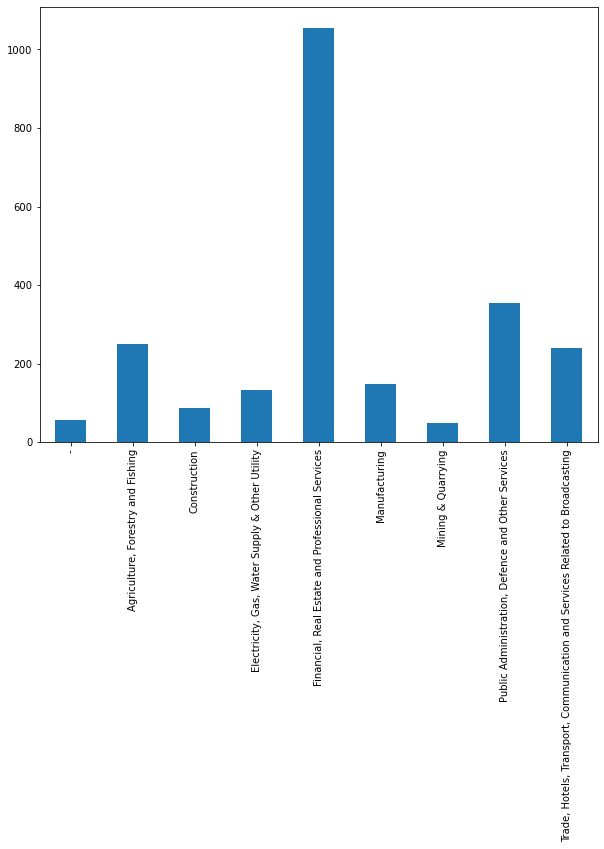

In [101]:
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

data6_labels.sum(axis=0).plot.bar()

In [102]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [103]:
X = []
sentences = list(data6["Sent_clean"])
for sen in sentences:
    X.append(preprocess_text(sen))

y = data6_labels.values

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Neural Network

#### Multi-lable Text Classification Model with Single Output Layer

In [105]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
import re

In [106]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

In [107]:
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('D:\\4sem\\Project\\Project - FM\\Text\\glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [108]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(9, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [109]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 100)          324300    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 9)                 1161      
Total params: 442,709
Trainable params: 118,409
Non-trainable params: 324,300
_________________________________________________________________
None


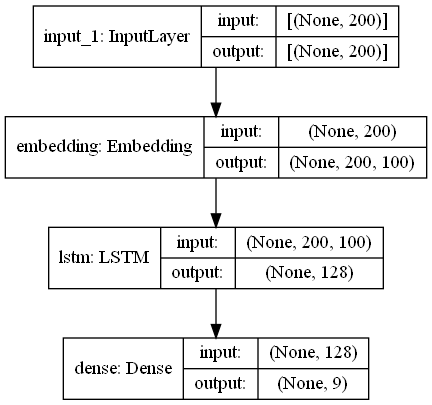

In [110]:
from keras.utils import plot_model
plot_model(model, to_file='model_plota.png', show_shapes=True, show_layer_names=True)

In [111]:
history = model.fit(X_train, y_train, batch_size=128, epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
7/7 [==============================] - 8s 722ms/step - loss: 0.6890 - acc: 0.3684 - val_loss: 0.6561 - val_acc: 0.6140
Epoch 2/12
7/7 [==============================] - 3s 401ms/step - loss: 0.5708 - acc: 0.5394 - val_loss: 0.3578 - val_acc: 0.6140
Epoch 3/12
7/7 [==============================] - 3s 362ms/step - loss: 0.3782 - acc: 0.5824 - val_loss: 0.3392 - val_acc: 0.6140
Epoch 4/12
7/7 [==============================] - 2s 356ms/step - loss: 0.3849 - acc: 0.5460 - val_loss: 0.3434 - val_acc: 0.6140
Epoch 5/12
7/7 [==============================] - 3s 397ms/step - loss: 0.3700 - acc: 0.5597 - val_loss: 0.3446 - val_acc: 0.6140
Epoch 6/12
7/7 [==============================] - 3s 371ms/step - loss: 0.3699 - acc: 0.5512 - val_loss: 0.3429 - val_acc: 0.6140
Epoch 7/12
7/7 [==============================] - 3s 357ms/step - loss: 0.3750 - acc: 0.5425 - val_loss: 0.3412 - val_acc: 0.6140
Epoch 8/12
7/7 [==============================] - 2s 338ms/step - loss: 0.3802 - acc: 0.53

In [112]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

9/9 [==============================] - 0s 42ms/step - loss: 0.3602 - acc: 0.5465
Test Score: 0.3601814806461334
Test Accuracy: 0.5464683771133423


### Multi-lable Text Classification Model with Multiple Output Layers

Many machine learning algorithms support multi-output regression natively.For example, a task that has three output variables will require a neural network output layer with three nodes in the output layer, each with the linear (default) activation function.

In [113]:
y=data6_labels

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [115]:
# First output
y1_train = y_train[["-"]].values
y1_test =  y_test[["-"]].values

# Second output
y2_train = y_train[["Agriculture, Forestry and Fishing"]].values
y2_test =  y_test[["Agriculture, Forestry and Fishing"]].values

# Third output
y3_train = y_train[["Construction"]].values
y3_test =  y_test[["Construction"]].values

# Fourth output
y4_train = y_train[["Electricity, Gas, Water Supply & Other Utility"]].values
y4_test =  y_test[["Electricity, Gas, Water Supply & Other Utility"]].values

# Fifth output
y5_train = y_train[["Financial, Real Estate and Professional Services"]].values
y5_test =  y_test[["Financial, Real Estate and Professional Services"]].values

# Sixth output
y6_train = y_train[["Manufacturing"]].values
y6_test =  y_test[["Manufacturing"]].values

# Sixth output
y7_train = y_train[["Mining & Quarrying"]].values
y7_test =  y_test[["Mining & Quarrying"]].values

# Sixth output
y8_train = y_train[["Public Administration, Defence and Other Services"]].values
y8_test =  y_test[["Public Administration, Defence and Other Services"]].values

# Sixth output
y9_train = y_train[["Trade, Hotels, Transport, Communication and Services Related to Broadcasting"]].values
y9_test =  y_test[["Trade, Hotels, Transport, Communication and Services Related to Broadcasting"]].values



In [116]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [117]:
glove_file = open('D:\\4sem\\Project\\Project - FM\\Text\\glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [118]:
input_1 = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer1 = LSTM(128)(embedding_layer)

output1 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output2 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output3 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output4 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output5 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output6 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output7 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output8 = Dense(1, activation='sigmoid')(LSTM_Layer1)
output9 = Dense(1, activation='sigmoid')(LSTM_Layer1)

model = Model(inputs=input_1, outputs=[output1, output2, output3, output4, output5, output6, output7, output8, output9])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [119]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 200, 100)     324300      input_2[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 128)          117248      embedding_1[0][0]                
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 1)            129         lstm_1[0][0]                     
____________________________________________________________________________________________

In [120]:
from keras.utils import plot_model
plot_model(model, to_file='model_plotb.png', show_shapes=True, show_layer_names=True,dpi=1500)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.672433 to fit



In [121]:
history = model.fit(x=X_train, y=[y1_train, y2_train, y3_train, y4_train, y5_train, y6_train, y7_train, y8_train, y9_train], batch_size=8192, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
1/1 [==============================] - 9s 9s/step - loss: 6.2383 - dense_1_loss: 0.6931 - dense_2_loss: 0.6931 - dense_3_loss: 0.6931 - dense_4_loss: 0.6931 - dense_5_loss: 0.6931 - dense_6_loss: 0.6931 - dense_7_loss: 0.6931 - dense_8_loss: 0.6931 - dense_9_loss: 0.6931 - dense_1_acc: 0.9407 - dense_2_acc: 0.8198 - dense_3_acc: 0.9256 - dense_4_acc: 0.8977 - dense_5_acc: 0.2326 - dense_6_acc: 0.8930 - dense_7_acc: 0.9593 - dense_8_acc: 0.7233 - dense_9_acc: 0.8209 - val_loss: 6.2205 - val_dense_1_loss: 0.6907 - val_dense_2_loss: 0.6915 - val_dense_3_loss: 0.6899 - val_dense_4_loss: 0.6916 - val_dense_5_loss: 0.6913 - val_dense_6_loss: 0.6903 - val_dense_7_loss: 0.6909 - val_dense_8_loss: 0.6924 - val_dense_9_loss: 0.6918 - val_dense_1_acc: 0.9767 - val_dense_2_acc: 0.8186 - val_dense_3_acc: 0.9302 - val_dense_4_acc: 0.9163 - val_dense_5_acc: 0.8233 - val_dense_6_acc: 0.8977 - val_dense_7_acc: 0.9721 - val_dense_8_acc: 0.7256 - val_dense_9_acc: 0.8605
Epoch 2/5
1/1 [=========

In [122]:
score = model.evaluate(x=X_test, y=[y1_test, y2_test, y3_test, y4_test, y5_test, y6_test, y7_test, y8_test, y9_test], verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1]) 

9/9 [==============================] - 0s 45ms/step - loss: 6.0871 - dense_1_loss: 0.6715 - dense_2_loss: 0.6808 - dense_3_loss: 0.6640 - dense_4_loss: 0.6801 - dense_5_loss: 0.6779 - dense_6_loss: 0.6701 - dense_7_loss: 0.6741 - dense_8_loss: 0.6847 - dense_9_loss: 0.6839 - dense_1_acc: 0.9814 - dense_2_acc: 0.7807 - dense_3_acc: 0.9517 - dense_4_acc: 0.8996 - dense_5_acc: 0.8067 - dense_6_acc: 0.8699 - dense_7_acc: 0.9665 - dense_8_acc: 0.7732 - dense_9_acc: 0.7955
Test Score: 6.087057590484619
Test Accuracy: 0.6714752912521362


### Sentiment Prediction

Stop words are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” and etc. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so commonly used that they carry very little useful information.

In [123]:
# Getting list of stop words to be removed from the text
from nltk.corpus import stopwords 
stop_words = pd.DataFrame(stopwords.words('english'))

In [124]:
# removing the special characters in the stopwords
stop_words=stop_words.replace('[^a-zA-Z]', '',regex=True) 

In [125]:
# excluding words which may affect the sentiments of the text

stop_words=stop_words.drop(stop_words.index[[118,131,132,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178]])

In [126]:
sw1 = stop_words[0].values.tolist()

In [127]:
sentiment_data.head(2)

file_name  \
0  201102 PM.txt   
1  201102 PM.txt   

                                                                                                                                                                                                                                                 Sentence  \
0                                                                                                                                                                                                    We are reaching the end of a remarkable fiscal year.   
1  In a globalised world \n with its share of uncertainties and rapid changes, this year brought us some \n opportunities and many challenges as we moved ahead with steady steps on the \n chosen path of fiscal consolidation and high economic growth.   

                 FM  year  Budget               date  \
0  Pranab Mukherjee  2011  Budget  February 28, 2011   
1  Pranab Mukherjee  2011  Budget  February 28, 2011   

                                                                                                                                                                                                                                        Sent_clean  \
0                                                                                                                                                                                              We are reaching the end of a remarkable fiscal year   
1  In a globalised world  with its share of uncertainties and rapid changes  this year brought us some  opportunities and many challenges as we moved ahead with steady steps on the  chosen path of fiscal consolidation and high economic growth   

   length_sent                                               Topic  
0           51  [Financial, Real Estate and Professional Services]  
1          239  [Financial, Real Estate and Professional Services]

In [128]:
# Defining function to remove stop words
def remove_stopword(text):
    text = ' '.join([word for word in text.split() if word not in sw])
    return text

In [129]:
# Other words to be excluded from the text 
oth_words=['per','cent','crore','lakh','http','indiabudget','nic','rs','Rs']

sw=sw1+oth_words

In [130]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'youre',
 'youve',
 'youll',
 'youd',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'shes',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'thatll',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'fe

In [131]:
# Removing Stop words
sentiment_data['Sent_clean_1']=sentiment_data['Sent_clean'].str.lower().apply(lambda x: remove_stopword(x))

<ipython-input-131-e8905318fcb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_data['Sent_clean_1']=sentiment_data['Sent_clean'].str.lower().apply(lambda x: remove_stopword(x))


In [132]:
sentiment_data[710:720]

file_name  \
710  201102 PM.txt   
711  201102 PM.txt   
712  201102 PM.txt   
713  201102 PM.txt   
714  201102 PM.txt   
715  201102 PM.txt   
716  201102 PM.txt   
717  201002 PM.txt   
718  201002 PM.txt   
719  201002 PM.txt   

                                                                                                                                                             Sentence  \
710                                                          My proposals on direct taxes are estimated to result in a revenue loss of \n `11,500 crore for the year.   
711        Proposals relating to indirect taxes are estimated to \n result in a net revenue gain of `11,300 crore, leaving a net loss of `200 crore in \n the Budget.   
712                      As an emerging economy, with a voice on the global stage, India stands \n at the threshold of a decade which presents immense possibilities.   
713                                            We must not \n let the recent strains and tensions hold us back from converting these possibilities \n into realities.   
714                               With oneness of heart, let us all build an India, which in not too \n distant a future, will enter the comity of developed nations.   
715                                                                                               Madam Speaker, with these words, I commend the Budget to the House.   
716                                                                                                                                         http://indiabudget.nic.in   
717  In 2009, when I presented the interim Budget in February and the regular Budget in July in this august House, the Indian economy was facing grave uncertainties.   
718                                                                                              Growth had started decelerating and the business sentiment was weak.   
719                              The economy's capacity to sustain high growth was under serious threat from the widespread economic slowdown in the developed world.   

                   FM  year  Budget                 date  \
710  Pranab Mukherjee  2011  Budget    February 28, 2011   
711  Pranab Mukherjee  2011  Budget    February 28, 2011   
712  Pranab Mukherjee  2011  Budget    February 28, 2011   
713  Pranab Mukherjee  2011  Budget    February 28, 2011   
714  Pranab Mukherjee  2011  Budget    February 28, 2011   
715  Pranab Mukherjee  2011  Budget    February 28, 2011   
716  Pranab Mukherjee  2011  Budget    February 28, 2011   
717  Pranab Mukherjee  2010  Budget  February  26,  2010   
718  Pranab Mukherjee  2010  Budget  February  26,  2010   
719  Pranab Mukherjee  2010  Budget  February  26,  2010   

                                                                                                                                                          Sent_clean  \
710                                                            My proposals on direct taxes are estimated to result in a revenue loss of          crore for the year   
711            Proposals relating to indirect taxes are estimated to  result in a net revenue gain of         crore  leaving a net loss of      crore in  the Budget   
712                        As an emerging economy  with a voice on the global stage  India stands  at the threshold of a decade which presents immense possibilities   
713                                                We must not  let the recent strains and tensions hold us back from converting these possibilities  into realities   
714                                 With oneness of heart  let us all build an India  which in not too  distant a future  will enter the comity of developed nations   
715                                                                                               Madam Speaker  with these words  I commend the Budget to the House   
716                                                                  

In [133]:
# Stemming & lemmatization

from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

stem = SnowballStemmer("english")
lem = WordNetLemmatizer()

def lem_stem(text):
    words = word_tokenize(text) 
    
    
    # 1- Stemming
    words_stem = [stem.stem(w) for w in words]
    
    # 2- Lemmatization
    words_lem = [lem.lemmatize(w) for w in words_stem]
    return words_lem



In [134]:
sentiment_data['Sent_clean_2']=sentiment_data['Sent_clean_1'].apply(lambda x: lem_stem(x))

<ipython-input-134-c3f035b2877b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_data['Sent_clean_2']=sentiment_data['Sent_clean_1'].apply(lambda x: lem_stem(x))


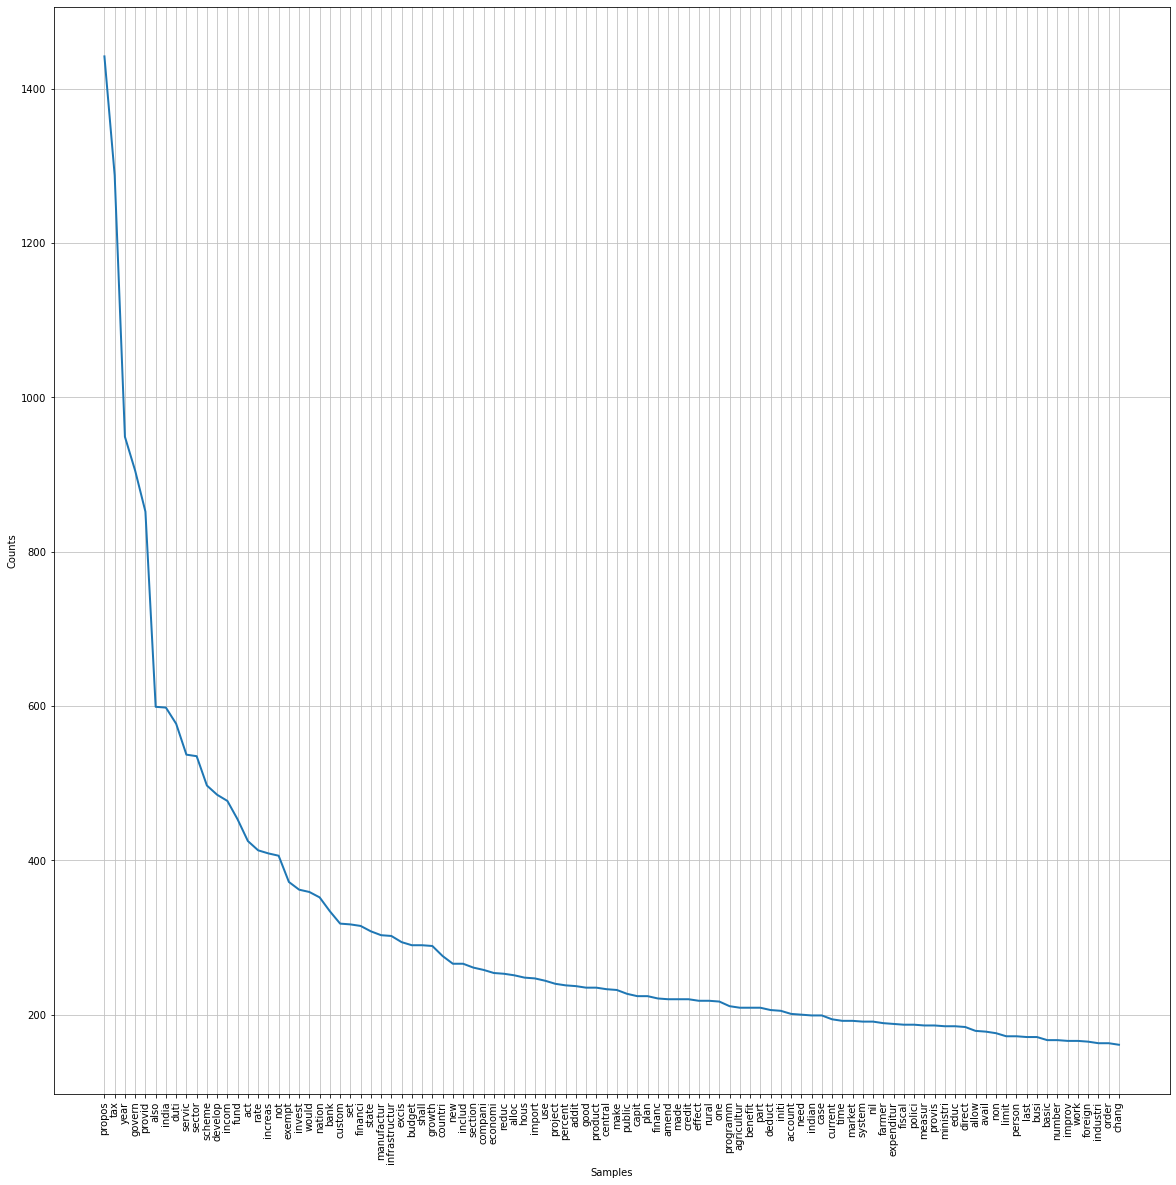

In [135]:
# Frequency distribution of words used in the speech
speech_combined = np.concatenate(sentiment_data.Sent_clean_2)

from nltk.probability import FreqDist
import matplotlib.pyplot as plt

fdist = FreqDist(speech_combined)

plt.figure(figsize=[20,20])
fdist.plot(100)
plt.show()

TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

The sentiment function of textblob returns two properties, polarity, and subjectivity. Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

In [136]:
# Computing line by line polarity of the text
from textblob import TextBlob

def polariy(text): 
    analysis = TextBlob(text) 
    return analysis.sentiment.polarity
    

In [137]:
sentiment_data['polariy']=sentiment_data['Sent_clean_2'].apply(lambda x: polariy(' '.join(x)))

<ipython-input-137-e83c08314245>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_data['polariy']=sentiment_data['Sent_clean_2'].apply(lambda x: polariy(' '.join(x)))


In [138]:
# Computing lsentiments value of the text
def f(sentiment):
    if sentiment > 0:
        val = "Positive"
    elif sentiment == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

In [139]:
sentiment_data['sentiment']=sentiment_data['polariy'].apply(lambda x: f(x))

<ipython-input-139-11514104efde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_data['sentiment']=sentiment_data['polariy'].apply(lambda x: f(x))


In [140]:
sentiment_data.head(10)

file_name  \
0  201102 PM.txt   
1  201102 PM.txt   
2  201102 PM.txt   
3  201102 PM.txt   
4  201102 PM.txt   
5  201102 PM.txt   
6  201102 PM.txt   
7  201102 PM.txt   
8  201102 PM.txt   
9  201102 PM.txt   

                                                                                                                                                                                                                                                 Sentence  \
0                                                                                                                                                                                                    We are reaching the end of a remarkable fiscal year.   
1  In a globalised world \n with its share of uncertainties and rapid changes, this year brought us some \n opportunities and many challenges as we moved ahead with steady steps on the \n chosen path of fiscal consolidation and high economic growth.   
2                                                                                                                                                                                                   Our growth in 2010-11 has been swift and broad-based.   
3                                                                                                                                                                                             The economy is \n back to its pre-crisis growth trajectory.   
4                                                                                                                                                                   While agriculture has shown a rebound, \n industry is regaining its earlier momentum.   
5                                                                                                                                                                                                 Services sector continues its near \n double digit run.   
6                                                                                                                                                                                                               Fiscal consolidation has been impressive.   
7                                                                                          This year has also \n seen significant progress in those critical institutional reforms that would set the \n pace for double-digit growth in the near future.   
8                                                                                                                        While we succeeded in making good progress in addressing many areas \n of our concern, we could have done better in some others.   
9                                                                                          The total food inflation \n declined from 20.2 per cent in February 2010 to less than half at 9.3 per cent in \n January 2011, but it still remains a concern.   

                 FM  year  Budget               date  \
0  Pranab Mukherjee  2011  Budget  February 28, 2011   
1  Pranab Mukherjee  2011  Budget  February 28, 2011   
2  Pranab Mukherjee  2011  Budget  February 28, 2011   
3  Pranab Mukherjee  2011  Budget  February 28, 2011   
4  Pranab Mukherjee  2011  Budget  February 28, 2011   
5  Pranab Mukherjee  2011  Budget  February 28, 2011   
6  Pranab Mukherjee  2011  Budget  February 28, 2011   
7  Pranab Mukherjee  2011  Budget  February 28, 2011   
8  Pranab Mukherjee  2011  Budget  February 28, 2011   
9  Pranab Mukherjee  2011  Budget  February 28, 2011   

                                                                                                                                                                                                                                        Sent_clean  \
0                                                                                                                                          

In [141]:
# Sentiments wise split of the speeches

speech_cons = pd.pivot_table(
    sentiment_data,
    index='file_name',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

speech_cons

sentiment          Negative  Neutral  Positive
file_name                                     
201002 PM.txt            75      394       158
201102 PM.txt            92      462       163
201203 PM.txt            86      459       157
201302 PC.txt            79      492       156
201402 PC Int.txt        45      232        76
201407 AJ.txt           107      551       219
201502 AJ.txt           121      453       203
201602 AJ.txt           155      630       238
201702 AJ.txt           123      508       212
201802 AJ.txt            97      430       202
201902 PG Int.txt        60      247       114
201907 NS.txt            99      534       221

In [142]:
from sklearn.feature_extraction.text import CountVectorizer

In [143]:
# Merging the cleaned text
sentiment_data['Sent_clean_3']=sentiment_data['Sent_clean_2']

for i in range(len(sentiment_data['Sent_clean_2'])):
    sentiment_data['Sent_clean_3'][i] = ' '.join(sentiment_data['Sent_clean_2'][i])

<ipython-input-143-feaa81a96927>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_data['Sent_clean_3']=sentiment_data['Sent_clean_2']
<ipython-input-143-feaa81a96927>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_data['Sent_clean_3'][i] = ' '.join(sentiment_data['Sent_clean_2'][i])
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

### Model Building

In [144]:
# Creating dataset for model building
mod=['Sent_clean_3','sentiment']
model_final=sentiment_data[mod]

In [145]:
model_final.head()

Sent_clean_3  \
0                                                                                                                              reach end remark fiscal year   
1  globalis world share uncertainti rapid chang year brought u opportun mani challeng move ahead steadi step chosen path fiscal consolid high econom growth   
2                                                                                                                                   growth swift broad base   
3                                                                                                                  economi back pre crisi growth trajectori   
4                                                                                                 agricultur shown rebound industri regain earlier momentum   

  sentiment  
0   Neutral  
1  Positive  
2  Negative  
3   Neutral  
4   Neutral

In [182]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier

In [147]:
# Defining dependant and independant variables
x = model_final.Sent_clean_3
y = model_final.sentiment

In [148]:
# splitiing the datasetinto train & test
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=0,test_size=0.3)

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.class sklearn.pipeline.Pipeline(steps, *, memory=None, verbose=False).

In [183]:
# Models used for predicting sentiments

# Logistic
log_reg = Pipeline([('tfidf', TfidfVectorizer()),
                     ('Sentiment', LogisticRegression()),
])

# Naïve Bayes:
nev_bey = Pipeline([('tfidf', TfidfVectorizer()),
                     ('Sentiment', MultinomialNB()),
])

# Linear SVC:
sup_vect = Pipeline([('tfidf', TfidfVectorizer()),
                     ('Sentiment', LinearSVC()),
])

# Random Forest:
rand_for = Pipeline([('tfidf', TfidfVectorizer()),
                     ('Sentiment', RandomForestClassifier(random_state = 32)),
])

# Decision Tree:
decs_tree = Pipeline([('tfidf', TfidfVectorizer()),
                     ('Sentiment', DecisionTreeClassifier(random_state = 32)),
])

In [150]:
# Defining function to run the model and  give appropriate model statistics
def model(obj,name):
    ypred = obj.fit(xtrain,ytrain).predict(xtest)
    return print(name,"\n\n",
                "Accuracy Score:- ",accuracy_score(ytest,ypred),"\n\n Confusion Matrix:- \n",confusion_matrix(ytest,ypred),
                "\n\n Classification Report:- \n",classification_report(ytest,ypred))

In [151]:
model(log_reg,"Logistic Regression")

Logistic Regression 

 Accuracy Score:-  0.8473988439306358 

 Confusion Matrix:- 
 [[ 163  170   15]
 [   1 1631    3]
 [  11  196  405]] 

 Classification Report:- 
               precision    recall  f1-score   support

    Negative       0.93      0.47      0.62       348
     Neutral       0.82      1.00      0.90      1635
    Positive       0.96      0.66      0.78       612

    accuracy                           0.85      2595
   macro avg       0.90      0.71      0.77      2595
weighted avg       0.87      0.85      0.83      2595



C:\Users\MSI\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [152]:
model(nev_bey,"Naïve Bayes:")

Naïve Bayes: 

 Accuracy Score:-  0.702504816955684 

 Confusion Matrix:- 
 [[  31  293   24]
 [   1 1629    5]
 [   1  448  163]] 

 Classification Report:- 
               precision    recall  f1-score   support

    Negative       0.94      0.09      0.16       348
     Neutral       0.69      1.00      0.81      1635
    Positive       0.85      0.27      0.41       612

    accuracy                           0.70      2595
   macro avg       0.83      0.45      0.46      2595
weighted avg       0.76      0.70      0.63      2595



In [153]:
model(sup_vect,"Support Vector")

Support Vector 

 Accuracy Score:-  0.9310211946050096 

 Confusion Matrix:- 
 [[ 258   71   19]
 [   1 1629    5]
 [  16   67  529]] 

 Classification Report:- 
               precision    recall  f1-score   support

    Negative       0.94      0.74      0.83       348
     Neutral       0.92      1.00      0.96      1635
    Positive       0.96      0.86      0.91       612

    accuracy                           0.93      2595
   macro avg       0.94      0.87      0.90      2595
weighted avg       0.93      0.93      0.93      2595



Random forest is a supervised learning algorithm. The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

One big advantage of random forest is that it can be used for both classification and regression problems, which form the majority of current machine learning systems.

random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

In [154]:
model(rand_for,"Random Forest")

Random Forest 

 Accuracy Score:-  0.948747591522158 

 Confusion Matrix:- 
 [[ 290   31   27]
 [   2 1631    2]
 [  24   47  541]] 

 Classification Report:- 
               precision    recall  f1-score   support

    Negative       0.92      0.83      0.87       348
     Neutral       0.95      1.00      0.98      1635
    Positive       0.95      0.88      0.92       612

    accuracy                           0.95      2595
   macro avg       0.94      0.90      0.92      2595
weighted avg       0.95      0.95      0.95      2595



In [184]:
model(decs_tree,"Decision Tree")

Decision Tree 

 Accuracy Score:-  0.9591522157996146 

 Confusion Matrix:- 
 [[ 301   17   30]
 [   6 1628    1]
 [  32   20  560]] 

 Classification Report:- 
               precision    recall  f1-score   support

    Negative       0.89      0.86      0.88       348
     Neutral       0.98      1.00      0.99      1635
    Positive       0.95      0.92      0.93       612

    accuracy                           0.96      2595
   macro avg       0.94      0.93      0.93      2595
weighted avg       0.96      0.96      0.96      2595



### Ensemble Model

Ensemble models in machine learning combine the decisions from multiple models to improve the overall performance and better predictive performance than could be obtained from any of the constituent learning algorithms alone. 

In [155]:
classifiers = [
    ("randfor", rand_for),
    ("supportvect", sup_vect),
    #("logisticreg", log_reg),
    #("naivebay", nev_bey),
]

A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.

Hard Voting: In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.
Soft Voting: In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability averaged by each classifier.

In [156]:
from sklearn.ensemble import VotingClassifier
#create our voting classifier, inputting our models
ensemble = VotingClassifier(classifiers, voting="hard")
#fit model to training data
ensemble.fit(xtrain, ytrain)
#test our model on the test data
ensemble.score(xtest, ytest)

0.9402697495183044

### EDA

In [157]:
speech_cons=speech_cons.div(speech_cons.sum(1),axis=0)

<AxesSubplot:xlabel='file_name'>

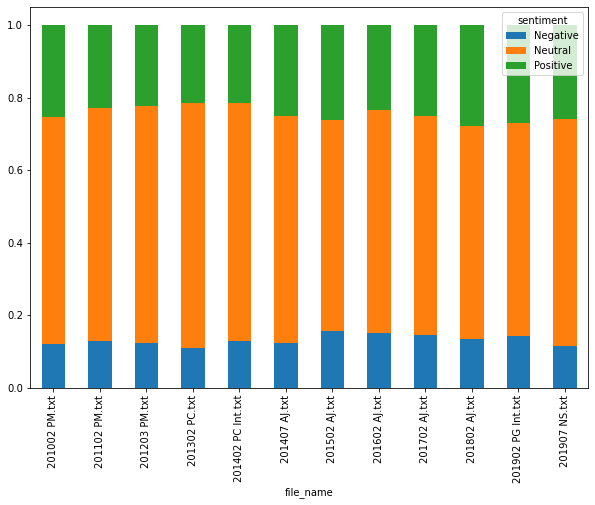

In [158]:
speech_cons.plot.bar(stacked=True,figsize=(10,7))

In [159]:
sentiment_data.Sent_clean_1[sentiment_data.file_name=='201002 PM.txt']

717     presented interim budget february regular budget july august house indian economy facing grave uncertainties
718                                                              growth started decelerating business sentiment weak
719                 economy capacity sustain high growth serious threat widespread economic slowdown developed world
720                                    not clear us also policy makers many countries crisis would eventually unfold
721                                                                      would impact growth momentum indian economy
                                                            ...                                                     
1339                                                                                                      time right
1340                                    placed faith hands people know depended upon rise occasion national interest
1341                           placed faith collective conscienc

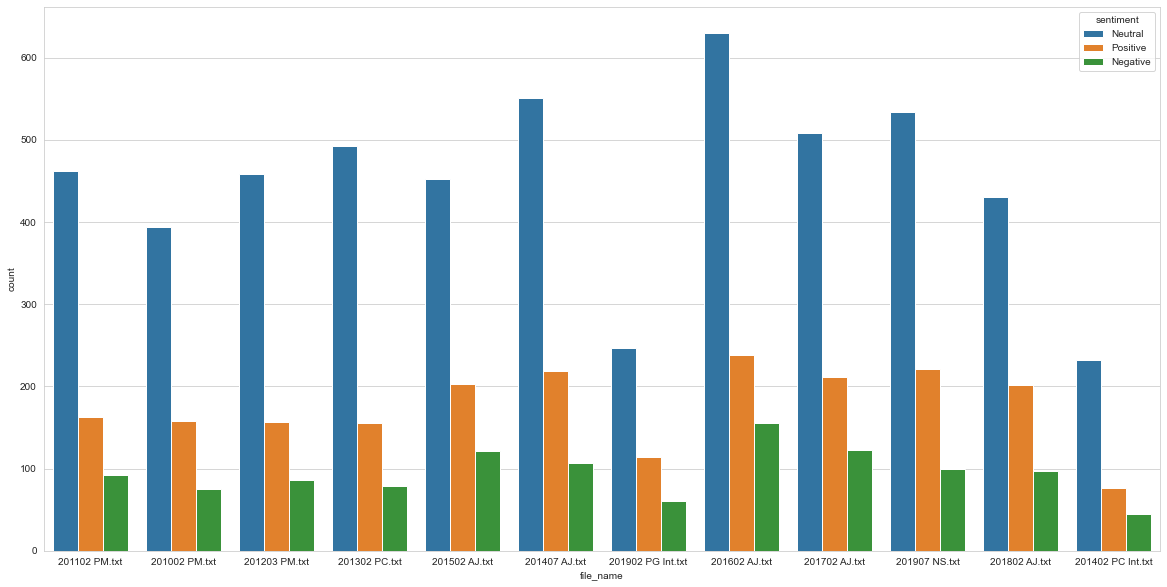

In [160]:
# Sentiments wise split of the speeches
import seaborn as sns
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="file_name",hue="sentiment", data=sentiment_data)

### Individual speech wise analysis

In [161]:
sentiment_data.shape

(8650, 14)

In [162]:
sentiment_data.tail()

file_name  \
8645  201402 PC Int.txt   
8646  201402 PC Int.txt   
8647  201402 PC Int.txt   
8648  201402 PC Int.txt   
8649  201402 PC Int.txt   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Sentence  \
8645                                                                                                                                                                                                                                                                                                                                                                                                 Our way of governance has not come in the way of lifting 140 million people out of \n poverty in the last ten years.   
8646                                                                                                                                                                                                                                                                                                                                                                                                                     That is the greatest achievement of the UPA Governments, and \n we are proud of the achievement.   
8647                                                                                                                                                                                                                                                                                                                                                                                                          In the ten years that I have been in the North Block, I have seen the best of times and \n difficult times.   
8648  Never did I lose faith in Jawaharlal Nehru_x0092_s idea of India that, in the words of \n Sunil Khilnani, _x0093_sought to coordinate within the form of a modern state a variety of values: \n democracy, religious tolerance, economic development and cultural pluralism._x0094_ It is with \n that faith that I shall remain on the bridge until the day when, I am sure, the people of India \n will entrust the responsibility to a hand that will hold the _x0093_sceptre swayed with equity._x0094_ Let ...   
8649                                                                                                                                                                                                                                                                                                                                                                                                                                           Madam Speaker, with these words I commend the Interim Budget to the House.   

                  FM  year          Budget               date  \
8645  P. Chidambaram  2014  Interim Budget  February 17, 2014   
8646  P. Chidambaram  2014  Interim Budget  February 17, 2014   
8647  P. Chidambaram  2014  Interim Budget  February 17, 2014   
8648  P. Chidambaram  2014  Interim Budget  February 17, 2014   
8649  P. Chidambaram  2014  Interim Budget  February 17, 2014   

                                                                                                                                                                                                                                                                                                                                                                                                                     

In [163]:
# Creating new dataframe with required fields
var=['file_name','FM','Budget','date','Sent_clean_1','Sent_clean_2','Sent_clean_3','polariy','sentiment','Topic']
final_df=sentiment_data[var]

In [164]:
final_df.tail()

file_name              FM          Budget               date  \
8645  201402 PC Int.txt  P. Chidambaram  Interim Budget  February 17, 2014   
8646  201402 PC Int.txt  P. Chidambaram  Interim Budget  February 17, 2014   
8647  201402 PC Int.txt  P. Chidambaram  Interim Budget  February 17, 2014   
8648  201402 PC Int.txt  P. Chidambaram  Interim Budget  February 17, 2014   
8649  201402 PC Int.txt  P. Chidambaram  Interim Budget  February 17, 2014   

                                                                                                                                                                                                                                                                                                                                                                                                    Sent_clean_1  \
8645                                                                                                                                                                                                                                                                                                                                   way governance not come way lifting million people poverty last ten years   
8646                                                                                                                                                                                                                                                                                                                                                      greatest achievement upa governments proud achievement   
8647                                                                                                                                                                                                                                                                                                                                                       ten years north block seen best times difficult times   
8648  never lose faith jawaharlal nehru idea india words sunil khilnani sought coordinate within form modern state variety values democracy religious tolerance economic development cultural pluralism faith shall remain bridge day sure people india entrust responsibility hand hold sceptre swayed equity let sign couplet sage thiruvalluvar vel anru venri tharuvathu mannavan kol athuvoom kodaathu enin   
8649                                                                                                                                                                                                                                                                                                                                                            madam speaker words commend interim budget house   

                                                                                                                                                                                                                                                                                                                                                                                                                     Sent_clean_2  \
8645                                                                                                                                                                                                                                                                                                                                                [way, govern, not, come, way, lift, million, peopl, poverti, last, ten, year]   
8646                                                                                                                                                                                                                                                                                  

In [165]:
final_df=final_df.explode('Topic')

In [166]:
final_df.tail()

file_name              FM          Budget               date  \
8647  201402 PC Int.txt  P. Chidambaram  Interim Budget  February 17, 2014   
8647  201402 PC Int.txt  P. Chidambaram  Interim Budget  February 17, 2014   
8648  201402 PC Int.txt  P. Chidambaram  Interim Budget  February 17, 2014   
8648  201402 PC Int.txt  P. Chidambaram  Interim Budget  February 17, 2014   
8649  201402 PC Int.txt  P. Chidambaram  Interim Budget  February 17, 2014   

                                                                                                                                                                                                                                                                                                                                                                                                    Sent_clean_1  \
8647                                                                                                                                                                                                                                                                                                                                                       ten years north block seen best times difficult times   
8647                                                                                                                                                                                                                                                                                                                                                       ten years north block seen best times difficult times   
8648  never lose faith jawaharlal nehru idea india words sunil khilnani sought coordinate within form modern state variety values democracy religious tolerance economic development cultural pluralism faith shall remain bridge day sure people india entrust responsibility hand hold sceptre swayed equity let sign couplet sage thiruvalluvar vel anru venri tharuvathu mannavan kol athuvoom kodaathu enin   
8648  never lose faith jawaharlal nehru idea india words sunil khilnani sought coordinate within form modern state variety values democracy religious tolerance economic development cultural pluralism faith shall remain bridge day sure people india entrust responsibility hand hold sceptre swayed equity let sign couplet sage thiruvalluvar vel anru venri tharuvathu mannavan kol athuvoom kodaathu enin   
8649                                                                                                                                                                                                                                                                                                                                                            madam speaker words commend interim budget house   

                                                                                                                                                                                                                                                                                                                                                                                                                     Sent_clean_2  \
8647                                                                                                                                                                                                                                                                                                                                                                 [ten, year, north, block, seen, best, time, difficult, time]   
8647                                                                                                                                                                                                                                                                                  

### Pranabh Mukherjee -2010

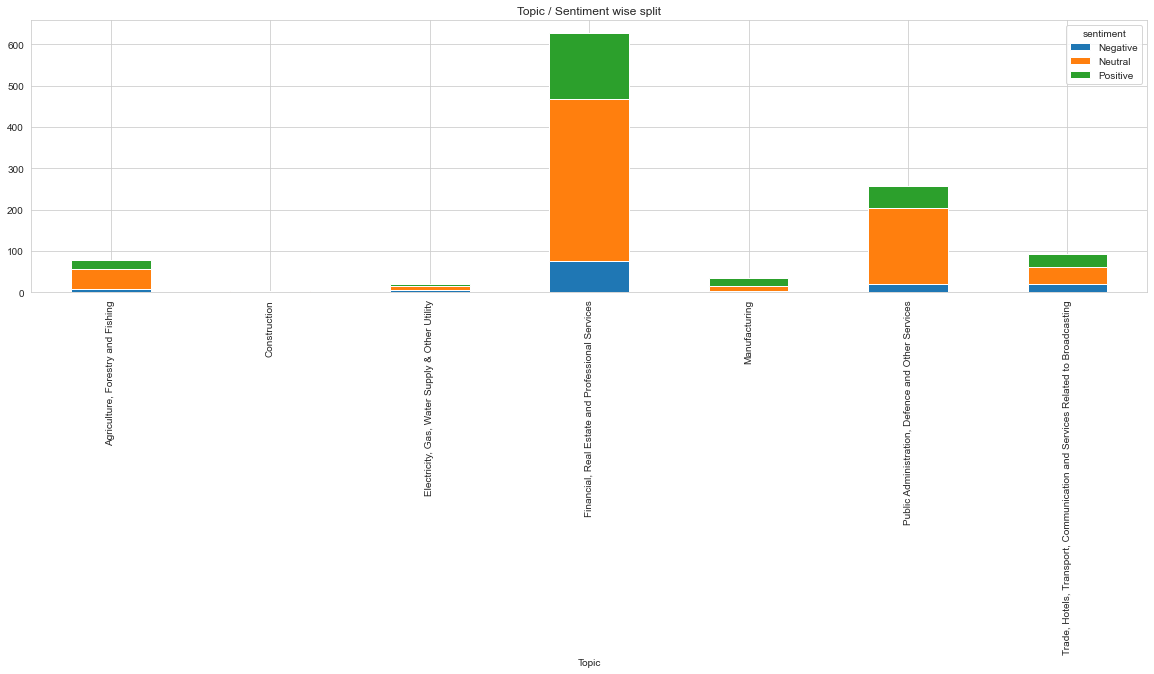

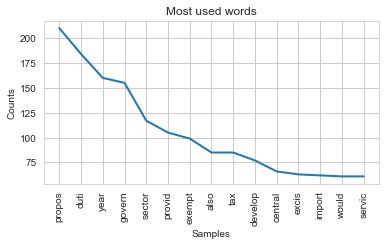

<AxesSubplot:title={'center':'Speech Trigrams'}>

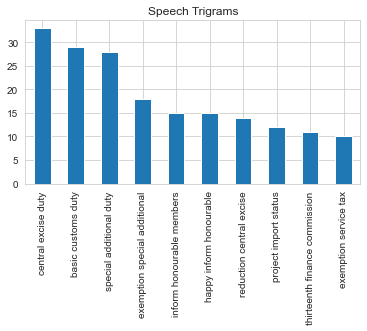

In [167]:
PM_2010 = pd.pivot_table(
    final_df[final_df.file_name=='201002 PM.txt'],
    index='Topic',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

PM_2010.plot.bar(stacked=True,figsize=(20,5),title='Topic / Sentiment wise split')

speech_combined = np.concatenate(final_df.Sent_clean_2[final_df.file_name=='201002 PM.txt'].values)

fdist = FreqDist(speech_combined)

plt.figure(figsize=[6,3])
fdist.plot(15,title='Most used words')
plt.show()


trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=150)

X_trigram = trigram_count_vectorizer.fit_transform(final_df.Sent_clean_1[final_df.file_name=='201002 PM.txt'])

DTM_trigram = pd.DataFrame(X_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

DTM_trigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(6,3),title='Speech Trigrams')  

### Pranabh Mukherjee -2011

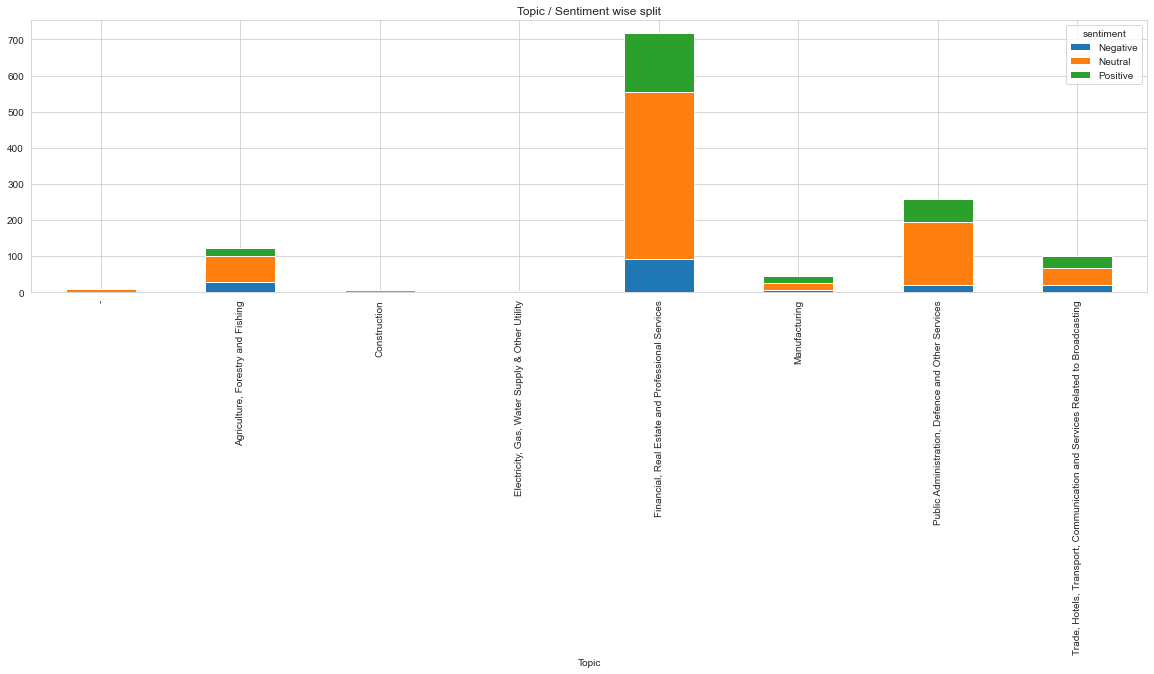

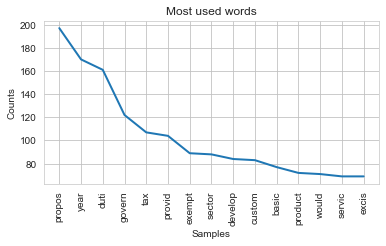

<AxesSubplot:title={'center':'Speech Trigrams'}>

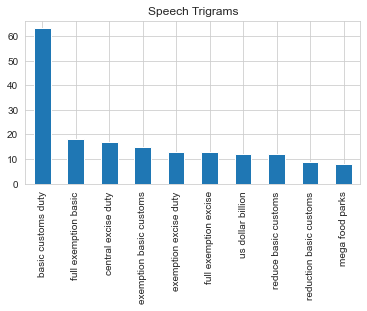

In [168]:
PM_2010 = pd.pivot_table(
    final_df[final_df.file_name=='201102 PM.txt'],
    index='Topic',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

PM_2010.plot.bar(stacked=True,figsize=(20,5),title='Topic / Sentiment wise split')

speech_combined = np.concatenate(final_df.Sent_clean_2[final_df.file_name=='201102 PM.txt'].values)

fdist = FreqDist(speech_combined)

plt.figure(figsize=[6,3])
fdist.plot(15,title='Most used words')
plt.show()


trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=150)

X_trigram = trigram_count_vectorizer.fit_transform(final_df.Sent_clean_1[final_df.file_name=='201102 PM.txt'])

DTM_trigram = pd.DataFrame(X_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

DTM_trigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(6,3),title='Speech Trigrams')  

### Pranab Mukherjee -2012

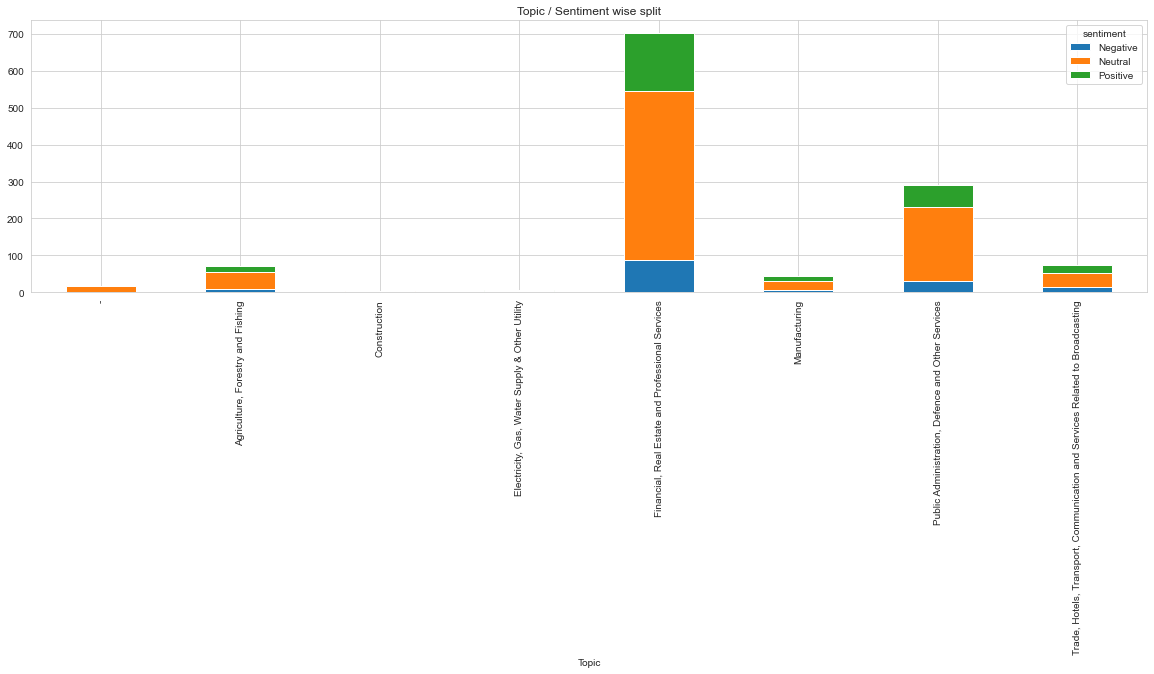

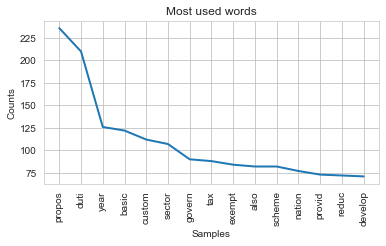

<AxesSubplot:title={'center':'Speech Trigrams'}>

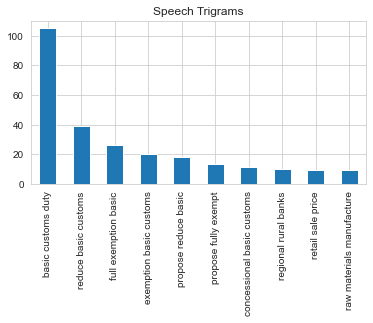

In [169]:
PM_2010 = pd.pivot_table(
    final_df[final_df.file_name=='201203 PM.txt'],
    index='Topic',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

PM_2010.plot.bar(stacked=True,figsize=(20,5),title='Topic / Sentiment wise split')

speech_combined = np.concatenate(final_df.Sent_clean_2[final_df.file_name=='201203 PM.txt'].values)

fdist = FreqDist(speech_combined)

plt.figure(figsize=[6,3])
fdist.plot(15,title='Most used words')
plt.show()


trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=150)

X_trigram = trigram_count_vectorizer.fit_transform(final_df.Sent_clean_1[final_df.file_name=='201203 PM.txt'])

DTM_trigram = pd.DataFrame(X_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

DTM_trigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(6,3),title='Speech Trigrams')  

### P Chidambaram-2013

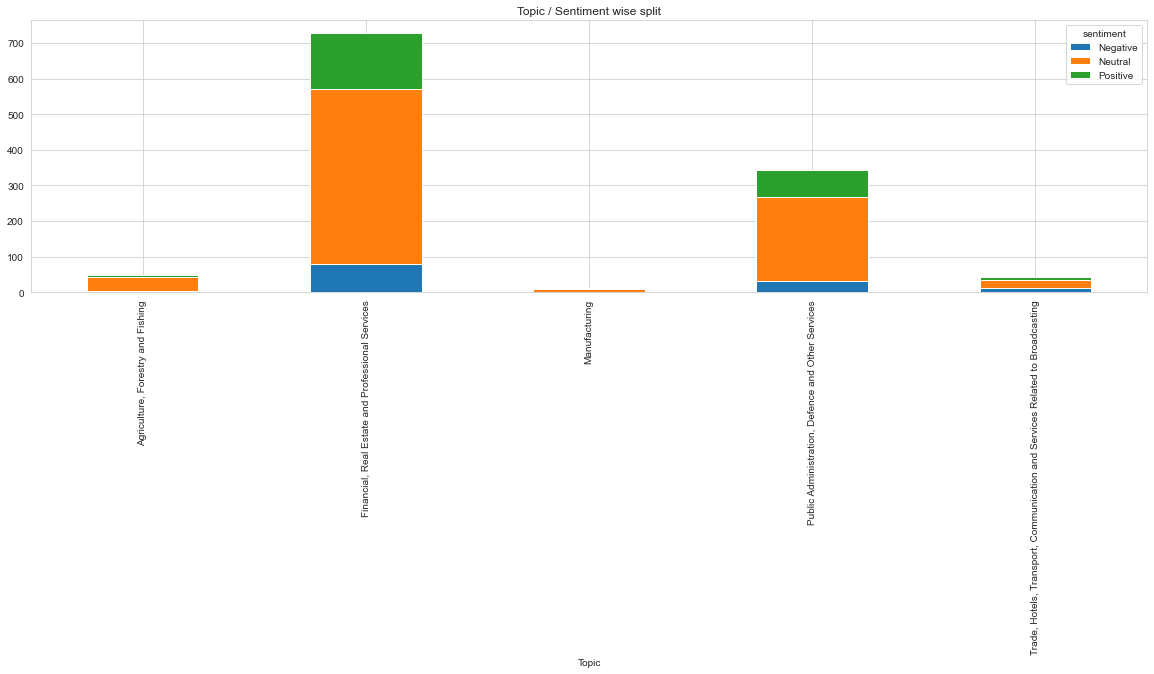

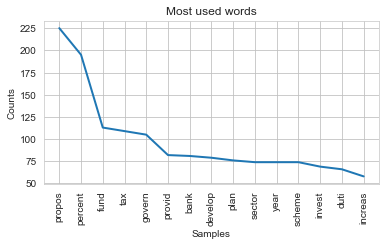

<AxesSubplot:title={'center':'Speech Trigrams'}>

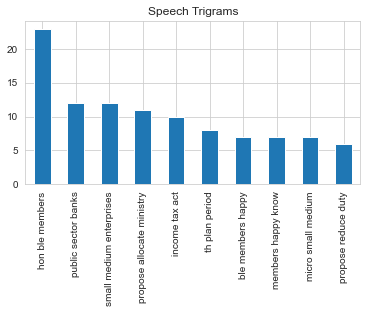

In [170]:
PM_2010 = pd.pivot_table(
    final_df[final_df.file_name=='201302 PC.txt'],
    index='Topic',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

PM_2010.plot.bar(stacked=True,figsize=(20,5),title='Topic / Sentiment wise split')

speech_combined = np.concatenate(final_df.Sent_clean_2[final_df.file_name=='201302 PC.txt'].values)

fdist = FreqDist(speech_combined)

plt.figure(figsize=[6,3])
fdist.plot(15,title='Most used words')
plt.show()


trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=150)

X_trigram = trigram_count_vectorizer.fit_transform(final_df.Sent_clean_1[final_df.file_name=='201302 PC.txt'])

DTM_trigram = pd.DataFrame(X_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

DTM_trigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(6,3),title='Speech Trigrams')  

### P Chidambaram - 2014 (Int)

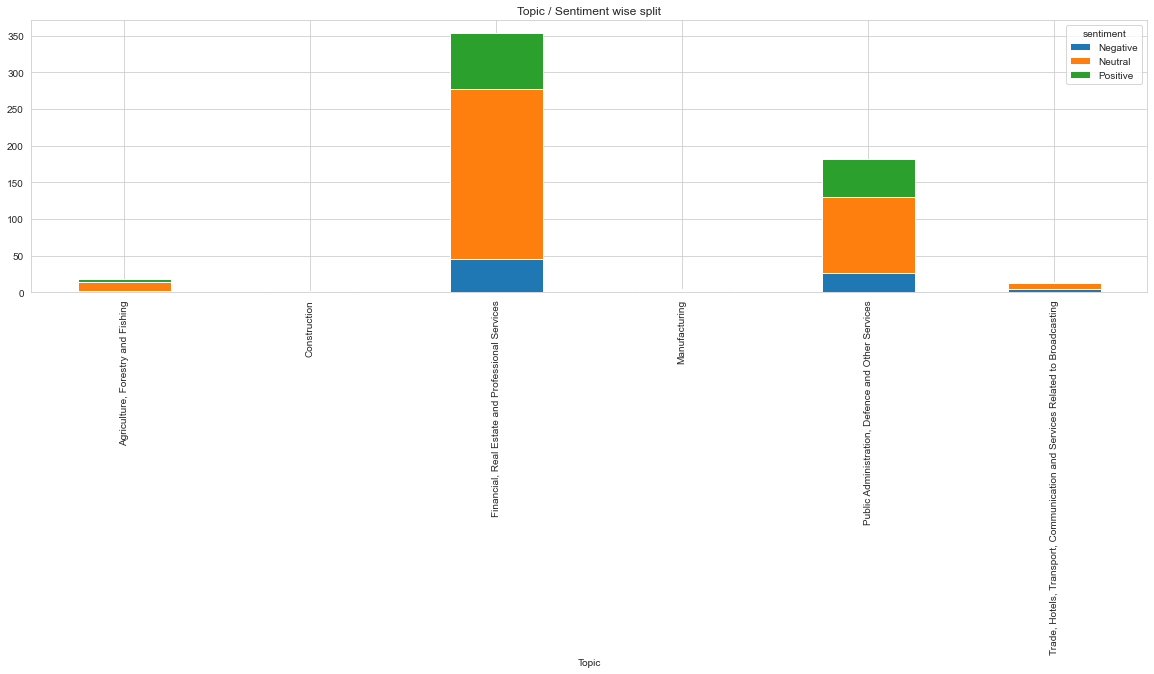

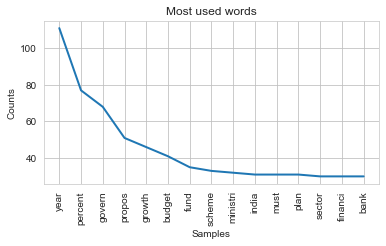

<AxesSubplot:title={'center':'Speech Trigrams'}>

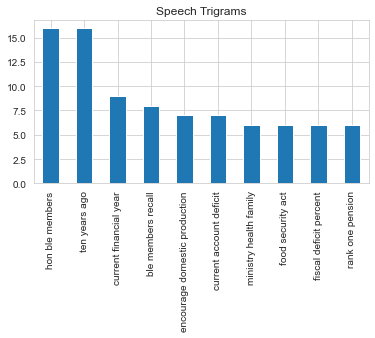

In [171]:
PM_2010 = pd.pivot_table(
    final_df[final_df.file_name=='201402 PC Int.txt'],
    index='Topic',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

PM_2010.plot.bar(stacked=True,figsize=(20,5),title='Topic / Sentiment wise split')

speech_combined = np.concatenate(final_df.Sent_clean_2[final_df.file_name=='201402 PC Int.txt'].values)

fdist = FreqDist(speech_combined)

plt.figure(figsize=[6,3])
fdist.plot(15,title='Most used words')
plt.show()


trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=150)

X_trigram = trigram_count_vectorizer.fit_transform(final_df.Sent_clean_1[final_df.file_name=='201402 PC Int.txt'])

DTM_trigram = pd.DataFrame(X_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

DTM_trigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(6,3),title='Speech Trigrams') 

### Arun Jaitely-2014

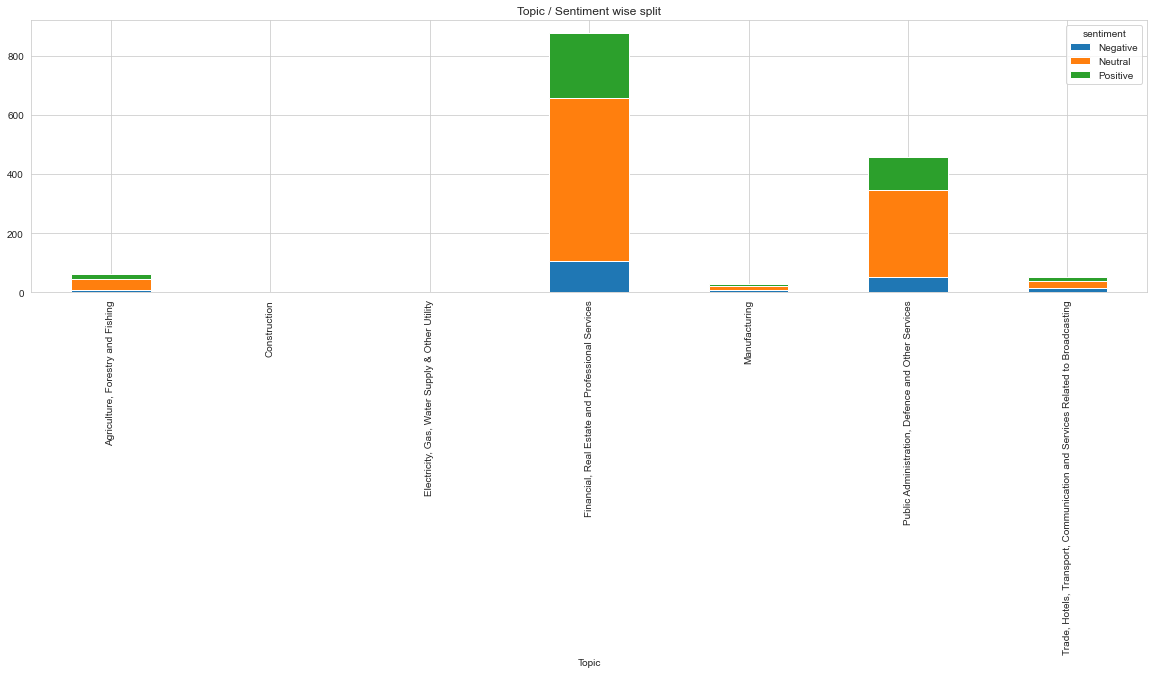

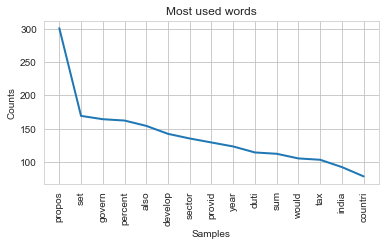

<AxesSubplot:title={'center':'Speech Trigrams'}>

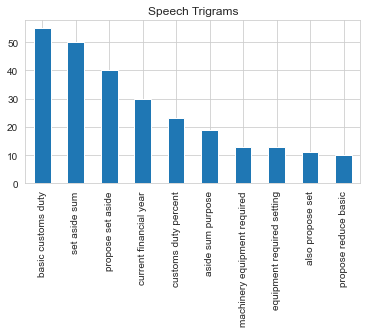

In [172]:
PM_2010 = pd.pivot_table(
    final_df[final_df.file_name=='201407 AJ.txt'],
    index='Topic',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

PM_2010.plot.bar(stacked=True,figsize=(20,5),title='Topic / Sentiment wise split')

speech_combined = np.concatenate(final_df.Sent_clean_2[final_df.file_name=='201407 AJ.txt'].values)

fdist = FreqDist(speech_combined)

plt.figure(figsize=[6,3])
fdist.plot(15,title='Most used words')
plt.show()


trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=150)

X_trigram = trigram_count_vectorizer.fit_transform(final_df.Sent_clean_1[final_df.file_name=='201407 AJ.txt'])

DTM_trigram = pd.DataFrame(X_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

DTM_trigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(6,3),title='Speech Trigrams') 

### Arun Jaitely-2015

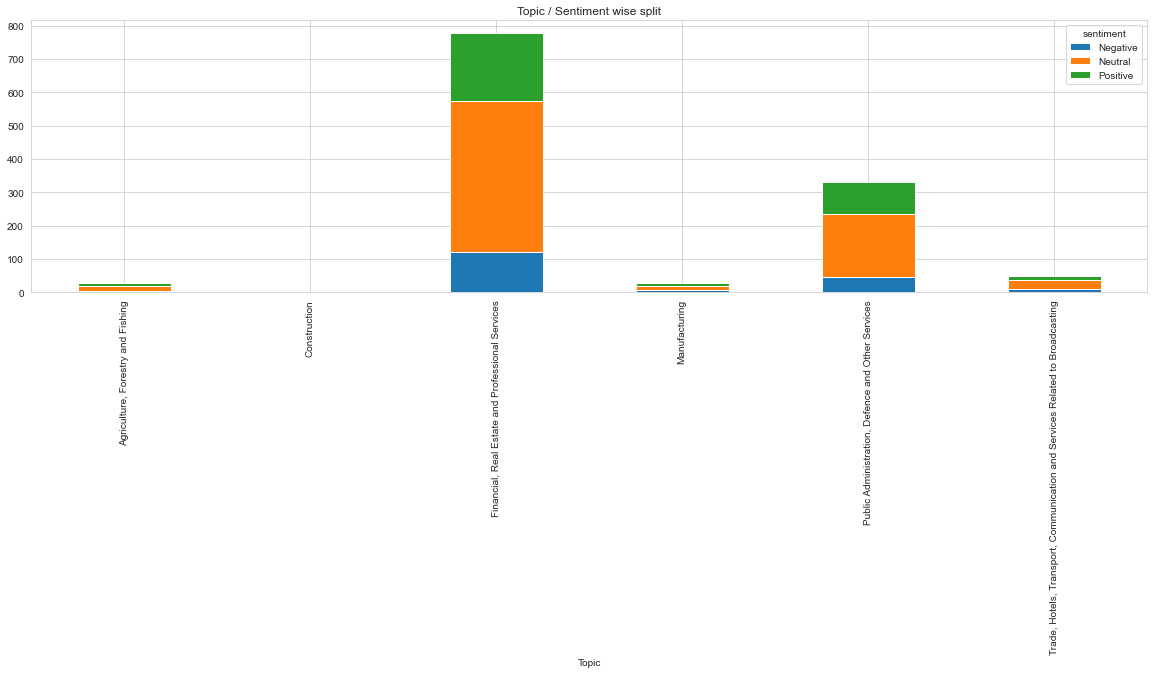

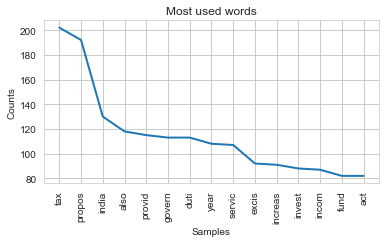

<AxesSubplot:title={'center':'Speech Trigrams'}>

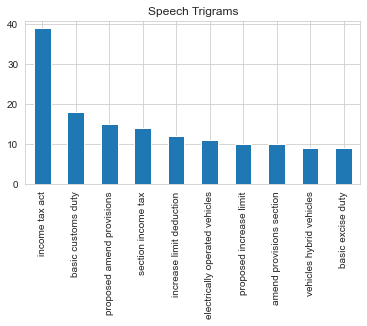

In [173]:
PM_2010 = pd.pivot_table(
    final_df[final_df.file_name=='201502 AJ.txt'],
    index='Topic',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

PM_2010.plot.bar(stacked=True,figsize=(20,5),title='Topic / Sentiment wise split')

speech_combined = np.concatenate(final_df.Sent_clean_2[final_df.file_name=='201502 AJ.txt'].values)

fdist = FreqDist(speech_combined)

plt.figure(figsize=[6,3])
fdist.plot(15,title='Most used words')
plt.show()


trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=150)

X_trigram = trigram_count_vectorizer.fit_transform(final_df.Sent_clean_1[final_df.file_name=='201502 AJ.txt'])

DTM_trigram = pd.DataFrame(X_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

DTM_trigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(6,3),title='Speech Trigrams') 

### Arun Jaitely-2016

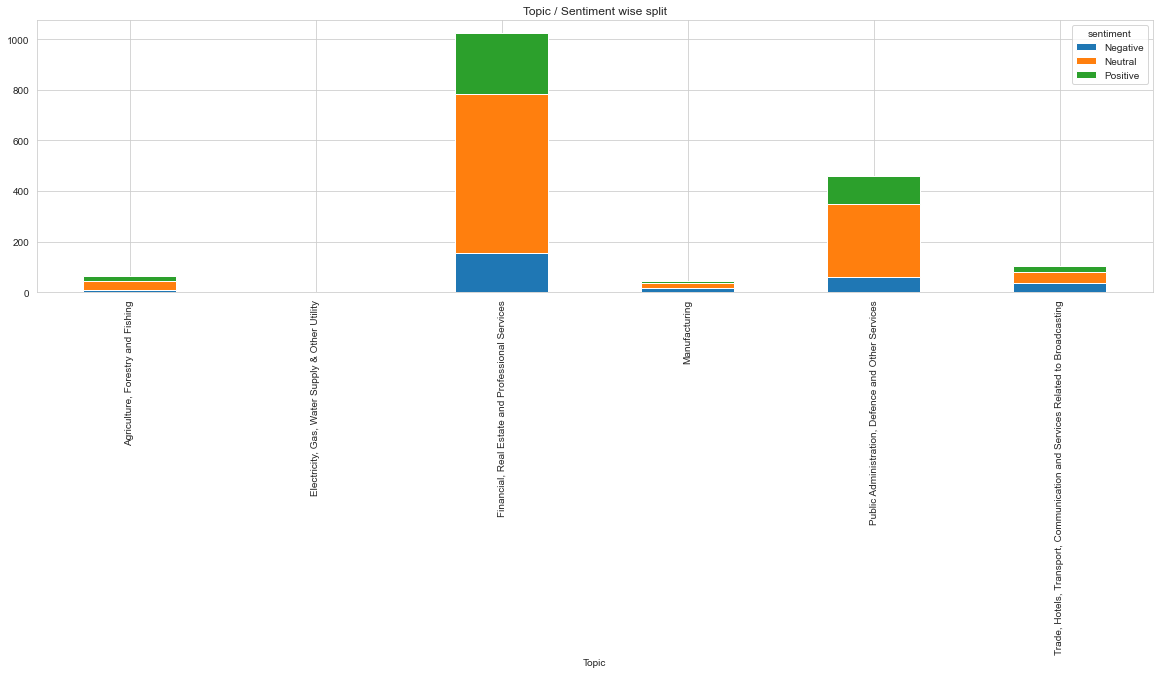

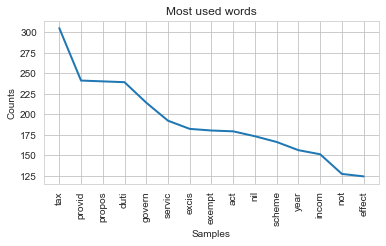

<AxesSubplot:title={'center':'Speech Trigrams'}>

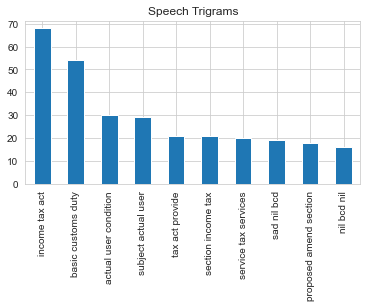

In [174]:
PM_2010 = pd.pivot_table(
    final_df[final_df.file_name=='201602 AJ.txt'],
    index='Topic',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

PM_2010.plot.bar(stacked=True,figsize=(20,5),title='Topic / Sentiment wise split')

speech_combined = np.concatenate(final_df.Sent_clean_2[final_df.file_name=='201602 AJ.txt'].values)

fdist = FreqDist(speech_combined)

plt.figure(figsize=[6,3])
fdist.plot(15,title='Most used words')
plt.show()


trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=150)

X_trigram = trigram_count_vectorizer.fit_transform(final_df.Sent_clean_1[final_df.file_name=='201602 AJ.txt'])

DTM_trigram = pd.DataFrame(X_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

DTM_trigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(6,3),title='Speech Trigrams') 

### Arun Jaitely-2017

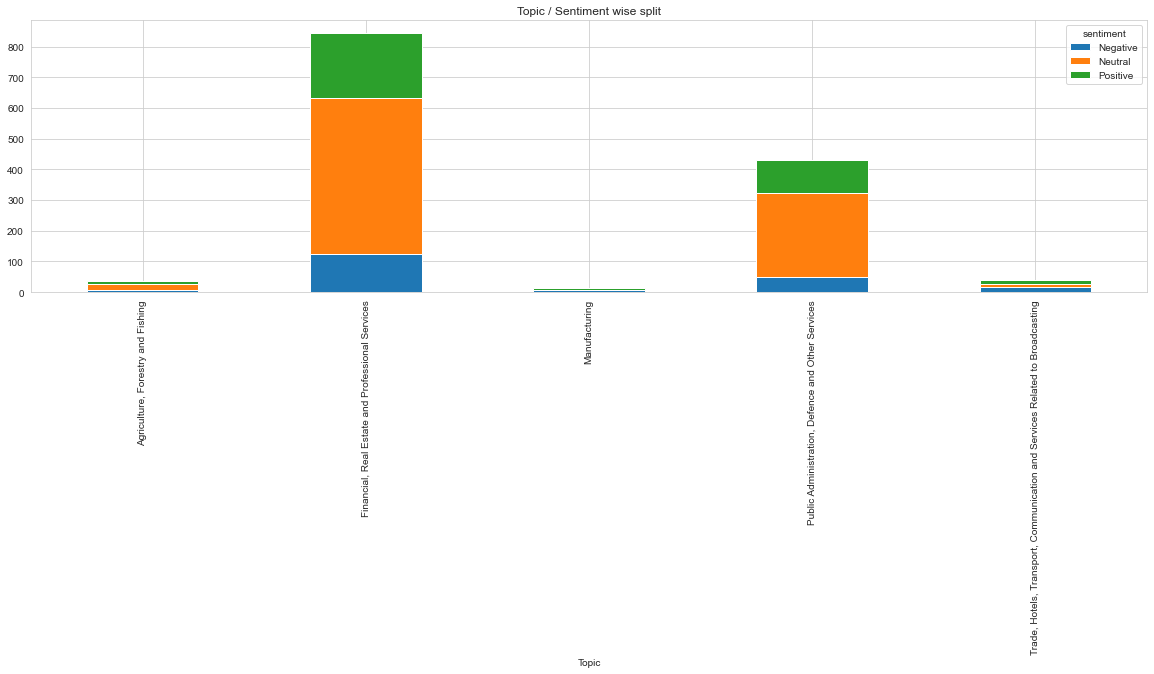

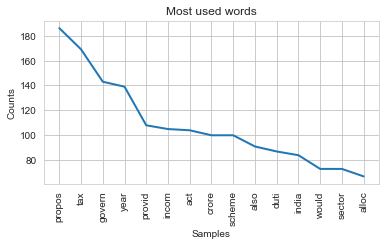

<AxesSubplot:title={'center':'Speech Trigrams'}>

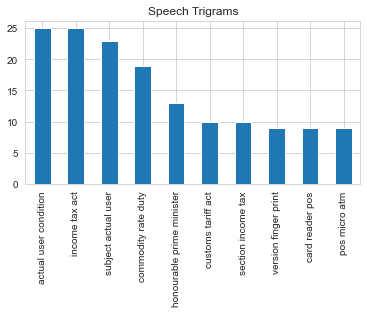

In [175]:
PM_2010 = pd.pivot_table(
    final_df[final_df.file_name=='201702 AJ.txt'],
    index='Topic',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

PM_2010.plot.bar(stacked=True,figsize=(20,5),title='Topic / Sentiment wise split')

speech_combined = np.concatenate(final_df.Sent_clean_2[final_df.file_name=='201702 AJ.txt'].values)

fdist = FreqDist(speech_combined)

plt.figure(figsize=[6,3])
fdist.plot(15,title='Most used words')
plt.show()


trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=150)

X_trigram = trigram_count_vectorizer.fit_transform(final_df.Sent_clean_1[final_df.file_name=='201702 AJ.txt'])

DTM_trigram = pd.DataFrame(X_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

DTM_trigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(6,3),title='Speech Trigrams') 

### Arun Jaitely-2018

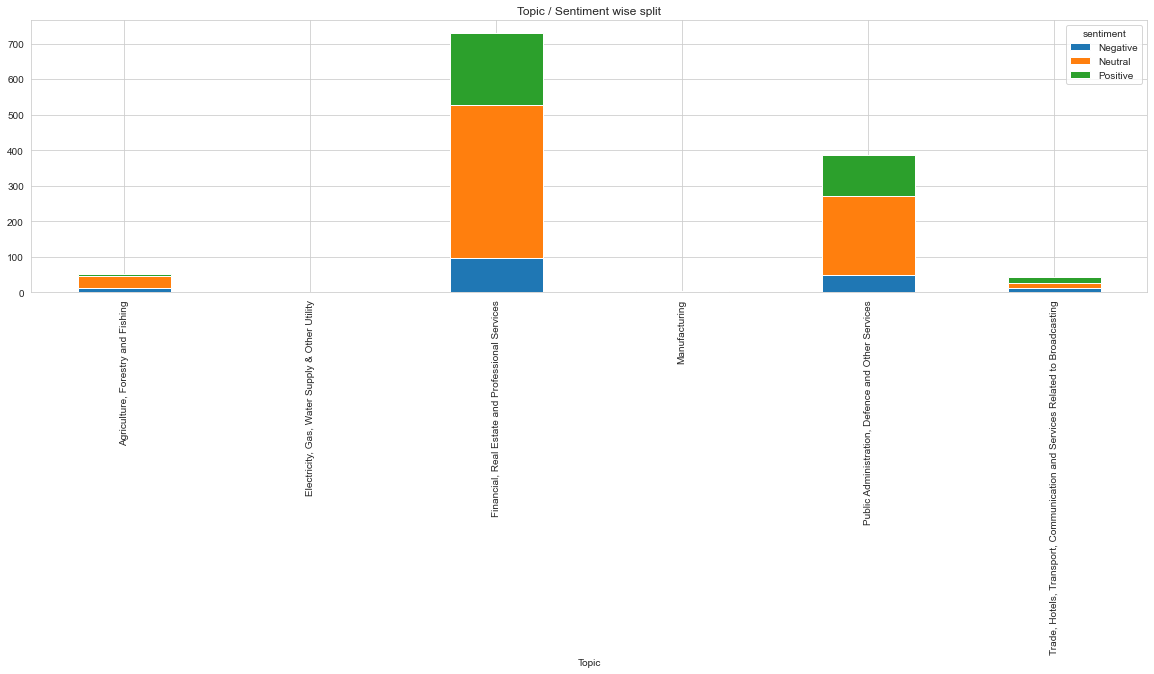

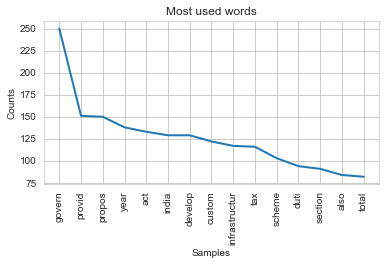

<AxesSubplot:title={'center':'Speech Trigrams'}>

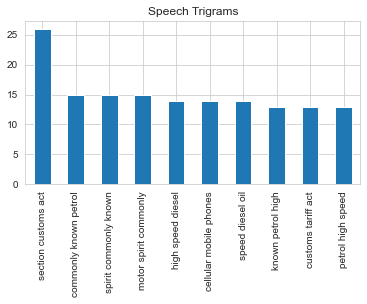

In [176]:
PM_2010 = pd.pivot_table(
    final_df[final_df.file_name=='201802 AJ.txt'],
    index='Topic',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

PM_2010.plot.bar(stacked=True,figsize=(20,5),title='Topic / Sentiment wise split')

speech_combined = np.concatenate(final_df.Sent_clean_2[final_df.file_name=='201802 AJ.txt'].values)

fdist = FreqDist(speech_combined)

plt.figure(figsize=[6,3])
fdist.plot(15,title='Most used words')
plt.show()


trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=150)

X_trigram = trigram_count_vectorizer.fit_transform(final_df.Sent_clean_1[final_df.file_name=='201802 AJ.txt'])

DTM_trigram = pd.DataFrame(X_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

DTM_trigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(6,3),title='Speech Trigrams') 

### Piyush Goyal-2019 (Int)

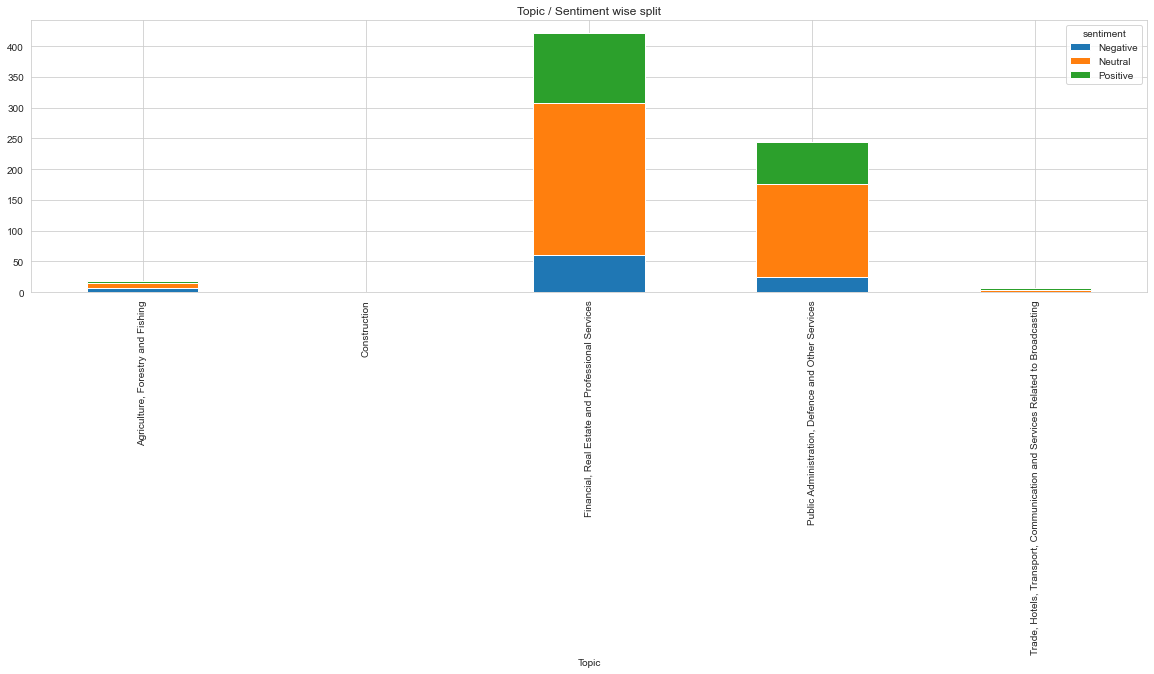

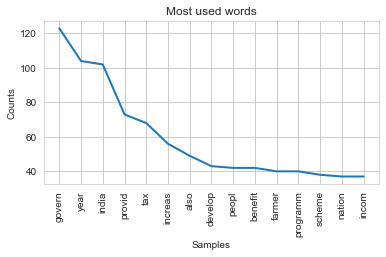

<AxesSubplot:title={'center':'Speech Trigrams'}>

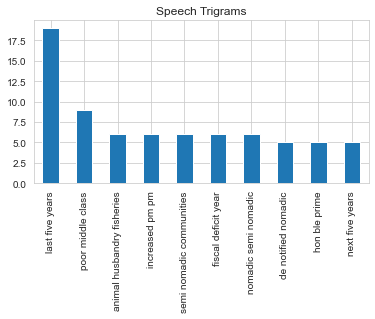

In [177]:
PM_2010 = pd.pivot_table(
    final_df[final_df.file_name=='201902 PG Int.txt'],
    index='Topic',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

PM_2010.plot.bar(stacked=True,figsize=(20,5),title='Topic / Sentiment wise split')

speech_combined = np.concatenate(final_df.Sent_clean_2[final_df.file_name=='201902 PG Int.txt'].values)

fdist = FreqDist(speech_combined)

plt.figure(figsize=[6,3])
fdist.plot(15,title='Most used words')
plt.show()


trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=150)

X_trigram = trigram_count_vectorizer.fit_transform(final_df.Sent_clean_1[final_df.file_name=='201902 PG Int.txt'])

DTM_trigram = pd.DataFrame(X_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

DTM_trigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(6,3),title='Speech Trigrams') 

### Nirmala Sitharaman-2019

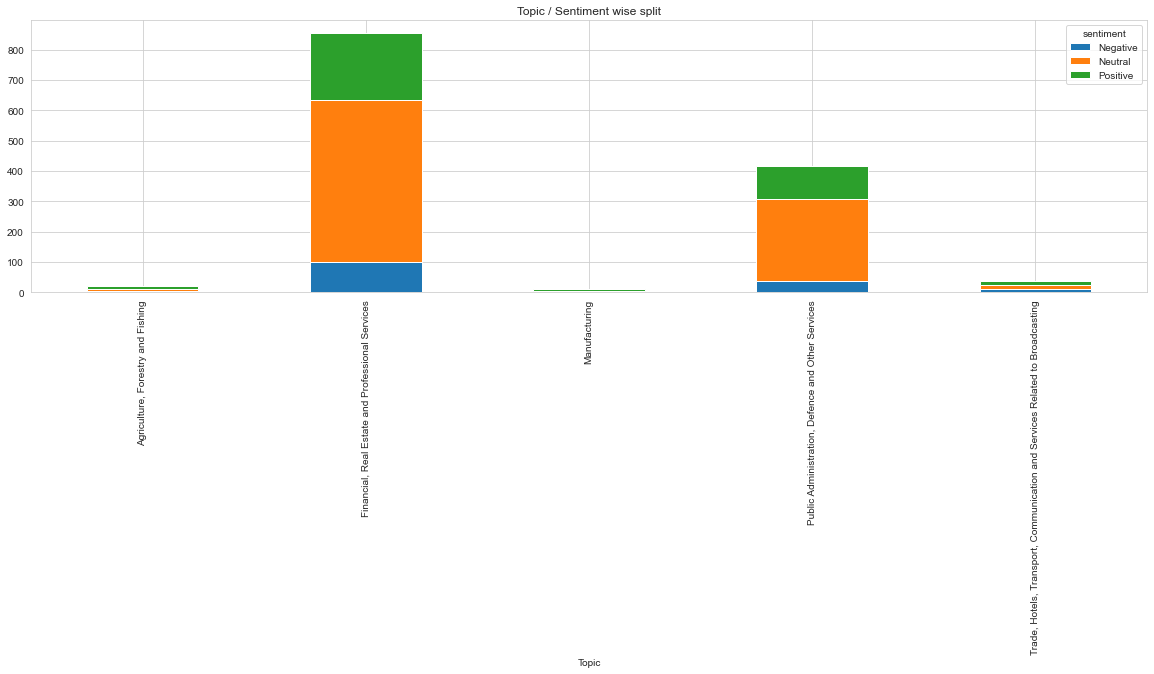

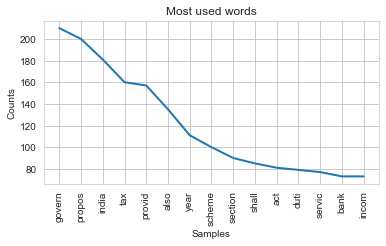

<AxesSubplot:title={'center':'Speech Trigrams'}>

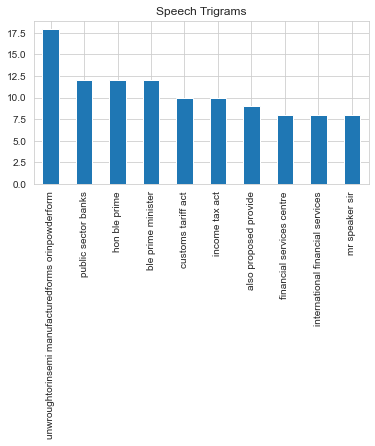

In [178]:
PM_2010 = pd.pivot_table(
    final_df[final_df.file_name=='201907 NS.txt'],
    index='Topic',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

PM_2010.plot.bar(stacked=True,figsize=(20,5),title='Topic / Sentiment wise split')

speech_combined = np.concatenate(final_df.Sent_clean_2[final_df.file_name=='201907 NS.txt'].values)

fdist = FreqDist(speech_combined)

plt.figure(figsize=[6,3])
fdist.plot(15,title='Most used words')
plt.show()


trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=150)

X_trigram = trigram_count_vectorizer.fit_transform(final_df.Sent_clean_1[final_df.file_name=='201907 NS.txt'])

DTM_trigram = pd.DataFrame(X_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

DTM_trigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(6,3),title='Speech Trigrams') 